In [1]:
import pickle
from modules.transcripts import Transcripts
from torch.utils.data import DataLoader

In [2]:
from modules.model import *
from modules.visualize import *
from modules.evaluate import *
from modules.utils import *

In [3]:
unet = UNet(enc_chs=(4,32,64,128,256,512,1024), dec_chs=(1024,512,256,128,64,32), p=0.2, k=5).cuda()
unet.load_state_dict(torch.load('unet.pt', map_location=torch.device('cuda')))

<All keys matched successfully>

In [4]:
trx_orfs = pickle.load(open('data/trx_orfs.pkl', 'rb'))
ensembl_trx = pickle.load(open('data/ensembl_trx.pkl', 'rb'))
inverted_ensembl_trx = {y['sequence']:x for x,y in ensembl_trx.items()}

In [5]:
X_test, y_test = pickle.load(open('data/test_data.pkl', 'rb'))

In [6]:
#preds = get_preds(unet, X_test, y_test)
#pickle.dump(preds, open('data/preds.pkl', 'wb'))
preds = pickle.load(open('data/preds.pkl', 'rb'))

In [7]:
#report = get_report(preds, ensembl_trx, inverted_ensembl_trx)
#pickle.dump(report, open('data/report.pkl', 'wb'))
report = pickle.load(open('data/report.pkl', 'rb'))

  0%|          | 0/2799 [00:00<?, ?it/s]

In [8]:
preds = [x["out"] for x in report.values()]

In [9]:
target = [x["mapped_cds"] for x in report.values()]

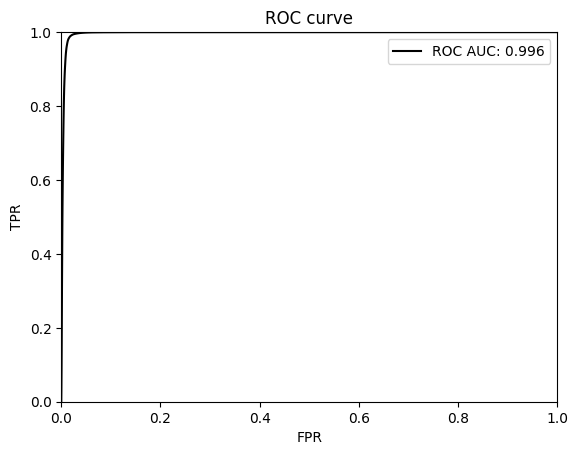

In [10]:
roc_curve(preds, target)

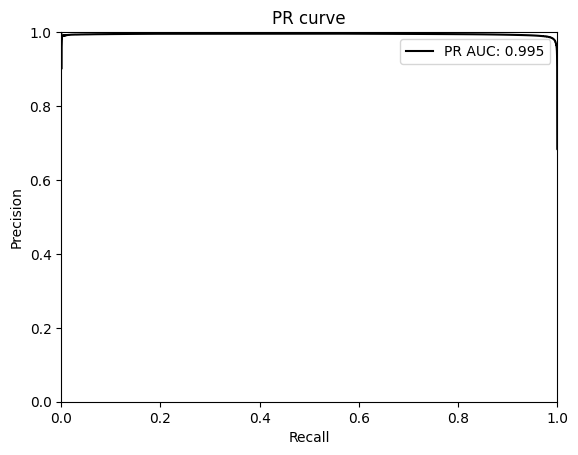

In [17]:
pr_curve(preds, target)

ENST00000378567
recall: 1.0
iou: 0.9988770484924316
biotype: protein_coding
ENSP00000367830  :  {'start': 161, 'stop': 1940, 'MS': 425, 'TE': 16, 'frame': 3}
IP_057712  :  {'start': 423, 'stop': 696, 'MS': 0, 'TE': 0, 'frame': 1}
II_057713  :  {'start': 478, 'stop': 577, 'MS': 0, 'TE': 0, 'frame': 2}
IP_057711  :  {'start': 789, 'stop': 924, 'MS': 0, 'TE': 0, 'frame': 1}
IP_057709  :  {'start': 1026, 'stop': 1176, 'MS': 0, 'TE': 0, 'frame': 1}
IP_057708  :  {'start': 1314, 'stop': 1494, 'MS': 1, 'TE': 0, 'frame': 1}
IP_057714  :  {'start': 2006, 'stop': 2291, 'MS': 0, 'TE': 0, 'frame': 3}
IP_057710  :  {'start': 2010, 'stop': 2262, 'MS': 0, 'TE': 0, 'frame': 1}


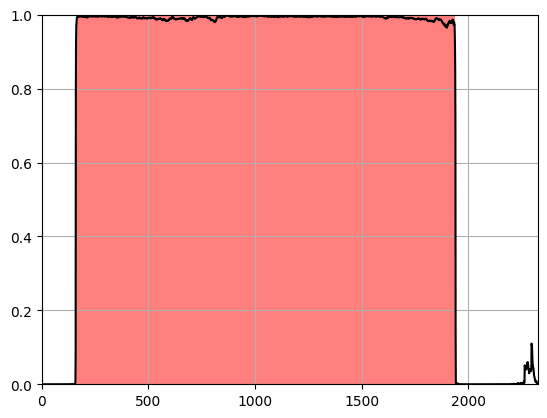

ENST00000377939
recall: 1.0
iou: 0.9890965819358826
biotype: protein_coding
ENSP00000367173  :  {'start': 127, 'stop': 2032, 'MS': 7, 'TE': 0, 'frame': 2}
IP_058160  :  {'start': 173, 'stop': 335, 'MS': 0, 'TE': 0, 'frame': 3}
IP_058158  :  {'start': 398, 'stop': 761, 'MS': 0, 'TE': 0, 'frame': 3}
IP_058162  :  {'start': 495, 'stop': 1050, 'MS': 1, 'TE': 0, 'frame': 1}
IP_058161  :  {'start': 1796, 'stop': 1958, 'MS': 0, 'TE': 0, 'frame': 3}
IP_058163  :  {'start': 2010, 'stop': 2268, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058154  :  {'start': 2035, 'stop': 2137, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058156  :  {'start': 2305, 'stop': 2662, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058157  :  {'start': 3149, 'stop': 3308, 'MS': 0, 'TE': 0, 'frame': 3}
IP_058164  :  {'start': 3231, 'stop': 3405, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058159  :  {'start': 3524, 'stop': 3821, 'MS': 0, 'TE': 0, 'frame': 3}


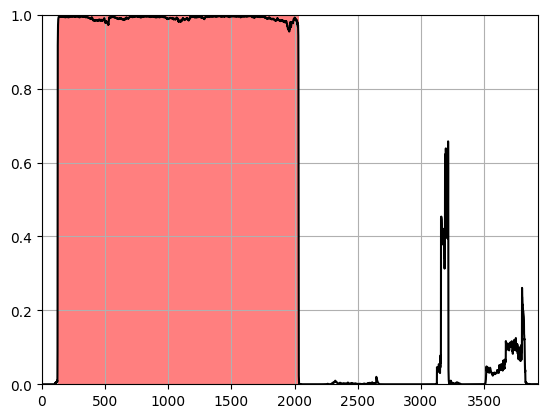

ENST00000377411
recall: 0.9861111044883728
iou: 0.9861111044883728
biotype: protein_coding
ENSP00000366628  :  {'start': 143, 'stop': 1151, 'MS': 8, 'TE': 5, 'frame': 3}
IP_058503  :  {'start': 687, 'stop': 885, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058500  :  {'start': 933, 'stop': 1533, 'MS': 1, 'TE': 0, 'frame': 1}
IP_058497  :  {'start': 1706, 'stop': 1823, 'MS': 0, 'TE': 0, 'frame': 3}
IP_686001  :  {'start': 2591, 'stop': 2699, 'MS': 0, 'TE': 0, 'frame': 3}
IP_685999  :  {'start': 2714, 'stop': 2924, 'MS': 0, 'TE': 0, 'frame': 3}
IP_685998  :  {'start': 3115, 'stop': 3382, 'MS': 0, 'TE': 0, 'frame': 2}
IP_685994  :  {'start': 3162, 'stop': 3327, 'MS': 0, 'TE': 0, 'frame': 1}
IP_685997  :  {'start': 3460, 'stop': 3556, 'MS': 1, 'TE': 0, 'frame': 2}
IP_686000  :  {'start': 4178, 'stop': 4319, 'MS': 0, 'TE': 0, 'frame': 3}
IP_685995  :  {'start': 4612, 'stop': 4723, 'MS': 0, 'TE': 0, 'frame': 2}
IP_685996  :  {'start': 4738, 'stop': 5065, 'MS': 1, 'TE': 0, 'frame': 2}


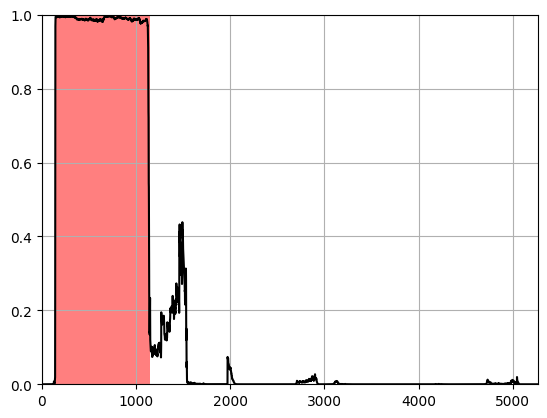

ENST00000343090
recall: 1.0
iou: 0.9994885921478271
biotype: protein_coding
ENSP00000343001  :  {'start': 75, 'stop': 3984, 'MS': 1443, 'TE': 9, 'frame': 1}
IP_058651  :  {'start': 94, 'stop': 202, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058652  :  {'start': 400, 'stop': 679, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058647  :  {'start': 1609, 'stop': 1720, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058644  :  {'start': 1882, 'stop': 1975, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058646  :  {'start': 2299, 'stop': 2446, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058641  :  {'start': 2600, 'stop': 2720, 'MS': 0, 'TE': 0, 'frame': 3}
IP_058650  :  {'start': 3001, 'stop': 3097, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058648  :  {'start': 3310, 'stop': 3439, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058649  :  {'start': 4084, 'stop': 4237, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058645  :  {'start': 4939, 'stop': 5074, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058643  :  {'start': 4977, 'stop': 5250, 'MS': 0, 'TE': 0, 'frame': 1}


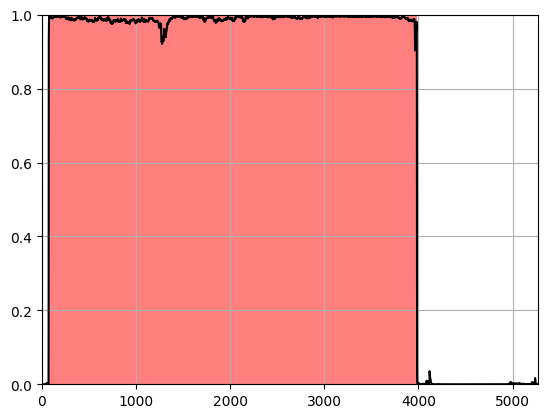

ENST00000253251
recall: 1.0
iou: 0.9977337121963501
biotype: protein_coding
ENSP00000253251  :  {'start': 839, 'stop': 4361, 'MS': 1442, 'TE': 6, 'frame': 3}
IP_058651  :  {'start': 858, 'stop': 966, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058652  :  {'start': 1164, 'stop': 1443, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058647  :  {'start': 1986, 'stop': 2097, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058644  :  {'start': 2259, 'stop': 2352, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058646  :  {'start': 2676, 'stop': 2823, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058641  :  {'start': 2977, 'stop': 3097, 'MS': 0, 'TE': 0, 'frame': 2}
IP_058650  :  {'start': 3378, 'stop': 3474, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058648  :  {'start': 3687, 'stop': 3816, 'MS': 0, 'TE': 0, 'frame': 1}
IP_058649  :  {'start': 4461, 'stop': 4614, 'MS': 0, 'TE': 0, 'frame': 1}


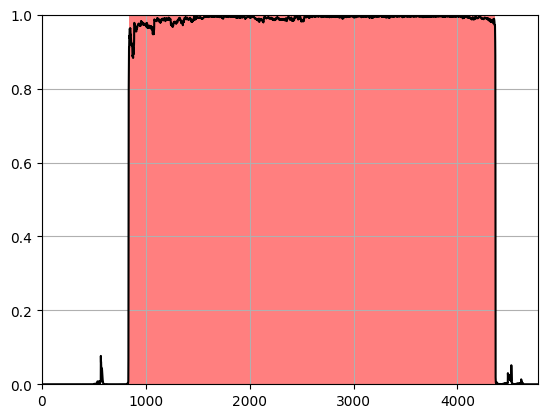

ENST00000377153
recall: 0.6336633563041687
iou: 0.6336633563041687
biotype: protein_coding
ENSP00000366358  :  {'start': 397, 'stop': 700, 'MS': 75, 'TE': 0, 'frame': 2}
IP_058651  :  {'start': 416, 'stop': 524, 'MS': 0, 'TE': 0, 'frame': 3}
IP_685346  :  {'start': 723, 'stop': 822, 'MS': 0, 'TE': 0, 'frame': 1}


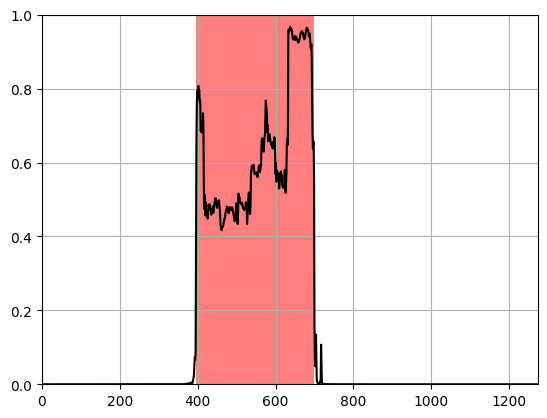

ENST00000401088
recall: 0.9978213310241699
iou: 0.9956521987915039
biotype: protein_coding
ENSP00000383866  :  {'start': 175, 'stop': 634, 'MS': 480, 'TE': 30, 'frame': 2}
IP_059518  :  {'start': 602, 'stop': 728, 'MS': 0, 'TE': 7, 'frame': 3}
IP_059517  :  {'start': 634, 'stop': 808, 'MS': 1, 'TE': 7, 'frame': 2}
IP_059519  :  {'start': 797, 'stop': 962, 'MS': 0, 'TE': 4, 'frame': 3}
IP_059521  :  {'start': 1020, 'stop': 1143, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059515  :  {'start': 1228, 'stop': 1426, 'MS': 0, 'TE': 2, 'frame': 2}
IP_059520  :  {'start': 1692, 'stop': 1788, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059523  :  {'start': 1884, 'stop': 2133, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059512  :  {'start': 2173, 'stop': 2269, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059514  :  {'start': 2374, 'stop': 2548, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059511  :  {'start': 2704, 'stop': 2935, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059522  :  {'start': 2745, 'stop': 2835, 'MS': 1, 'TE': 0, 'frame': 1}
IP_059513  :  {'star

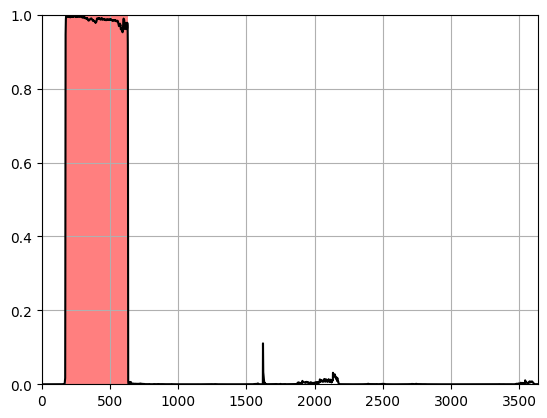

ENST00000492354
recall: 0.9849624037742615
iou: 0.9849624037742615
biotype: protein_coding
ENSP00000418012  :  {'start': 0, 'stop': 399, 'MS': 461, 'TE': 1, 'frame': 1}
IP_059518  :  {'start': 367, 'stop': 493, 'MS': 0, 'TE': 7, 'frame': 2}
IP_059517  :  {'start': 399, 'stop': 573, 'MS': 1, 'TE': 7, 'frame': 1}
IP_059519  :  {'start': 562, 'stop': 727, 'MS': 0, 'TE': 4, 'frame': 2}
IP_059521  :  {'start': 785, 'stop': 908, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059515  :  {'start': 993, 'stop': 1191, 'MS': 0, 'TE': 2, 'frame': 1}
IP_059520  :  {'start': 1457, 'stop': 1553, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059523  :  {'start': 1649, 'stop': 1898, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059512  :  {'start': 1938, 'stop': 2034, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059514  :  {'start': 2139, 'stop': 2313, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059511  :  {'start': 2469, 'stop': 2700, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059522  :  {'start': 2510, 'stop': 2600, 'MS': 1, 'TE': 0, 'frame': 3}
IP_059513  :  {'start': 32

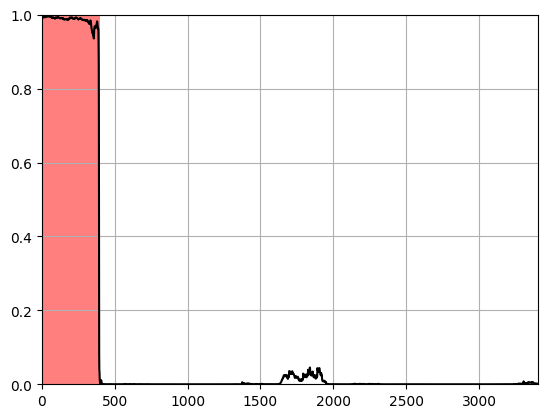

ENST00000401089
recall: 0.9925373196601868
iou: 0.9731707572937012
biotype: protein_coding
II_684817  :  {'start': 33, 'stop': 135, 'MS': 0, 'TE': 16, 'frame': 1}
ENSP00000383867  :  {'start': 40, 'stop': 442, 'MS': 461, 'TE': 4, 'frame': 2}
IP_059518  :  {'start': 410, 'stop': 536, 'MS': 0, 'TE': 7, 'frame': 3}
IP_059517  :  {'start': 442, 'stop': 616, 'MS': 1, 'TE': 7, 'frame': 2}
IP_059519  :  {'start': 605, 'stop': 770, 'MS': 0, 'TE': 4, 'frame': 3}
IP_059521  :  {'start': 828, 'stop': 951, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059515  :  {'start': 1036, 'stop': 1234, 'MS': 0, 'TE': 2, 'frame': 2}
IP_059520  :  {'start': 1500, 'stop': 1596, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059523  :  {'start': 1692, 'stop': 1941, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059512  :  {'start': 1981, 'stop': 2077, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059514  :  {'start': 2182, 'stop': 2356, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059511  :  {'start': 2512, 'stop': 2743, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059522  :  {'start': 25

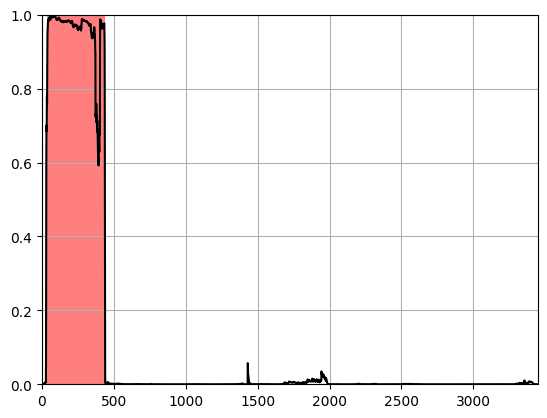

ENST00000420770
recall: 0.9980236887931824
iou: 0.9921414256095886
biotype: protein_coding
ENSP00000403389  :  {'start': 83, 'stop': 1601, 'MS': 9, 'TE': 2, 'frame': 3}
IP_059738  :  {'start': 276, 'stop': 426, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059735  :  {'start': 594, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059739  :  {'start': 1035, 'stop': 1182, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059737  :  {'start': 1311, 'stop': 1515, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059724  :  {'start': 1792, 'stop': 1951, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059732  :  {'start': 1868, 'stop': 2111, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059730  :  {'start': 2243, 'stop': 2399, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059733  :  {'start': 2313, 'stop': 2502, 'MS': 1, 'TE': 0, 'frame': 1}
IP_059731  :  {'start': 2516, 'stop': 2939, 'MS': 2, 'TE': 0, 'frame': 3}
IP_059740  :  {'start': 2691, 'stop': 2925, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059725  :  {'start': 3088, 'stop': 3301, 'MS': 0, 'TE': 0, 'frame': 2}
IP_059728  :  {'start

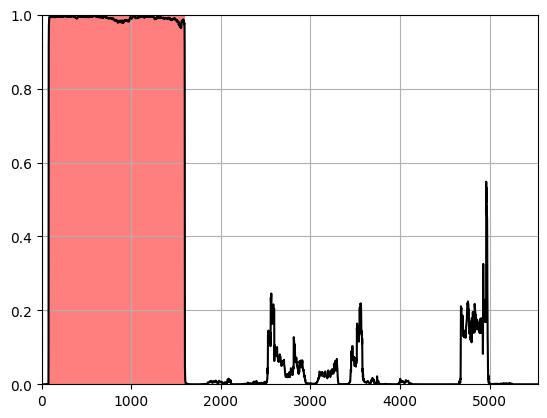

ENST00000375375
recall: 1.0
iou: 0.9993606209754944
biotype: protein_coding
ENSP00000364524  :  {'start': 598, 'stop': 2161, 'MS': 9, 'TE': 1, 'frame': 2}
IP_059738  :  {'start': 791, 'stop': 941, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059735  :  {'start': 1109, 'stop': 1238, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059739  :  {'start': 1550, 'stop': 1697, 'MS': 0, 'TE': 0, 'frame': 3}
IP_059742  :  {'start': 1826, 'stop': 2132, 'MS': 0, 'TE': 0, 'frame': 3}


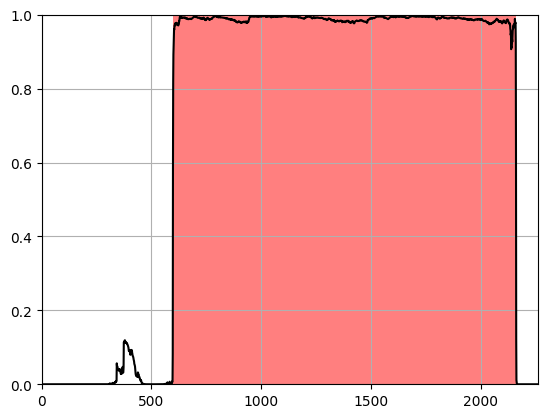

ENST00000400661
recall: 1.0
iou: 0.9942528605461121
biotype: protein_coding
ENSP00000383502  :  {'start': 80, 'stop': 1637, 'MS': 9, 'TE': 0, 'frame': 3}
IP_059738  :  {'start': 273, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059735  :  {'start': 585, 'stop': 714, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059739  :  {'start': 1026, 'stop': 1173, 'MS': 0, 'TE': 0, 'frame': 1}
IP_059742  :  {'start': 1302, 'stop': 1608, 'MS': 0, 'TE': 0, 'frame': 1}


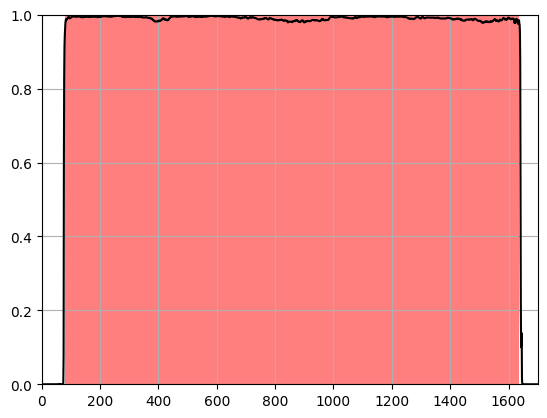

ENST00000374637
recall: 1.0
iou: 0.9774834513664246
biotype: protein_coding
IP_687067  :  {'start': 87, 'stop': 576, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000363768  :  {'start': 247, 'stop': 985, 'MS': 270, 'TE': 1, 'frame': 2}
IP_060384  :  {'start': 389, 'stop': 659, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060383  :  {'start': 698, 'stop': 875, 'MS': 0, 'TE': 0, 'frame': 3}


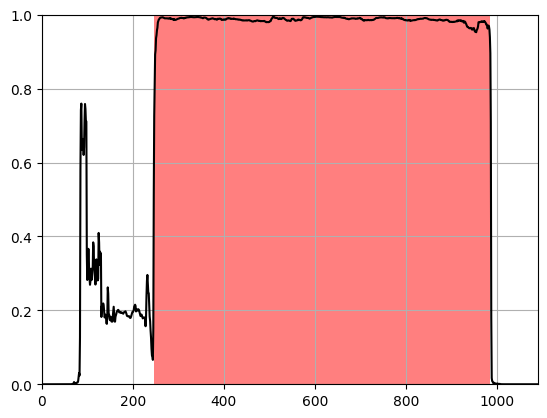

ENST00000374640
recall: 1.0
iou: 0.9946091771125793
biotype: protein_coding
ENSP00000363771  :  {'start': 98, 'stop': 836, 'MS': 270, 'TE': 1, 'frame': 3}
IP_060384  :  {'start': 240, 'stop': 510, 'MS': 0, 'TE': 0, 'frame': 1}
IP_060383  :  {'start': 549, 'stop': 726, 'MS': 0, 'TE': 0, 'frame': 1}
IP_060382  :  {'start': 762, 'stop': 1068, 'MS': 0, 'TE': 0, 'frame': 1}


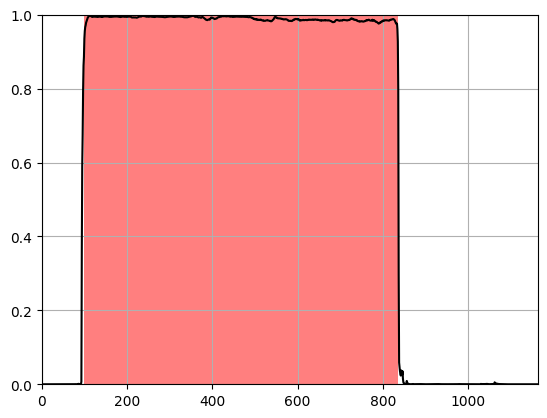

ENST00000374639
recall: 1.0
iou: 0.9972972869873047
biotype: protein_coding
ENSP00000363770  :  {'start': 118, 'stop': 856, 'MS': 270, 'TE': 1, 'frame': 2}
IP_060384  :  {'start': 260, 'stop': 530, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060383  :  {'start': 569, 'stop': 746, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060382  :  {'start': 782, 'stop': 1088, 'MS': 0, 'TE': 0, 'frame': 3}


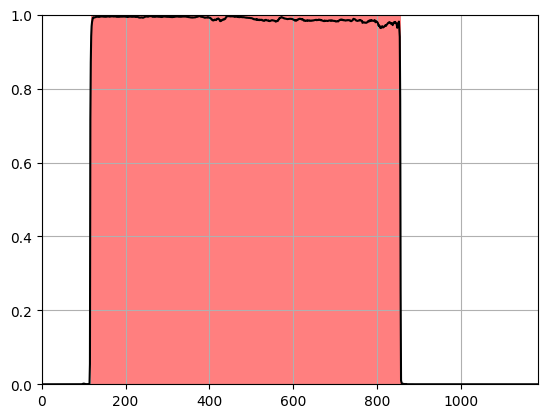

ENST00000270800
recall: 1.0
iou: 0.9829059839248657
biotype: protein_coding
ENSP00000270800  :  {'start': 39, 'stop': 1764, 'MS': 2, 'TE': 1, 'frame': 1}
IP_060638  :  {'start': 716, 'stop': 902, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060634  :  {'start': 1207, 'stop': 1366, 'MS': 0, 'TE': 0, 'frame': 2}
IP_060639  :  {'start': 1769, 'stop': 1886, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060642  :  {'start': 1833, 'stop': 1956, 'MS': 0, 'TE': 0, 'frame': 1}
IP_060637  :  {'start': 1921, 'stop': 2017, 'MS': 1, 'TE': 0, 'frame': 2}
IP_060640  :  {'start': 1952, 'stop': 2162, 'MS': 0, 'TE': 0, 'frame': 3}
IP_060643  :  {'start': 2052, 'stop': 2325, 'MS': 0, 'TE': 0, 'frame': 1}
IP_060635  :  {'start': 2173, 'stop': 2485, 'MS': 0, 'TE': 0, 'frame': 2}


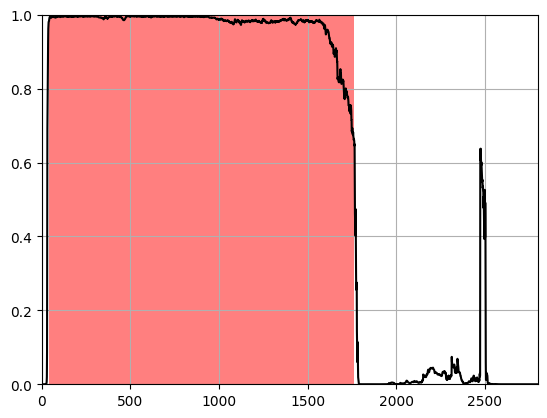

ENST00000647380
recall: 0.9781420826911926
iou: 0.9572192430496216
biotype: protein_coding


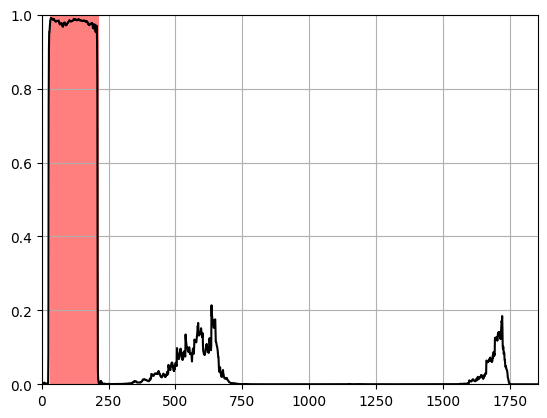

ENST00000373795
recall: 0.9993265867233276
iou: 0.9986541271209717
biotype: protein_coding
ENSP00000362900  :  {'start': 235, 'stop': 1720, 'MS': 710, 'TE': 30, 'frame': 2}
IP_061594  :  {'start': 440, 'stop': 596, 'MS': 0, 'TE': 0, 'frame': 3}
IP_061595  :  {'start': 1073, 'stop': 1187, 'MS': 0, 'TE': 0, 'frame': 3}
IP_061593  :  {'start': 1484, 'stop': 1775, 'MS': 0, 'TE': 0, 'frame': 3}
IP_061592  :  {'start': 1726, 'stop': 1825, 'MS': 0, 'TE': 0, 'frame': 2}
IP_061596  :  {'start': 1802, 'stop': 2042, 'MS': 0, 'TE': 0, 'frame': 3}
IP_061591  :  {'start': 2056, 'stop': 2170, 'MS': 0, 'TE': 0, 'frame': 2}


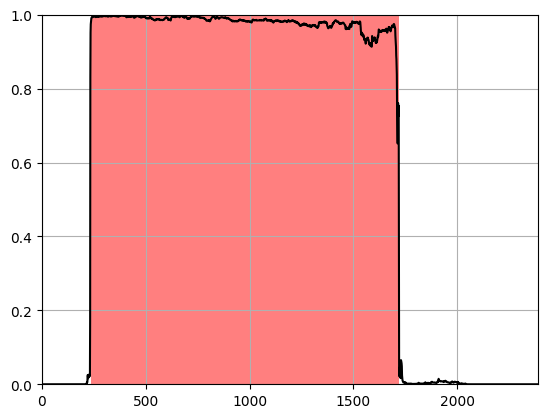

ENST00000246314
recall: 0.9734184145927429
iou: 0.8807118535041809
biotype: protein_coding
IP_062548  :  {'start': 165, 'stop': 261, 'MS': 0, 'TE': 4, 'frame': 1}
ENSP00000246314  :  {'start': 613, 'stop': 2494, 'MS': 250, 'TE': 0, 'frame': 2}
IP_062543  :  {'start': 1208, 'stop': 1316, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062547  :  {'start': 1380, 'stop': 1623, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062545  :  {'start': 2144, 'stop': 2261, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062544  :  {'start': 2378, 'stop': 2498, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062546  :  {'start': 2634, 'stop': 2730, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062549  :  {'start': 2871, 'stop': 3000, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062542  :  {'start': 3023, 'stop': 3173, 'MS': 0, 'TE': 0, 'frame': 3}


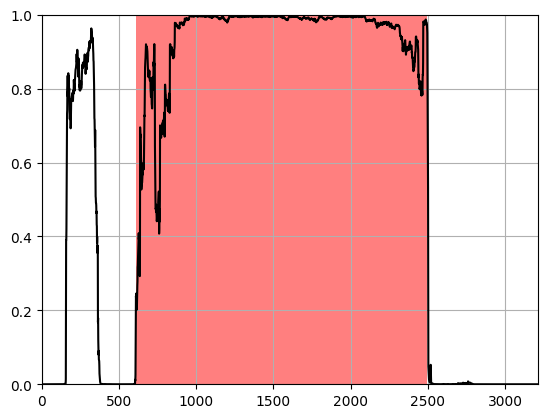

ENST00000373191
recall: 0.9972899556159973
iou: 0.8543946743011475
biotype: protein_coding
IP_062548  :  {'start': 345, 'stop': 441, 'MS': 0, 'TE': 4, 'frame': 1}
ENSP00000362287  :  {'start': 349, 'stop': 2932, 'MS': 485, 'TE': 15, 'frame': 2}
IP_062543  :  {'start': 1646, 'stop': 1754, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062547  :  {'start': 1818, 'stop': 2061, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062545  :  {'start': 2582, 'stop': 2699, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062544  :  {'start': 2816, 'stop': 2936, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062546  :  {'start': 3072, 'stop': 3168, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062549  :  {'start': 3309, 'stop': 3438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062542  :  {'start': 3461, 'stop': 3611, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062541  :  {'start': 3604, 'stop': 3811, 'MS': 0, 'TE': 0, 'frame': 2}
IP_683094  :  {'start': 3945, 'stop': 4059, 'MS': 0, 'TE': 0, 'frame': 1}
IP_683123  :  {'start': 4073, 'stop': 4166, 'MS': 0, 'TE': 0, 'frame': 3}
IP_683096  :  {

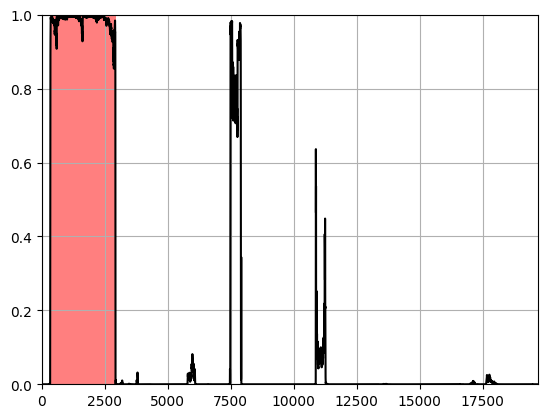

ENST00000358011
recall: 1.0
iou: 0.9983686804771423
biotype: protein_coding
ENSP00000350704  :  {'start': 190, 'stop': 802, 'MS': 133, 'TE': 12, 'frame': 2}
IP_062791  :  {'start': 776, 'stop': 923, 'MS': 0, 'TE': 0, 'frame': 3}
IP_062794  :  {'start': 1014, 'stop': 1230, 'MS': 0, 'TE': 0, 'frame': 1}
IP_062790  :  {'start': 1549, 'stop': 1690, 'MS': 0, 'TE': 0, 'frame': 2}
IP_062789  :  {'start': 2122, 'stop': 2230, 'MS': 0, 'TE': 0, 'frame': 2}
IP_062793  :  {'start': 2226, 'stop': 2349, 'MS': 0, 'TE': 0, 'frame': 1}


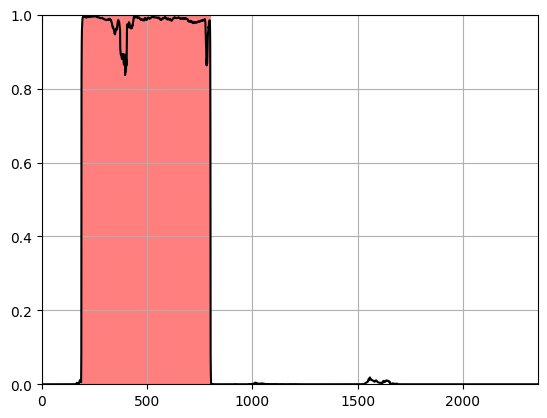

ENST00000372990
recall: 1.0
iou: 0.990227997303009
biotype: protein_coding
ENSP00000362081  :  {'start': 228, 'stop': 1140, 'MS': 37, 'TE': 3, 'frame': 1}
IP_062940  :  {'start': 325, 'stop': 730, 'MS': 0, 'TE': 0, 'frame': 2}
IP_062939  :  {'start': 949, 'stop': 1048, 'MS': 0, 'TE': 0, 'frame': 2}


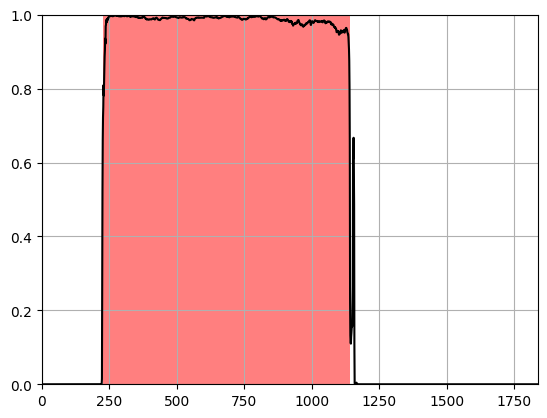

ENST00000372562
recall: 0.9976019263267517
iou: 0.9928401112556458
biotype: protein_coding
IP_685964  :  {'start': 99, 'stop': 207, 'MS': 0, 'TE': 0, 'frame': 1}
IP_063538  :  {'start': 226, 'stop': 328, 'MS': 0, 'TE': 0, 'frame': 2}
ENSP00000361643  :  {'start': 394, 'stop': 811, 'MS': 399, 'TE': 1, 'frame': 2}


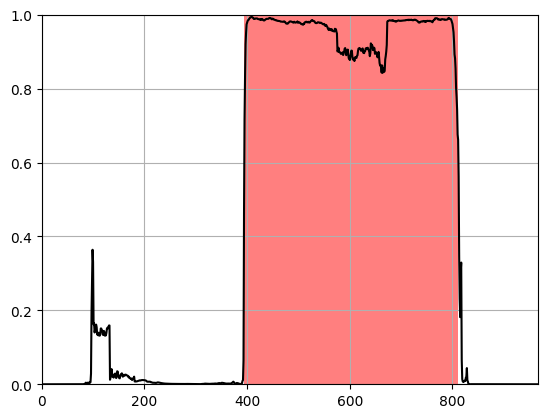

ENST00000650026
recall: 0.9990421533584595
iou: 0.9304192662239075
biotype: protein_coding
ENSP00000497380  :  {'start': 202, 'stop': 1246, 'MS': 171, 'TE': 2, 'frame': 2}
II_064333  :  {'start': 413, 'stop': 533, 'MS': 0, 'TE': 0, 'frame': 3}
II_064332  :  {'start': 1076, 'stop': 1433, 'MS': 0, 'TE': 0, 'frame': 3}
IP_064330  :  {'start': 2226, 'stop': 2367, 'MS': 0, 'TE': 0, 'frame': 1}


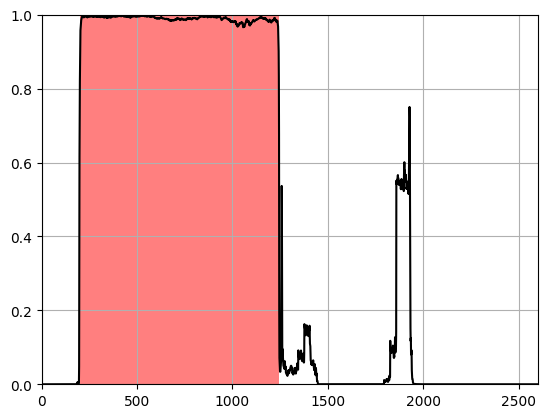

ENST00000650508
recall: 1.0
iou: 0.9522031545639038
biotype: protein_coding
ENSP00000498143  :  {'start': 244, 'stop': 1519, 'MS': 209, 'TE': 7, 'frame': 2}
II_064333  :  {'start': 455, 'stop': 575, 'MS': 0, 'TE': 0, 'frame': 3}
IP_064336  :  {'start': 1118, 'stop': 1316, 'MS': 0, 'TE': 0, 'frame': 3}
II_064334  :  {'start': 1236, 'stop': 1332, 'MS': 0, 'TE': 0, 'frame': 1}
IP_064330  :  {'start': 2312, 'stop': 2453, 'MS': 0, 'TE': 0, 'frame': 3}


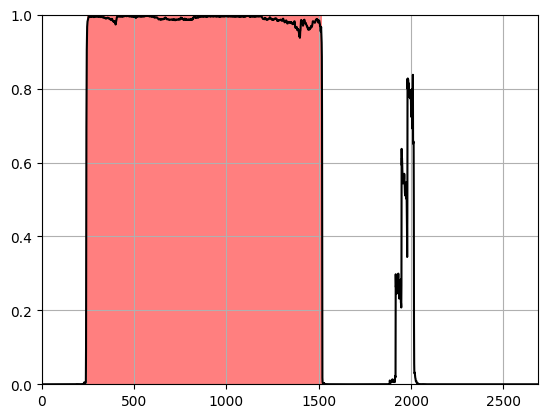

ENST00000649800
recall: 1.0
iou: 0.9555707573890686
biotype: protein_coding
ENSP00000498083  :  {'start': 244, 'stop': 1642, 'MS': 209, 'TE': 5, 'frame': 2}
II_064333  :  {'start': 455, 'stop': 575, 'MS': 0, 'TE': 0, 'frame': 3}
IP_064338  :  {'start': 671, 'stop': 761, 'MS': 0, 'TE': 0, 'frame': 3}
IP_064336  :  {'start': 1241, 'stop': 1439, 'MS': 0, 'TE': 0, 'frame': 3}
II_064334  :  {'start': 1359, 'stop': 1455, 'MS': 0, 'TE': 0, 'frame': 1}
IP_064330  :  {'start': 2435, 'stop': 2576, 'MS': 0, 'TE': 0, 'frame': 3}


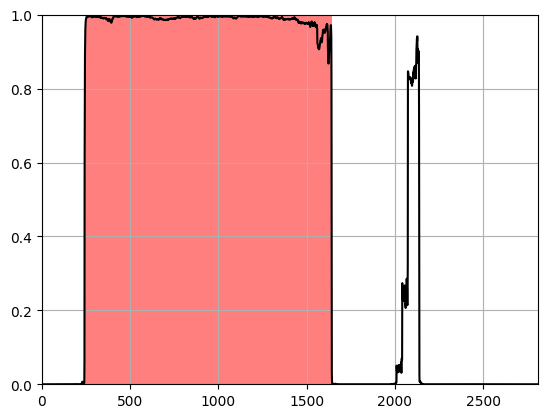

ENST00000371399
recall: 1.0
iou: 0.6424870491027832
biotype: protein_coding
IP_065012  :  {'start': 190, 'stop': 367, 'MS': 2, 'TE': 0, 'frame': 2}
ENSP00000360452  :  {'start': 585, 'stop': 957, 'MS': 0, 'TE': 0, 'frame': 1}
IP_065013  :  {'start': 880, 'stop': 1030, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065015  :  {'start': 956, 'stop': 1049, 'MS': 0, 'TE': 0, 'frame': 3}
IP_065019  :  {'start': 1026, 'stop': 1125, 'MS': 2, 'TE': 0, 'frame': 1}
IP_065018  :  {'start': 1206, 'stop': 1332, 'MS': 0, 'TE': 0, 'frame': 1}
IP_065016  :  {'start': 1304, 'stop': 1403, 'MS': 0, 'TE': 0, 'frame': 3}


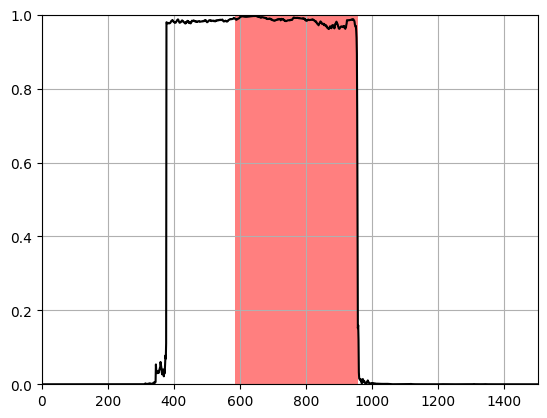

ENST00000072644
recall: 1.0
iou: 0.9956756830215454
biotype: protein_coding
IP_065014  :  {'start': 122, 'stop': 233, 'MS': 0, 'TE': 13, 'frame': 3}
ENSP00000072644  :  {'start': 391, 'stop': 1312, 'MS': 113, 'TE': 12, 'frame': 2}
IP_065012  :  {'start': 545, 'stop': 722, 'MS': 2, 'TE': 0, 'frame': 3}
IP_065013  :  {'start': 1235, 'stop': 1385, 'MS': 0, 'TE': 0, 'frame': 3}
IP_065015  :  {'start': 1311, 'stop': 1404, 'MS': 0, 'TE': 0, 'frame': 1}
IP_065019  :  {'start': 1381, 'stop': 1480, 'MS': 2, 'TE': 0, 'frame': 2}
IP_065018  :  {'start': 1561, 'stop': 1687, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065016  :  {'start': 1659, 'stop': 1758, 'MS': 0, 'TE': 0, 'frame': 1}


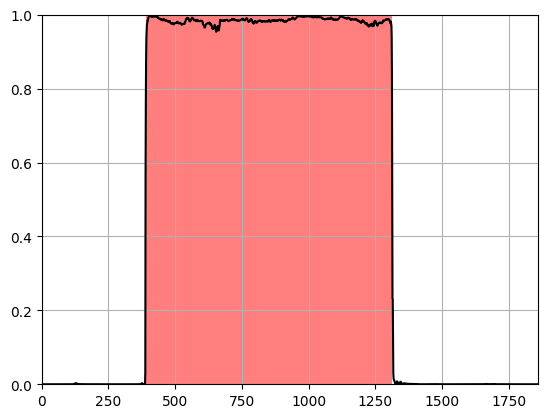

ENST00000371120
recall: 1.0
iou: 0.9913606643676758
biotype: protein_coding
ENSP00000360161  :  {'start': 159, 'stop': 1536, 'MS': 258, 'TE': 18, 'frame': 1}
IP_065497  :  {'start': 419, 'stop': 551, 'MS': 0, 'TE': 1, 'frame': 3}
IP_065496  :  {'start': 718, 'stop': 811, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065498  :  {'start': 2114, 'stop': 2312, 'MS': 0, 'TE': 0, 'frame': 3}


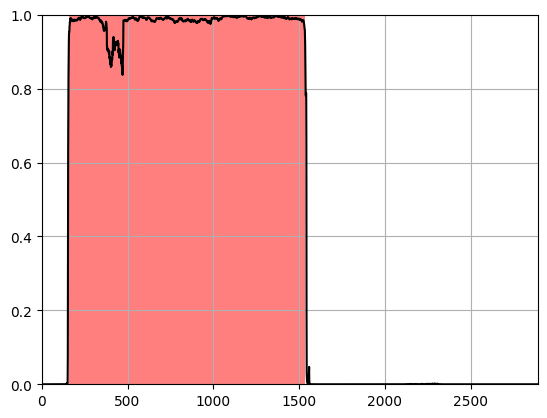

ENST00000317868
recall: 1.0
iou: 0.9971035718917847
biotype: protein_coding
ENSP00000322159  :  {'start': 207, 'stop': 1584, 'MS': 258, 'TE': 18, 'frame': 1}
IP_065497  :  {'start': 467, 'stop': 599, 'MS': 0, 'TE': 1, 'frame': 3}
IP_065496  :  {'start': 766, 'stop': 859, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065498  :  {'start': 2162, 'stop': 2360, 'MS': 0, 'TE': 0, 'frame': 3}


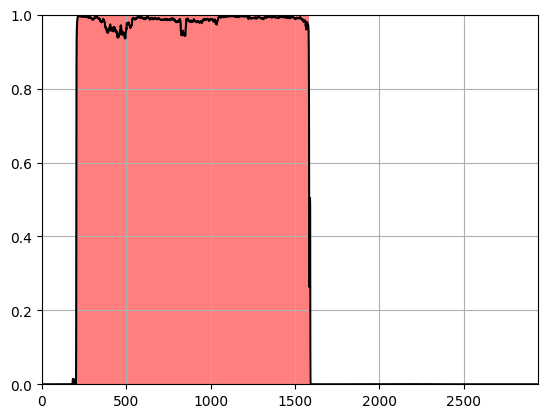

ENST00000370952
recall: 1.0
iou: 0.9972436428070068
biotype: protein_coding
ENSP00000359990  :  {'start': 80, 'stop': 1889, 'MS': 1380, 'TE': 29, 'frame': 3}
IP_065962  :  {'start': 1483, 'stop': 1594, 'MS': 0, 'TE': 1, 'frame': 2}
IP_065958  :  {'start': 2165, 'stop': 2270, 'MS': 0, 'TE': 0, 'frame': 3}
IP_065960  :  {'start': 2217, 'stop': 2328, 'MS': 0, 'TE': 0, 'frame': 1}
IP_065963  :  {'start': 2347, 'stop': 2470, 'MS': 0, 'TE': 0, 'frame': 2}
IP_065961  :  {'start': 2436, 'stop': 2541, 'MS': 0, 'TE': 0, 'frame': 1}


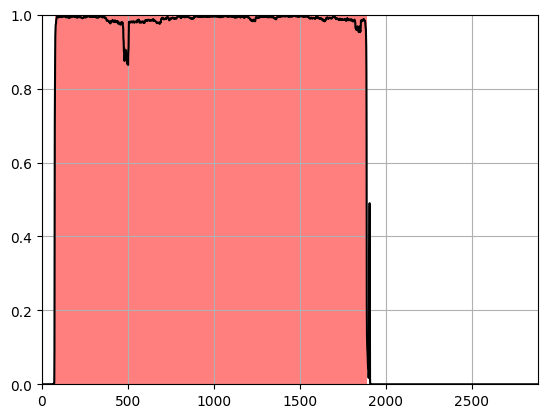

ENST00000457880
recall: 0.9926578402519226
iou: 0.9825581312179565
biotype: protein_coding
IP_066134  :  {'start': 56, 'stop': 173, 'MS': 0, 'TE': 9, 'frame': 3}
ENSP00000407025  :  {'start': 93, 'stop': 774, 'MS': 158, 'TE': 0, 'frame': 1}
IP_066132  :  {'start': 508, 'stop': 598, 'MS': 0, 'TE': 0, 'frame': 2}
IP_066137  :  {'start': 1657, 'stop': 1750, 'MS': 0, 'TE': 0, 'frame': 2}
IP_066139  :  {'start': 2095, 'stop': 2275, 'MS': 0, 'TE': 0, 'frame': 2}
IP_066135  :  {'start': 2820, 'stop': 2925, 'MS': 0, 'TE': 0, 'frame': 1}
IP_066138  :  {'start': 2926, 'stop': 3097, 'MS': 0, 'TE': 0, 'frame': 2}


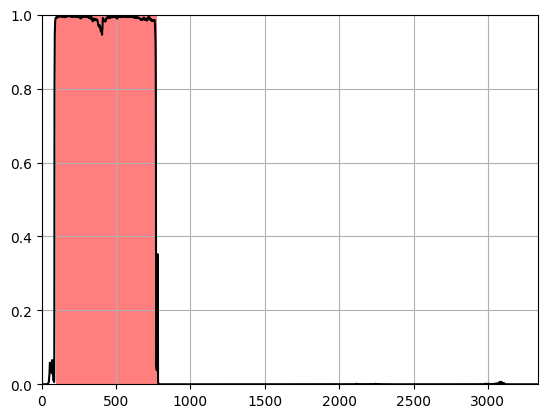

ENST00000370867
recall: 0.9948717951774597
iou: 0.9872773289680481
biotype: protein_coding
IP_066134  :  {'start': 52, 'stop': 169, 'MS': 0, 'TE': 9, 'frame': 2}
ENSP00000359904  :  {'start': 89, 'stop': 869, 'MS': 219, 'TE': 17, 'frame': 3}
IP_066132  :  {'start': 603, 'stop': 693, 'MS': 0, 'TE': 0, 'frame': 1}
IP_066137  :  {'start': 1752, 'stop': 1845, 'MS': 0, 'TE': 0, 'frame': 1}
IP_066139  :  {'start': 2190, 'stop': 2370, 'MS': 0, 'TE': 0, 'frame': 1}
IP_066135  :  {'start': 2915, 'stop': 3020, 'MS': 0, 'TE': 0, 'frame': 3}
IP_066138  :  {'start': 3021, 'stop': 3192, 'MS': 0, 'TE': 0, 'frame': 1}


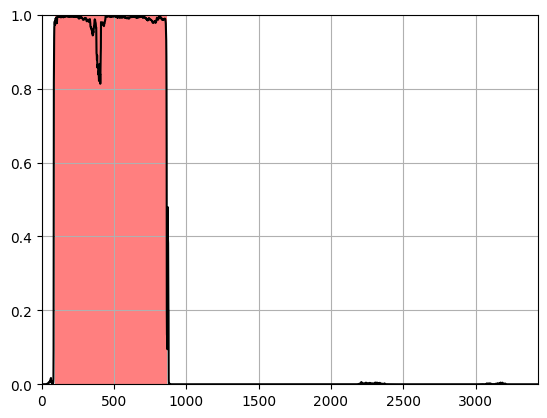

ENST00000260526
recall: 1.0
iou: 0.9976284503936768
biotype: protein_coding
ENSP00000260526  :  {'start': 183, 'stop': 3969, 'MS': 1065, 'TE': 15, 'frame': 1}
IP_067157  :  {'start': 544, 'stop': 649, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067156  :  {'start': 652, 'stop': 760, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067152  :  {'start': 1150, 'stop': 1264, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067154  :  {'start': 2227, 'stop': 2323, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067155  :  {'start': 3691, 'stop': 3793, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067151  :  {'start': 4258, 'stop': 4357, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067163  :  {'start': 4679, 'stop': 4844, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067153  :  {'start': 4774, 'stop': 4873, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067161  :  {'start': 5174, 'stop': 5288, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067147  :  {'start': 5184, 'stop': 5331, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067162  :  {'start': 5519, 'stop': 5645, 'MS': 2, 'TE': 0, 'frame': 3}
IP_067166  :  {'start': 5927, '

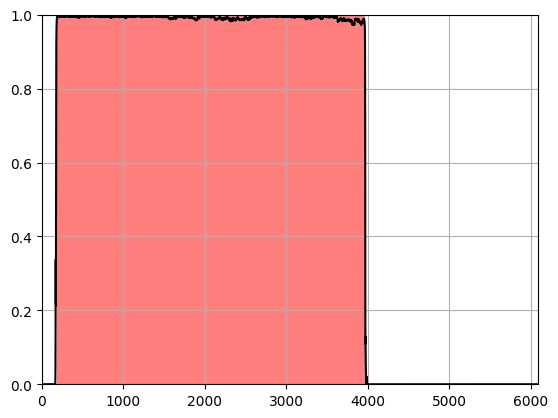

ENST00000294724
recall: 1.0
iou: 0.9995653033256531
biotype: protein_coding
ENSP00000294724  :  {'start': 478, 'stop': 5077, 'MS': 3799, 'TE': 23, 'frame': 2}
IP_067317  :  {'start': 701, 'stop': 800, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067319  :  {'start': 1103, 'stop': 1196, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067312  :  {'start': 2330, 'stop': 2468, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067323  :  {'start': 3543, 'stop': 3684, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067320  :  {'start': 3875, 'stop': 3995, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067315  :  {'start': 4034, 'stop': 4157, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067318  :  {'start': 4202, 'stop': 4346, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067314  :  {'start': 4523, 'stop': 4628, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067313  :  {'start': 4778, 'stop': 4883, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067316  :  {'start': 4991, 'stop': 5117, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067321  :  {'start': 5237, 'stop': 5339, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067307  :  {'start': 5356,

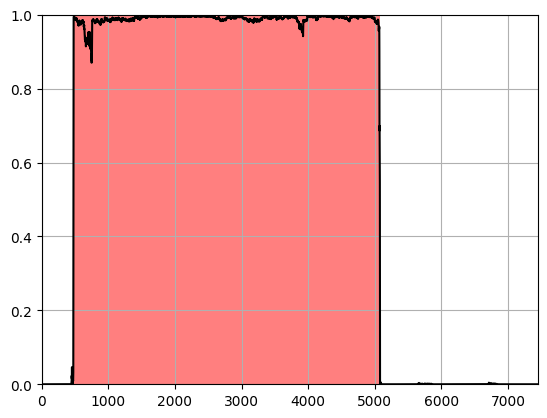

ENST00000361915
recall: 1.0
iou: 0.9976139068603516
biotype: protein_coding
ENSP00000355106  :  {'start': 400, 'stop': 4999, 'MS': 3799, 'TE': 23, 'frame': 2}
IP_067317  :  {'start': 623, 'stop': 722, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067319  :  {'start': 1025, 'stop': 1118, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067312  :  {'start': 2252, 'stop': 2390, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067323  :  {'start': 3465, 'stop': 3606, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067320  :  {'start': 3797, 'stop': 3917, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067315  :  {'start': 3956, 'stop': 4079, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067318  :  {'start': 4124, 'stop': 4268, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067314  :  {'start': 4445, 'stop': 4550, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067313  :  {'start': 4700, 'stop': 4805, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067316  :  {'start': 4913, 'stop': 5039, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067321  :  {'start': 5159, 'stop': 5261, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067307  :  {'start': 5278,

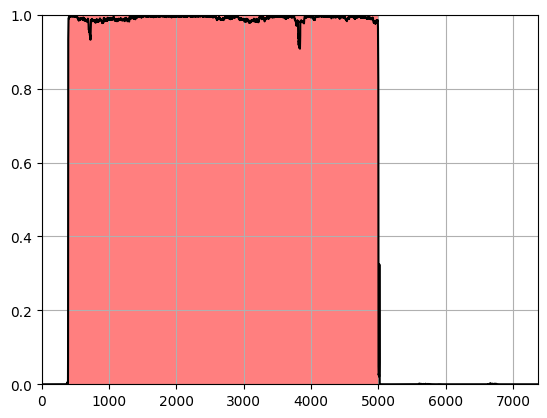

ENST00000370161
recall: 1.0
iou: 0.9993412494659424
biotype: protein_coding
ENSP00000359180  :  {'start': 0, 'stop': 4551, 'MS': 3667, 'TE': 0, 'frame': 1}
IP_067317  :  {'start': 175, 'stop': 274, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067319  :  {'start': 577, 'stop': 670, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067312  :  {'start': 1804, 'stop': 1942, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067323  :  {'start': 3017, 'stop': 3158, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067320  :  {'start': 3349, 'stop': 3469, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067315  :  {'start': 3508, 'stop': 3631, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067318  :  {'start': 3676, 'stop': 3820, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067314  :  {'start': 3997, 'stop': 4102, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067313  :  {'start': 4252, 'stop': 4357, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067316  :  {'start': 4465, 'stop': 4591, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067321  :  {'start': 4711, 'stop': 4813, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067307  :  {'start': 4830, 'sto

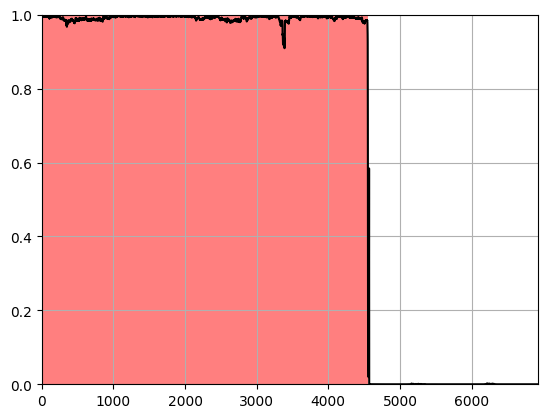

ENST00000370163
recall: 1.0
iou: 0.99869704246521
biotype: protein_coding
ENSP00000359182  :  {'start': 198, 'stop': 4797, 'MS': 3799, 'TE': 23, 'frame': 1}
IP_067317  :  {'start': 421, 'stop': 520, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067319  :  {'start': 823, 'stop': 916, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067312  :  {'start': 2050, 'stop': 2188, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067323  :  {'start': 3263, 'stop': 3404, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067320  :  {'start': 3595, 'stop': 3715, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067315  :  {'start': 3754, 'stop': 3877, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067318  :  {'start': 3922, 'stop': 4066, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067314  :  {'start': 4243, 'stop': 4348, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067313  :  {'start': 4498, 'stop': 4603, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067316  :  {'start': 4711, 'stop': 4837, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067321  :  {'start': 4957, 'stop': 5059, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067307  :  {'start': 5076, 'st

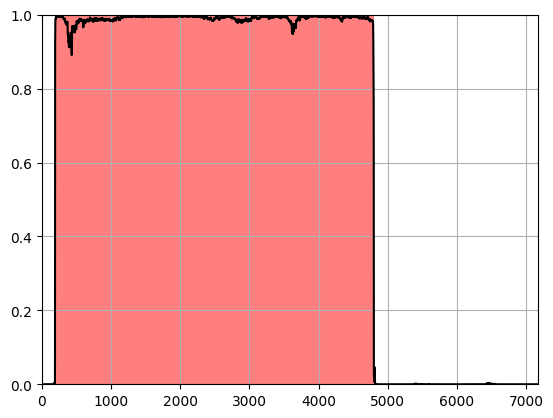

ENST00000370165
recall: 1.0
iou: 0.9984802603721619
biotype: protein_coding
ENSP00000359184  :  {'start': 138, 'stop': 4737, 'MS': 3799, 'TE': 23, 'frame': 1}
IP_067317  :  {'start': 361, 'stop': 460, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067319  :  {'start': 763, 'stop': 856, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067312  :  {'start': 1990, 'stop': 2128, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067323  :  {'start': 3203, 'stop': 3344, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067320  :  {'start': 3535, 'stop': 3655, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067315  :  {'start': 3694, 'stop': 3817, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067318  :  {'start': 3862, 'stop': 4006, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067314  :  {'start': 4183, 'stop': 4288, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067313  :  {'start': 4438, 'stop': 4543, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067316  :  {'start': 4651, 'stop': 4777, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067321  :  {'start': 4897, 'stop': 4999, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067307  :  {'start': 5016, '

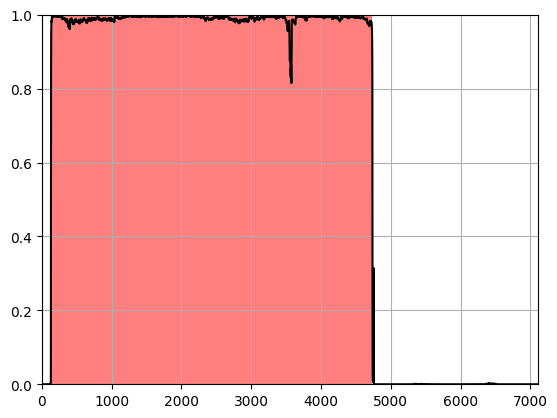

ENST00000370114
recall: 0.9989929795265198
iou: 0.9979879260063171
biotype: protein_coding
IP_683740  :  {'start': 7, 'stop': 253, 'MS': 0, 'TE': 0, 'frame': 2}
IP_683736  :  {'start': 150, 'stop': 282, 'MS': 0, 'TE': 0, 'frame': 1}
IP_683737  :  {'start': 357, 'stop': 573, 'MS': 0, 'TE': 2, 'frame': 1}
IP_683741  :  {'start': 443, 'stop': 569, 'MS': 0, 'TE': 0, 'frame': 3}
IP_683738  :  {'start': 610, 'stop': 700, 'MS': 0, 'TE': 0, 'frame': 2}
IP_683739  :  {'start': 709, 'stop': 991, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067446  :  {'start': 881, 'stop': 1013, 'MS': 0, 'TE': 1, 'frame': 3}
IP_067442  :  {'start': 945, 'stop': 1242, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067445  :  {'start': 1013, 'stop': 1115, 'MS': 0, 'TE': 1, 'frame': 3}
IP_067441  :  {'start': 1242, 'stop': 1398, 'MS': 0, 'TE': 4, 'frame': 1}
ENSP00000359132  :  {'start': 1437, 'stop': 2430, 'MS': 164, 'TE': 26, 'frame': 1}
IP_067447  :  {'start': 1766, 'stop': 1856, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067448  :  {'start': 2486

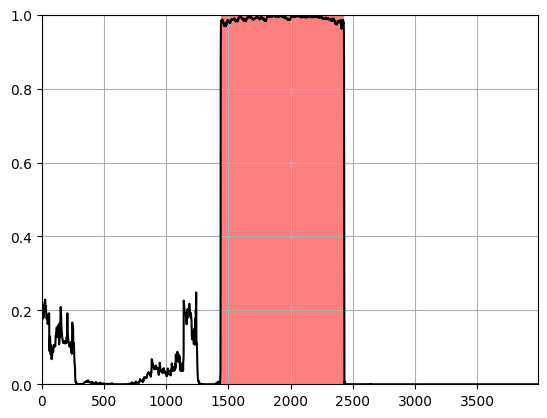

ENST00000535414
recall: 1.0
iou: 0.5865257382392883
biotype: protein_coding
IP_067446  :  {'start': 62, 'stop': 194, 'MS': 0, 'TE': 1, 'frame': 3}
IP_067442  :  {'start': 126, 'stop': 423, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067445  :  {'start': 194, 'stop': 296, 'MS': 0, 'TE': 1, 'frame': 3}
IP_067451  :  {'start': 423, 'stop': 570, 'MS': 0, 'TE': 1, 'frame': 1}
ENSP00000444385  :  {'start': 654, 'stop': 1098, 'MS': 74, 'TE': 0, 'frame': 1}
IP_067447  :  {'start': 983, 'stop': 1073, 'MS': 0, 'TE': 0, 'frame': 3}
II_067453  :  {'start': 1084, 'stop': 1576, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067448  :  {'start': 1632, 'stop': 1806, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067443  :  {'start': 2045, 'stop': 2135, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067444  :  {'start': 2387, 'stop': 2486, 'MS': 0, 'TE': 0, 'frame': 3}


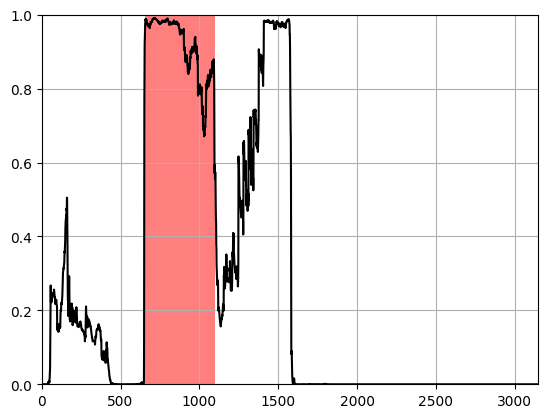

ENST00000370113
recall: 1.0
iou: 0.998993992805481
biotype: protein_coding
IP_067451  :  {'start': 56, 'stop': 203, 'MS': 0, 'TE': 1, 'frame': 3}
ENSP00000359131  :  {'start': 287, 'stop': 1280, 'MS': 164, 'TE': 26, 'frame': 3}
IP_067447  :  {'start': 616, 'stop': 706, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067448  :  {'start': 1336, 'stop': 1510, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067443  :  {'start': 1749, 'stop': 1839, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067444  :  {'start': 2091, 'stop': 2190, 'MS': 0, 'TE': 0, 'frame': 1}


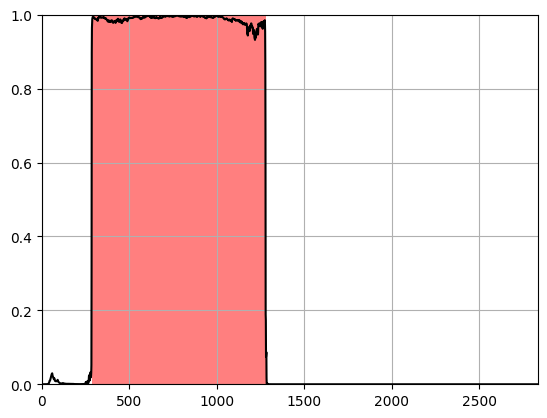

ENST00000370103
recall: 0.9992737770080566
iou: 0.997824490070343
biotype: protein_coding
IP_067497  :  {'start': 25, 'stop': 163, 'MS': 0, 'TE': 0, 'frame': 2}
ENSP00000359121  :  {'start': 214, 'stop': 1591, 'MS': 53, 'TE': 1, 'frame': 2}
IP_067500  :  {'start': 338, 'stop': 464, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067492  :  {'start': 807, 'stop': 900, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067499  :  {'start': 1037, 'stop': 1202, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067498  :  {'start': 1208, 'stop': 1298, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067502  :  {'start': 1433, 'stop': 1601, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067495  :  {'start': 1875, 'stop': 2106, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067501  :  {'start': 2105, 'stop': 2249, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067493  :  {'start': 2739, 'stop': 2853, 'MS': 0, 'TE': 0, 'frame': 1}


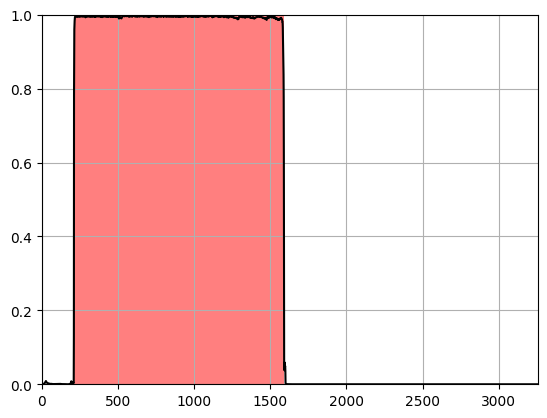

ENST00000536598
recall: 0.9976359605789185
iou: 0.3570219874382019
biotype: protein_coding
IP_067500  :  {'start': 59, 'stop': 185, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000443471  :  {'start': 160, 'stop': 583, 'MS': 9, 'TE': 0, 'frame': 2}
IP_683719  :  {'start': 696, 'stop': 789, 'MS': 0, 'TE': 0, 'frame': 1}
IP_683717  :  {'start': 1004, 'stop': 1094, 'MS': 0, 'TE': 0, 'frame': 3}
IP_683716  :  {'start': 1166, 'stop': 1358, 'MS': 0, 'TE': 0, 'frame': 3}
IP_683715  :  {'start': 1189, 'stop': 1279, 'MS': 0, 'TE': 0, 'frame': 2}
II_683718  :  {'start': 1278, 'stop': 2049, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067499  :  {'start': 1495, 'stop': 1660, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067498  :  {'start': 1666, 'stop': 1756, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067502  :  {'start': 1891, 'stop': 2059, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067495  :  {'start': 2333, 'stop': 2564, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067501  :  {'start': 2563, 'stop': 2707, 'MS': 0, 'TE': 0, 'frame': 2}


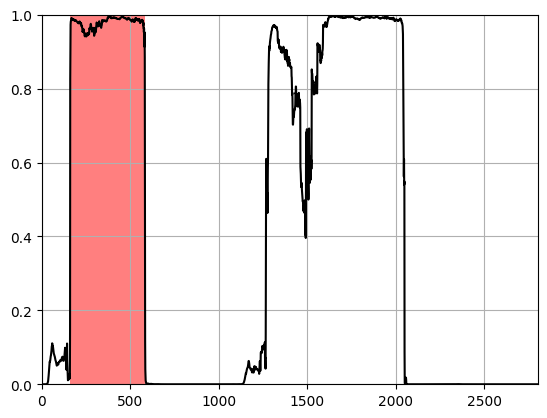

ENST00000338858
recall: 1.0
iou: 0.9917184114456177
biotype: protein_coding
ENSP00000345192  :  {'start': 0, 'stop': 1437, 'MS': 54, 'TE': 0, 'frame': 1}
IP_067500  :  {'start': 184, 'stop': 310, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067492  :  {'start': 653, 'stop': 746, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067499  :  {'start': 883, 'stop': 1048, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067498  :  {'start': 1054, 'stop': 1144, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067502  :  {'start': 1279, 'stop': 1447, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067495  :  {'start': 1721, 'stop': 1952, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067501  :  {'start': 1951, 'stop': 2095, 'MS': 0, 'TE': 0, 'frame': 2}


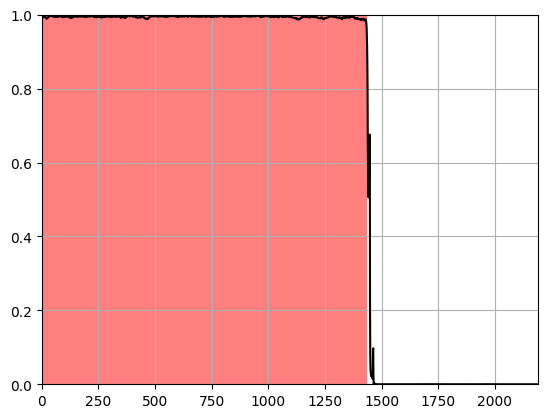

ENST00000369995
recall: 0.9965004324913025
iou: 0.9965004324913025
biotype: protein_coding
IP_067672  :  {'start': 62, 'stop': 161, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000359012  :  {'start': 259, 'stop': 2545, 'MS': 23, 'TE': 0, 'frame': 2}
IP_067669  :  {'start': 494, 'stop': 629, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067671  :  {'start': 671, 'stop': 851, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067673  :  {'start': 1757, 'stop': 1856, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067670  :  {'start': 2162, 'stop': 2402, 'MS': 1, 'TE': 0, 'frame': 3}
IP_680397  :  {'start': 2402, 'stop': 2534, 'MS': 0, 'TE': 0, 'frame': 3}


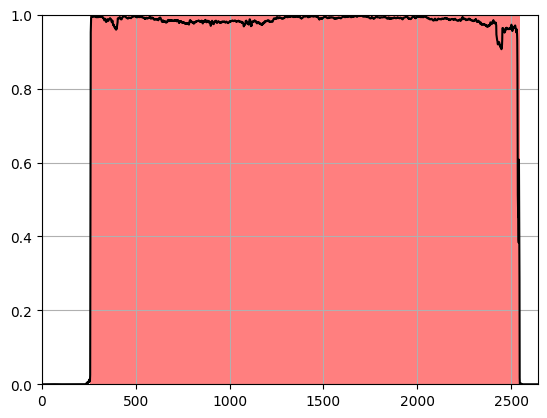

ENST00000370001
recall: 1.0
iou: 0.9940617680549622
biotype: protein_coding
IP_067672  :  {'start': 72, 'stop': 171, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000359018  :  {'start': 269, 'stop': 2780, 'MS': 23, 'TE': 0, 'frame': 3}
IP_067669  :  {'start': 504, 'stop': 639, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067671  :  {'start': 681, 'stop': 861, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067673  :  {'start': 1767, 'stop': 1866, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067670  :  {'start': 2172, 'stop': 2412, 'MS': 1, 'TE': 0, 'frame': 1}


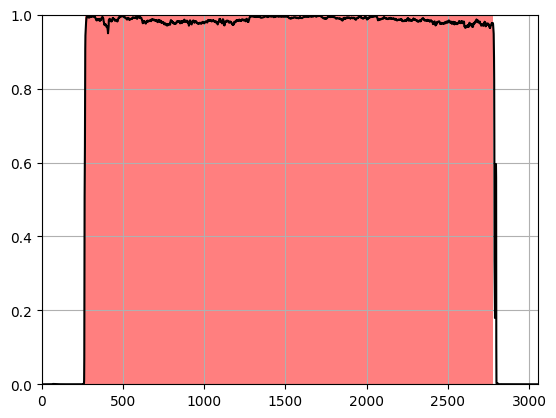

ENST00000256637
recall: 0.9995993375778198
iou: 0.9991990327835083
biotype: protein_coding
ENSP00000256637  :  {'start': 59, 'stop': 2555, 'MS': 834, 'TE': 36, 'frame': 3}
IP_067840  :  {'start': 105, 'stop': 228, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067832  :  {'start': 507, 'stop': 612, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067833  :  {'start': 768, 'stop': 963, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067822  :  {'start': 802, 'stop': 898, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067825  :  {'start': 916, 'stop': 1018, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067842  :  {'start': 1155, 'stop': 1281, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067838  :  {'start': 1569, 'stop': 1698, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067835  :  {'start': 1947, 'stop': 2037, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067819  :  {'start': 2224, 'stop': 2509, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067843  :  {'start': 2400, 'stop': 2706, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067830  :  {'start': 2579, 'stop': 2888, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067823  :  {'start':

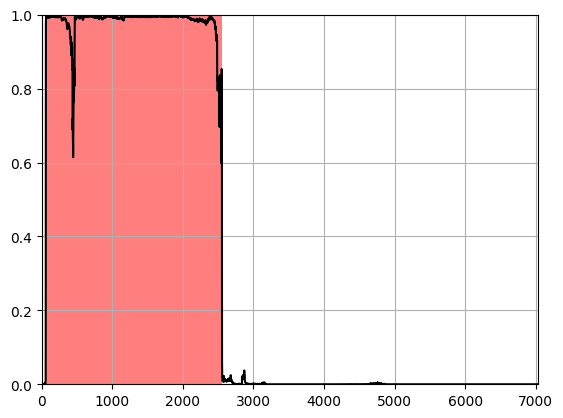

ENST00000538502
recall: 0.9995203614234924
iou: 0.9990411996841431
biotype: protein_coding
IP_067844  :  {'start': 6, 'stop': 111, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067845  :  {'start': 159, 'stop': 342, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000438597  :  {'start': 433, 'stop': 2518, 'MS': 714, 'TE': 1, 'frame': 2}
IP_067832  :  {'start': 473, 'stop': 578, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067848  :  {'start': 734, 'stop': 926, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067846  :  {'start': 768, 'stop': 861, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067825  :  {'start': 879, 'stop': 981, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067842  :  {'start': 1118, 'stop': 1244, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067838  :  {'start': 1532, 'stop': 1661, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067835  :  {'start': 1910, 'stop': 2000, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067819  :  {'start': 2187, 'stop': 2472, 'MS': 0, 'TE': 0, 'frame': 1}
IP_067843  :  {'start': 2363, 'stop': 2669, 'MS': 0, 'TE': 0, 'frame': 3}
IP_067830  :  {'start': 2542

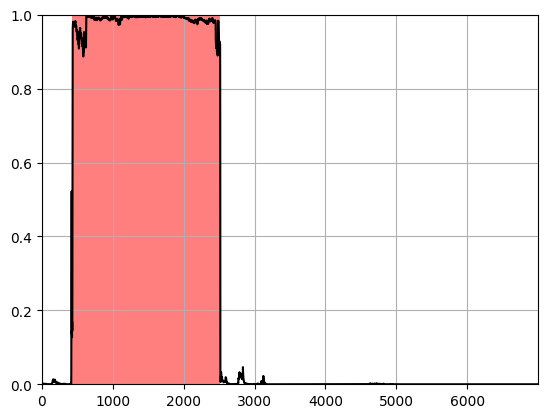

ENST00000361965
recall: 1.0
iou: 0.9994391202926636
biotype: protein_coding
ENSP00000355255  :  {'start': 107, 'stop': 1889, 'MS': 319, 'TE': 0, 'frame': 3}
IP_068002  :  {'start': 214, 'stop': 355, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067998  :  {'start': 405, 'stop': 525, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068000  :  {'start': 604, 'stop': 856, 'MS': 0, 'TE': 0, 'frame': 2}
IP_067999  :  {'start': 1578, 'stop': 1752, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068001  :  {'start': 1816, 'stop': 1957, 'MS': 0, 'TE': 0, 'frame': 2}


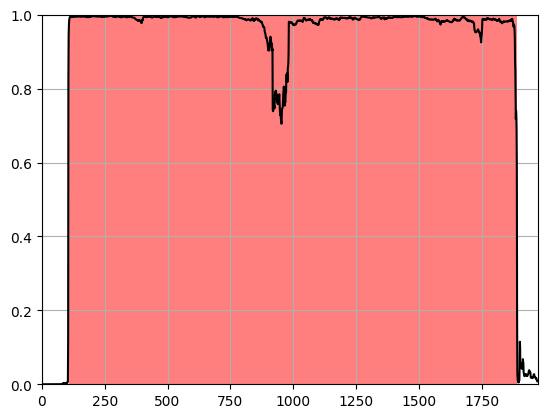

ENST00000309276
recall: 1.0
iou: 0.9947575330734253
biotype: protein_coding
ENSP00000308926  :  {'start': 176, 'stop': 1694, 'MS': 48, 'TE': 1, 'frame': 3}
IP_068362  :  {'start': 426, 'stop': 720, 'MS': 1, 'TE': 1, 'frame': 1}
IP_068364  :  {'start': 1002, 'stop': 1113, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068363  :  {'start': 1524, 'stop': 1773, 'MS': 0, 'TE': 0, 'frame': 1}


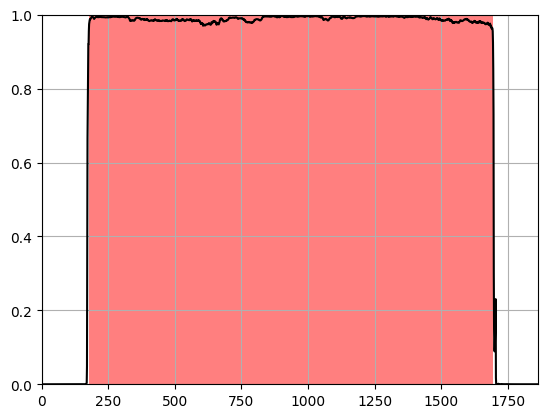

ENST00000528414
recall: 1.0
iou: 0.9977915287017822
biotype: protein_coding
IP_068451  :  {'start': 28, 'stop': 163, 'MS': 0, 'TE': 0, 'frame': 2}
ENSP00000435176  :  {'start': 75, 'stop': 2334, 'MS': 65, 'TE': 0, 'frame': 1}
IP_068457  :  {'start': 310, 'stop': 424, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068456  :  {'start': 469, 'stop': 586, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068453  :  {'start': 706, 'stop': 817, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068454  :  {'start': 820, 'stop': 925, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068452  :  {'start': 1738, 'stop': 1849, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068455  :  {'start': 2581, 'stop': 2734, 'MS': 0, 'TE': 0, 'frame': 2}
IP_068449  :  {'start': 2999, 'stop': 3107, 'MS': 0, 'TE': 0, 'frame': 3}


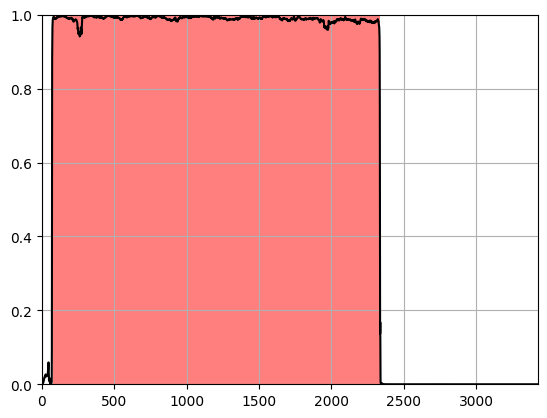

ENST00000525799
recall: 1.0
iou: 0.9955357313156128
biotype: protein_coding
IP_068451  :  {'start': 42, 'stop': 177, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000432674  :  {'start': 89, 'stop': 2096, 'MS': 63, 'TE': 0, 'frame': 3}
IP_068457  :  {'start': 324, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068459  :  {'start': 591, 'stop': 723, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068452  :  {'start': 1536, 'stop': 1647, 'MS': 0, 'TE': 0, 'frame': 1}


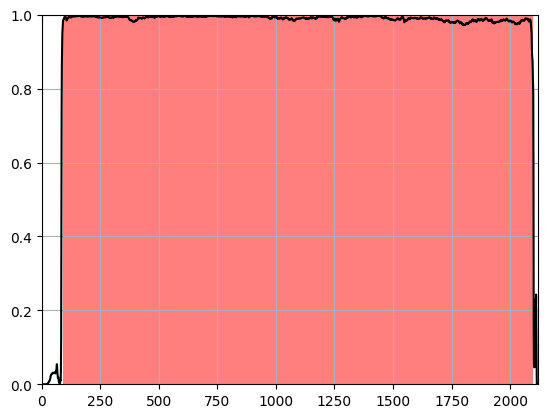

ENST00000460620
recall: 0.9962962865829468
iou: 0.9926199316978455
biotype: protein_coding
IP_068451  :  {'start': 42, 'stop': 177, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000433141  :  {'start': 89, 'stop': 629, 'MS': 11, 'TE': 0, 'frame': 3}
IP_068457  :  {'start': 324, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068455  :  {'start': 947, 'stop': 1100, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068449  :  {'start': 1365, 'stop': 1473, 'MS': 0, 'TE': 0, 'frame': 1}


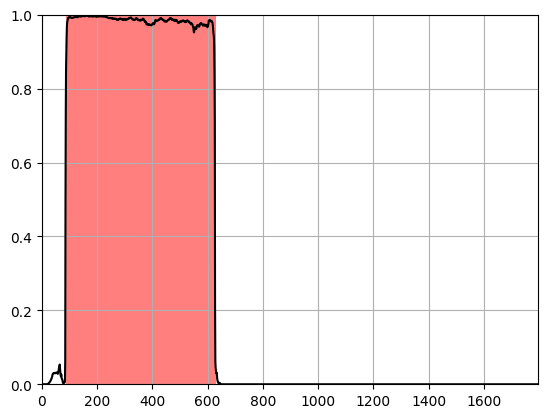

ENST00000420377
recall: 1.0
iou: 0.9962453246116638
biotype: protein_coding
IP_068451  :  {'start': 42, 'stop': 177, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000388229  :  {'start': 89, 'stop': 2477, 'MS': 66, 'TE': 0, 'frame': 3}
IP_068457  :  {'start': 324, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068456  :  {'start': 483, 'stop': 600, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068453  :  {'start': 720, 'stop': 831, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068459  :  {'start': 972, 'stop': 1104, 'MS': 0, 'TE': 0, 'frame': 1}
IP_068452  :  {'start': 1917, 'stop': 2028, 'MS': 0, 'TE': 0, 'frame': 1}


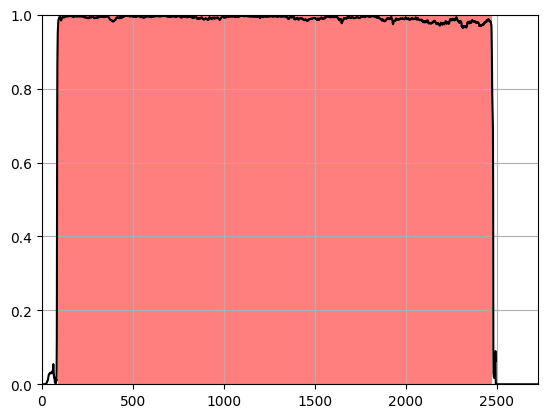

ENST00000359785
recall: 1.0
iou: 0.9971204996109009
biotype: protein_coding
IP_068451  :  {'start': 89, 'stop': 224, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000352833  :  {'start': 136, 'stop': 2560, 'MS': 66, 'TE': 2, 'frame': 2}
IP_068457  :  {'start': 371, 'stop': 485, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068456  :  {'start': 530, 'stop': 647, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068453  :  {'start': 767, 'stop': 878, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068459  :  {'start': 1019, 'stop': 1151, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068452  :  {'start': 1964, 'stop': 2075, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068455  :  {'start': 2807, 'stop': 2960, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068449  :  {'start': 3225, 'stop': 3333, 'MS': 0, 'TE': 0, 'frame': 1}


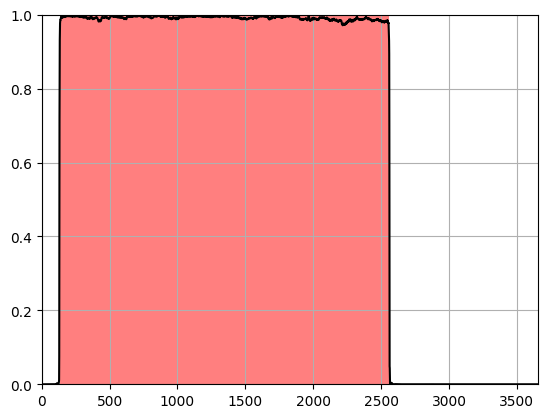

ENST00000538253
recall: 1.0
iou: 0.9991503953933716
biotype: protein_coding
IP_068451  :  {'start': 83, 'stop': 218, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000439372  :  {'start': 130, 'stop': 2482, 'MS': 66, 'TE': 0, 'frame': 2}
IP_068457  :  {'start': 365, 'stop': 479, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068453  :  {'start': 689, 'stop': 800, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068459  :  {'start': 941, 'stop': 1073, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068452  :  {'start': 1886, 'stop': 1997, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068455  :  {'start': 2729, 'stop': 2882, 'MS': 0, 'TE': 0, 'frame': 3}
IP_068449  :  {'start': 3147, 'stop': 3255, 'MS': 0, 'TE': 0, 'frame': 1}


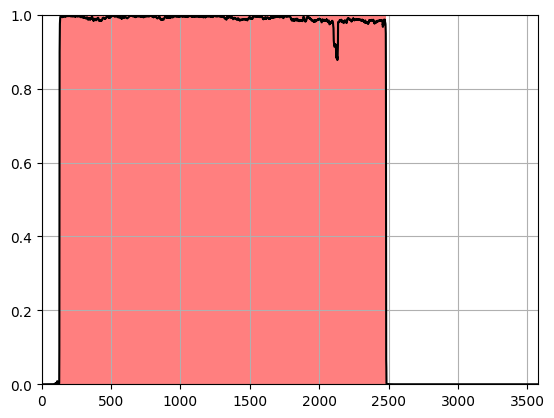

ENST00000584486
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000463032  :  {'start': 824, 'stop': 1274, 'MS': 0, 'TE': 12, 'frame': 3}
IP_069157  :  {'start': 1858, 'stop': 1954, 'MS': 0, 'TE': 0, 'frame': 2}


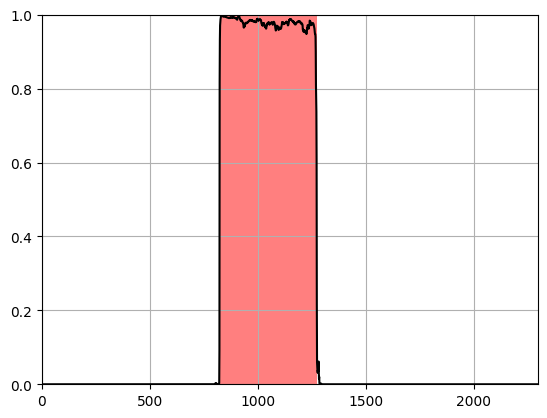

ENST00000606933
recall: 1.0
iou: 0.999476969242096
biotype: protein_coding
ENSP00000475847  :  {'start': 31, 'stop': 1942, 'MS': 982, 'TE': 0, 'frame': 2}
II_069910  :  {'start': 255, 'stop': 348, 'MS': 0, 'TE': 0, 'frame': 1}
IP_069909  :  {'start': 506, 'stop': 626, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069908  :  {'start': 1154, 'stop': 1343, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069906  :  {'start': 1379, 'stop': 1481, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069907  :  {'start': 1922, 'stop': 2018, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069904  :  {'start': 2020, 'stop': 2134, 'MS': 0, 'TE': 0, 'frame': 2}


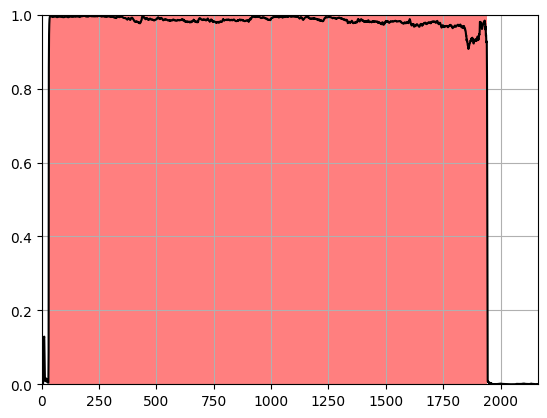

ENST00000369064
recall: 1.0
iou: 0.9940091967582703
biotype: protein_coding
ENSP00000358060  :  {'start': 34, 'stop': 2191, 'MS': 1175, 'TE': 34, 'frame': 2}
II_069910  :  {'start': 258, 'stop': 351, 'MS': 0, 'TE': 0, 'frame': 1}
IP_069909  :  {'start': 509, 'stop': 629, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069911  :  {'start': 822, 'stop': 981, 'MS': 0, 'TE': 0, 'frame': 1}
IP_069908  :  {'start': 1403, 'stop': 1592, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069906  :  {'start': 1628, 'stop': 1730, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069907  :  {'start': 2171, 'stop': 2267, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069912  :  {'start': 2205, 'stop': 2442, 'MS': 0, 'TE': 0, 'frame': 1}
IP_069904  :  {'start': 2269, 'stop': 2383, 'MS': 0, 'TE': 0, 'frame': 2}


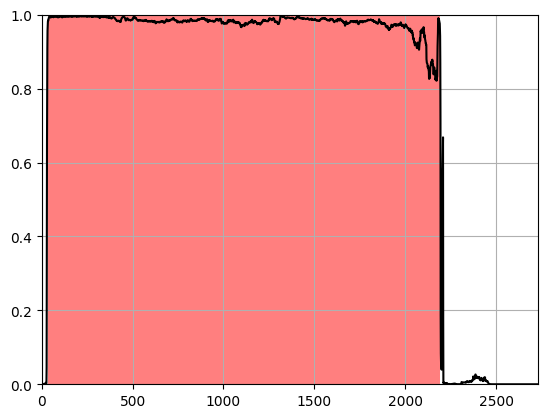

ENST00000369054
recall: 1.0
iou: 0.9926966428756714
biotype: protein_coding
ENSP00000358050  :  {'start': 37, 'stop': 1804, 'MS': 899, 'TE': 0, 'frame': 2}
II_069910  :  {'start': 261, 'stop': 354, 'MS': 0, 'TE': 0, 'frame': 1}
IP_069909  :  {'start': 512, 'stop': 632, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069908  :  {'start': 1016, 'stop': 1205, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069906  :  {'start': 1241, 'stop': 1343, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069907  :  {'start': 1784, 'stop': 1880, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069904  :  {'start': 1882, 'stop': 1996, 'MS': 0, 'TE': 0, 'frame': 2}


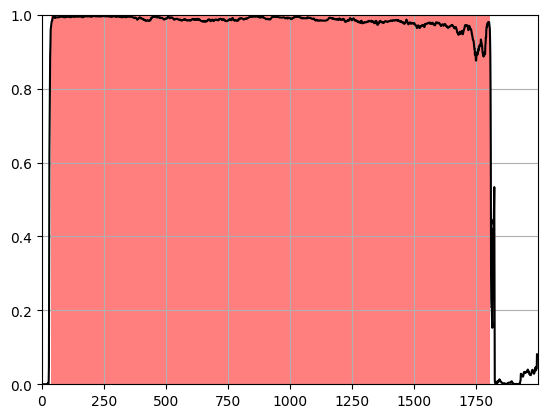

ENST00000339643
recall: 0.9951691031455994
iou: 0.9927710890769958
biotype: protein_coding
ENSP00000341743  :  {'start': 106, 'stop': 520, 'MS': 598, 'TE': 13, 'frame': 2}


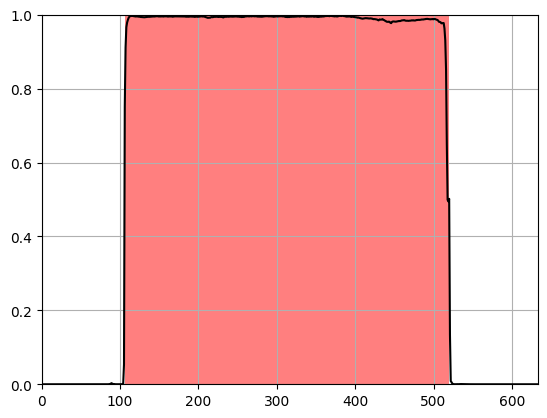

ENST00000361631
recall: 0.9950248599052429
iou: 0.9732360243797302
biotype: protein_coding
ENSP00000355239  :  {'start': 23, 'stop': 425, 'MS': 428, 'TE': 3, 'frame': 3}
IP_069954  :  {'start': 421, 'stop': 652, 'MS': 0, 'TE': 0, 'frame': 2}


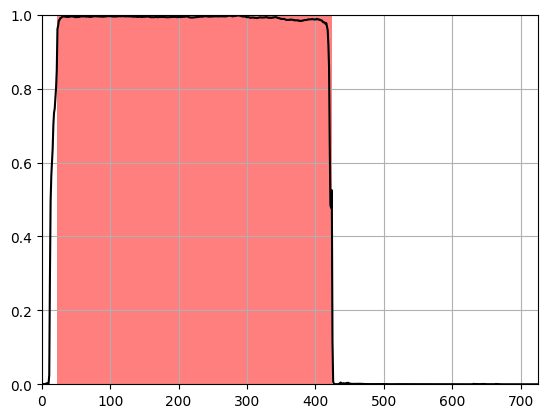

ENST00000356527
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000348921  :  {'start': 107, 'stop': 530, 'MS': 595, 'TE': 4, 'frame': 3}
IP_069962  :  {'start': 1151, 'stop': 1292, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069964  :  {'start': 1856, 'stop': 1973, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069961  :  {'start': 2227, 'stop': 2386, 'MS': 0, 'TE': 0, 'frame': 2}


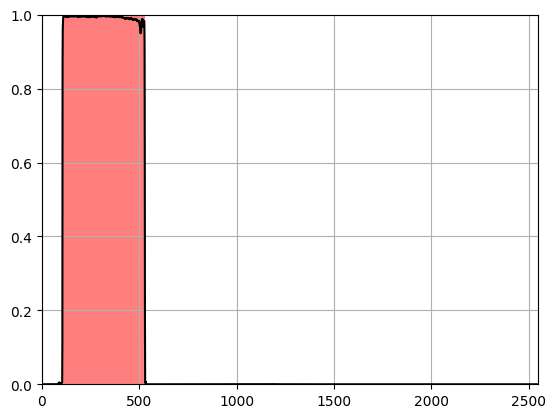

ENST00000271690
recall: 0.991525411605835
iou: 0.9804469347000122
biotype: protein_coding
ENSP00000271690  :  {'start': 107, 'stop': 461, 'MS': 589, 'TE': 0, 'frame': 3}
IP_069962  :  {'start': 1082, 'stop': 1223, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069964  :  {'start': 1787, 'stop': 1904, 'MS': 0, 'TE': 0, 'frame': 3}
IP_069961  :  {'start': 2158, 'stop': 2317, 'MS': 0, 'TE': 0, 'frame': 2}
IP_069959  :  {'start': 2344, 'stop': 2587, 'MS': 0, 'TE': 0, 'frame': 2}


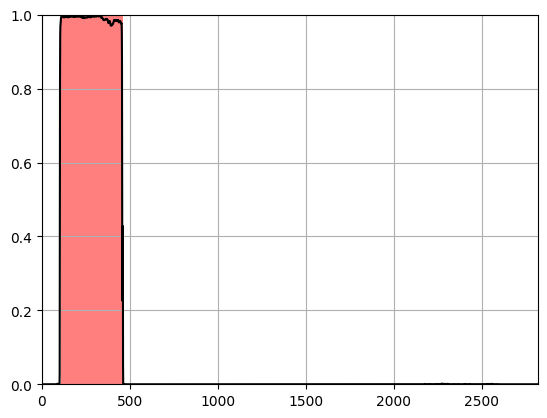

ENST00000368729
recall: 0.9901960492134094
iou: 0.904477596282959
biotype: protein_coding
ENSP00000357718  :  {'start': 57, 'stop': 363, 'MS': 26, 'TE': 0, 'frame': 1}
IP_070666  :  {'start': 563, 'stop': 845, 'MS': 0, 'TE': 0, 'frame': 3}
IP_070665  :  {'start': 712, 'stop': 1039, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070670  :  {'start': 884, 'stop': 1016, 'MS': 0, 'TE': 0, 'frame': 3}
IP_070659  :  {'start': 1306, 'stop': 1435, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070658  :  {'start': 1362, 'stop': 1689, 'MS': 0, 'TE': 0, 'frame': 1}
IP_070660  :  {'start': 1882, 'stop': 2047, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070671  :  {'start': 2147, 'stop': 2285, 'MS': 0, 'TE': 0, 'frame': 3}
IP_070664  :  {'start': 2284, 'stop': 2377, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070669  :  {'start': 2420, 'stop': 2519, 'MS': 0, 'TE': 0, 'frame': 3}
IP_070663  :  {'start': 2446, 'stop': 2548, 'MS': 0, 'TE': 0, 'frame': 2}
IP_070656  :  {'start': 2703, 'stop': 2874, 'MS': 0, 'TE': 0, 'frame': 1}
IP_070661  :  {'start'

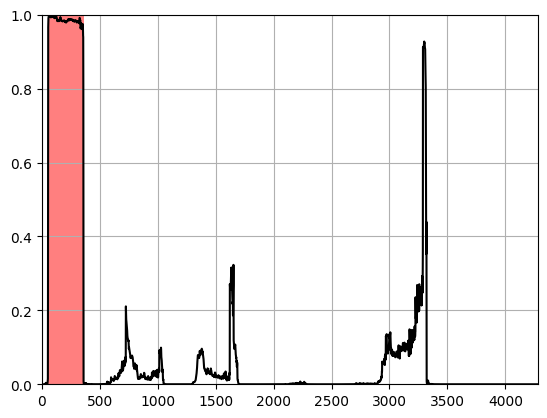

ENST00000497140
recall: 0.8051282167434692
iou: 0.8010203838348389
biotype: protein_coding
IP_070687  :  {'start': 21, 'stop': 162, 'MS': 0, 'TE': 3, 'frame': 1}
IP_678094  :  {'start': 225, 'stop': 396, 'MS': 0, 'TE': 1, 'frame': 1}
ENSP00000473489  :  {'start': 403, 'stop': 598, 'MS': 177, 'TE': 0, 'frame': 2}
IP_070686  :  {'start': 491, 'stop': 674, 'MS': 1, 'TE': 0, 'frame': 3}


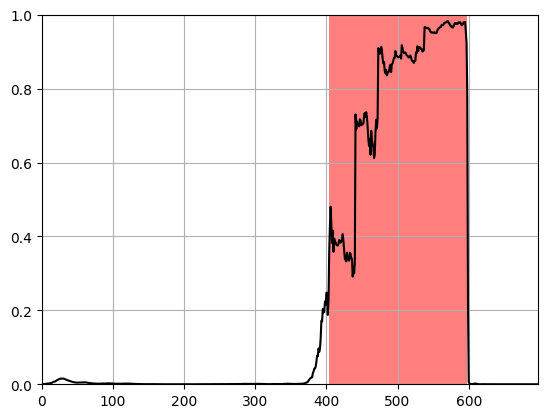

ENST00000368401
recall: 0.7984032034873962
iou: 0.7936508059501648
biotype: protein_coding
ENSP00000357386  :  {'start': 141, 'stop': 642, 'MS': 11, 'TE': 0, 'frame': 1}
IP_071298  :  {'start': 310, 'stop': 430, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071295  :  {'start': 449, 'stop': 656, 'MS': 0, 'TE': 1, 'frame': 3}
IP_071299  :  {'start': 508, 'stop': 808, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071296  :  {'start': 800, 'stop': 971, 'MS': 0, 'TE': 0, 'frame': 3}


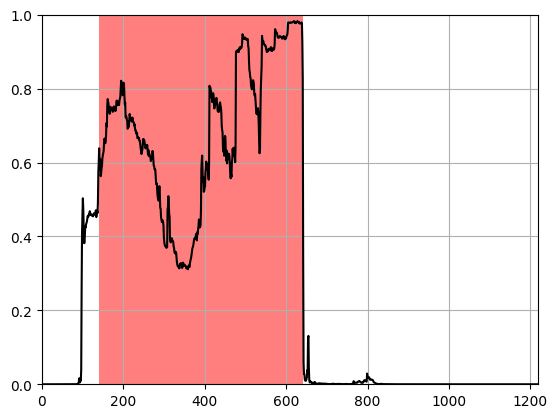

ENST00000622581
recall: 1.0
iou: 0.9906191229820251
biotype: protein_coding
ENSP00000481368  :  {'start': 141, 'stop': 669, 'MS': 11, 'TE': 0, 'frame': 1}
IP_071298  :  {'start': 337, 'stop': 457, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071295  :  {'start': 476, 'stop': 683, 'MS': 0, 'TE': 1, 'frame': 3}
IP_071299  :  {'start': 535, 'stop': 835, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071296  :  {'start': 827, 'stop': 998, 'MS': 0, 'TE': 0, 'frame': 3}


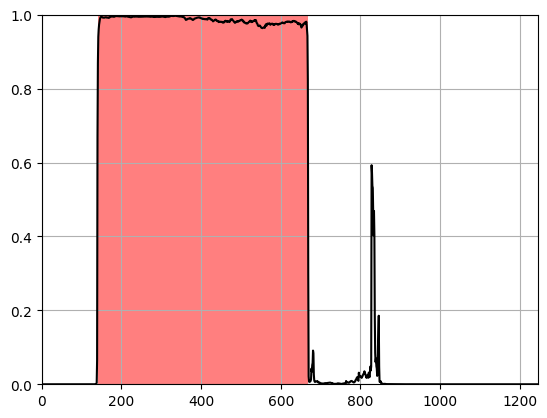

ENST00000484157
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000420189  :  {'start': 328, 'stop': 799, 'MS': 11, 'TE': 0, 'frame': 2}
II_071300  :  {'start': 353, 'stop': 449, 'MS': 0, 'TE': 4, 'frame': 3}
IP_071298  :  {'start': 467, 'stop': 587, 'MS': 0, 'TE': 0, 'frame': 3}
IP_071295  :  {'start': 606, 'stop': 813, 'MS': 0, 'TE': 1, 'frame': 1}


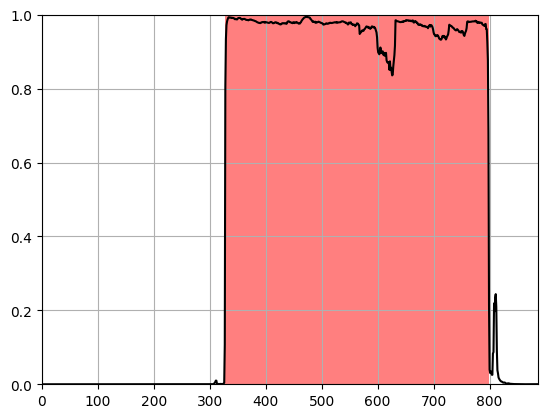

ENST00000368404
recall: 1.0
iou: 0.9985007643699646
biotype: protein_coding
ENSP00000357389  :  {'start': 62, 'stop': 728, 'MS': 15, 'TE': 31, 'frame': 3}
II_071311  :  {'start': 103, 'stop': 430, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071298  :  {'start': 396, 'stop': 516, 'MS': 0, 'TE': 0, 'frame': 1}
IP_071295  :  {'start': 535, 'stop': 742, 'MS': 0, 'TE': 1, 'frame': 2}
IP_071299  :  {'start': 594, 'stop': 894, 'MS': 0, 'TE': 0, 'frame': 1}
IP_071296  :  {'start': 886, 'stop': 1057, 'MS': 0, 'TE': 0, 'frame': 2}


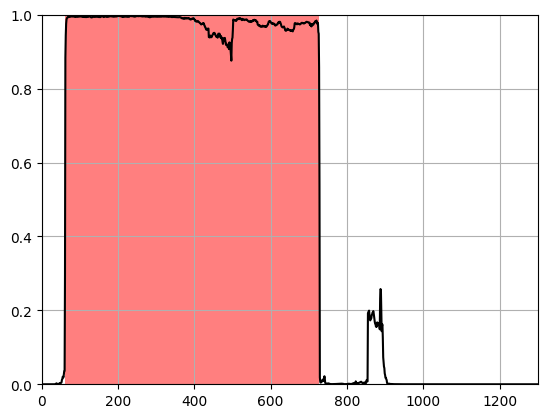

ENST00000303343
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000306146  :  {'start': 62, 'stop': 566, 'MS': 15, 'TE': 0, 'frame': 3}
II_071313  :  {'start': 103, 'stop': 349, 'MS': 0, 'TE': 0, 'frame': 2}
IP_071295  :  {'start': 373, 'stop': 580, 'MS': 0, 'TE': 1, 'frame': 2}
IP_071299  :  {'start': 432, 'stop': 732, 'MS': 0, 'TE': 0, 'frame': 1}
IP_071296  :  {'start': 724, 'stop': 895, 'MS': 0, 'TE': 0, 'frame': 2}


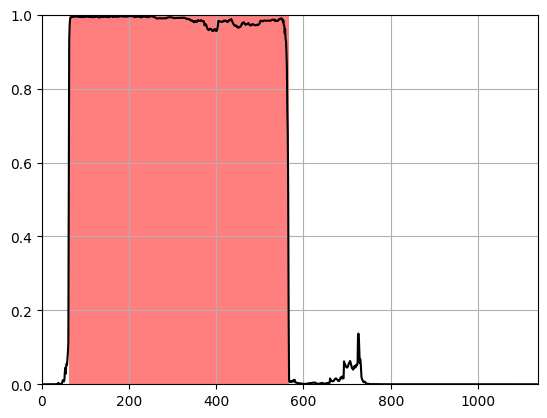

ENST00000368170
recall: 1.0
iou: 0.9970149397850037
biotype: protein_coding
IP_072299  :  {'start': 165, 'stop': 255, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000357152  :  {'start': 279, 'stop': 1281, 'MS': 35, 'TE': 0, 'frame': 1}
IP_072302  :  {'start': 331, 'stop': 475, 'MS': 0, 'TE': 0, 'frame': 2}


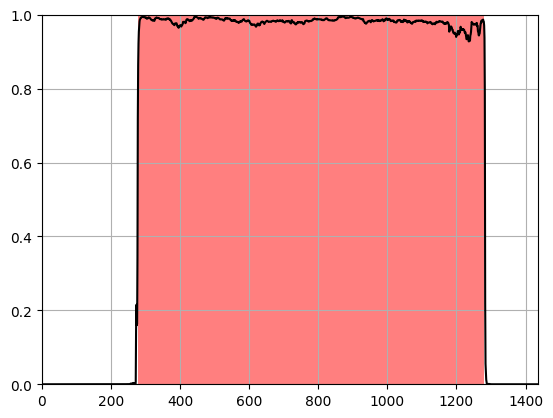

ENST00000368110
recall: 0.9967637658119202
iou: 0.9935483932495117
biotype: protein_coding
ENSP00000357091  :  {'start': 104, 'stop': 413, 'MS': 114, 'TE': 0, 'frame': 3}
IP_072446  :  {'start': 147, 'stop': 237, 'MS': 0, 'TE': 0, 'frame': 1}
IP_679888  :  {'start': 366, 'stop': 624, 'MS': 0, 'TE': 0, 'frame': 1}


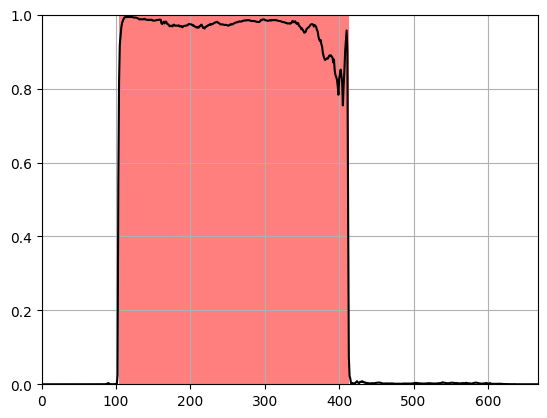

ENST00000255030
recall: 0.9970370531082153
iou: 0.9940915703773499
biotype: protein_coding
ENSP00000255030  :  {'start': 104, 'stop': 779, 'MS': 214, 'TE': 1, 'frame': 3}
IP_072446  :  {'start': 147, 'stop': 237, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072445  :  {'start': 732, 'stop': 1026, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072448  :  {'start': 1192, 'stop': 1444, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072447  :  {'start': 1524, 'stop': 1698, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072450  :  {'start': 1754, 'stop': 1940, 'MS': 0, 'TE': 0, 'frame': 3}


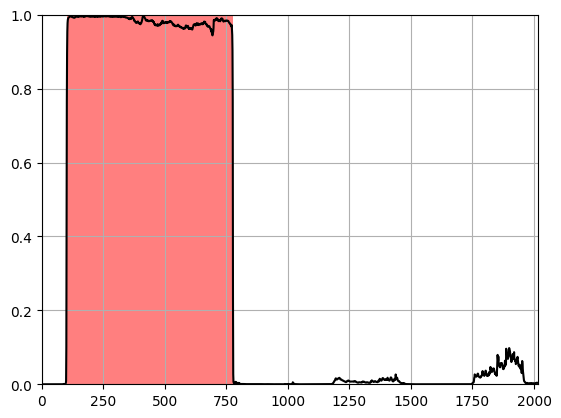

ENST00000368112
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000357093  :  {'start': 104, 'stop': 380, 'MS': 111, 'TE': 0, 'frame': 3}
IP_072446  :  {'start': 147, 'stop': 237, 'MS': 0, 'TE': 0, 'frame': 1}
IP_679888  :  {'start': 333, 'stop': 591, 'MS': 0, 'TE': 0, 'frame': 1}


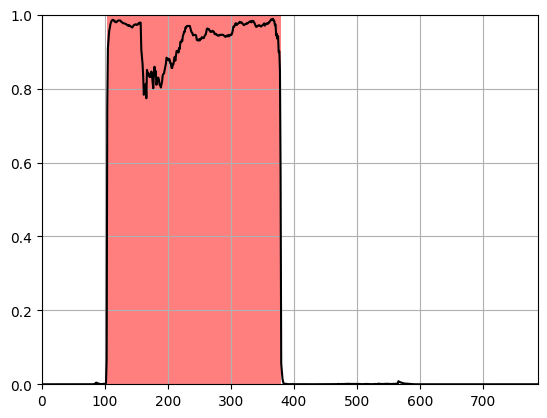

ENST00000368111
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000357092  :  {'start': 104, 'stop': 413, 'MS': 114, 'TE': 0, 'frame': 3}
IP_072446  :  {'start': 147, 'stop': 237, 'MS': 0, 'TE': 0, 'frame': 1}
IP_679890  :  {'start': 366, 'stop': 483, 'MS': 0, 'TE': 0, 'frame': 1}


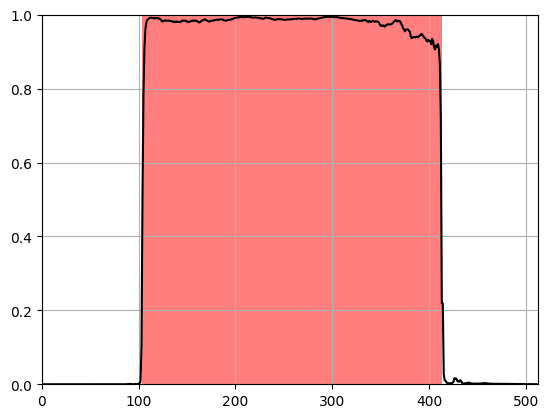

ENST00000437342
recall: 0.8723404407501221
iou: 0.8723404407501221
biotype: protein_coding
ENSP00000402788  :  {'start': 398, 'stop': 539, 'MS': 58, 'TE': 0, 'frame': 3}
IP_679888  :  {'start': 492, 'stop': 750, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072450  :  {'start': 806, 'stop': 992, 'MS': 0, 'TE': 0, 'frame': 3}


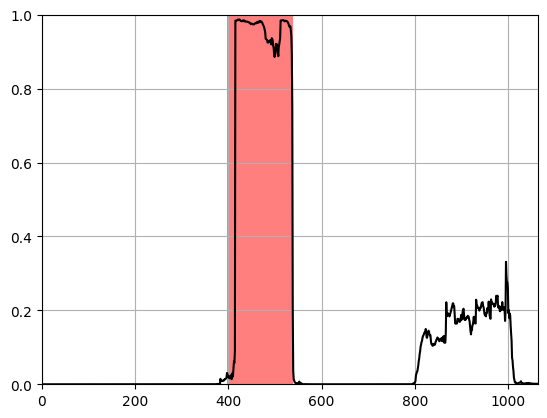

ENST00000534968
recall: 0.9860464930534363
iou: 0.9650986194610596
biotype: protein_coding
ENSP00000442845  :  {'start': 79, 'stop': 724, 'MS': 65, 'TE': 0, 'frame': 2}
IP_072686  :  {'start': 96, 'stop': 186, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072705  :  {'start': 497, 'stop': 623, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072704  :  {'start': 1175, 'stop': 1373, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072696  :  {'start': 1195, 'stop': 1330, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072688  :  {'start': 1296, 'stop': 1401, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072689  :  {'start': 1461, 'stop': 1752, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072700  :  {'start': 1748, 'stop': 1883, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072697  :  {'start': 1840, 'stop': 1942, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072685  :  {'start': 2283, 'stop': 2634, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072694  :  {'start': 2347, 'stop': 2521, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072702  :  {'start': 2402, 'stop': 2552, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072699  :  {'start'

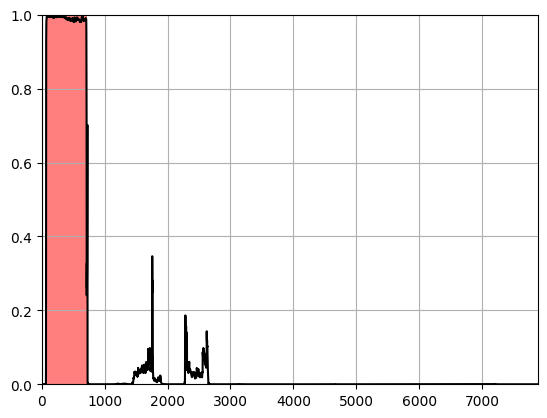

ENST00000368054
recall: 0.996960461139679
iou: 0.9959514141082764
biotype: protein_coding
ENSP00000357033  :  {'start': 36, 'stop': 1023, 'MS': 156, 'TE': 2, 'frame': 1}
IP_072709  :  {'start': 53, 'stop': 185, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072705  :  {'start': 796, 'stop': 922, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072704  :  {'start': 1474, 'stop': 1672, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072696  :  {'start': 1494, 'stop': 1629, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072688  :  {'start': 1595, 'stop': 1700, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072689  :  {'start': 1760, 'stop': 2051, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072700  :  {'start': 2047, 'stop': 2182, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072697  :  {'start': 2139, 'stop': 2241, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072685  :  {'start': 2582, 'stop': 2933, 'MS': 0, 'TE': 0, 'frame': 3}
IP_072694  :  {'start': 2646, 'stop': 2820, 'MS': 0, 'TE': 0, 'frame': 1}
IP_072702  :  {'start': 2701, 'stop': 2851, 'MS': 0, 'TE': 0, 'frame': 2}
IP_072699  :  {'start

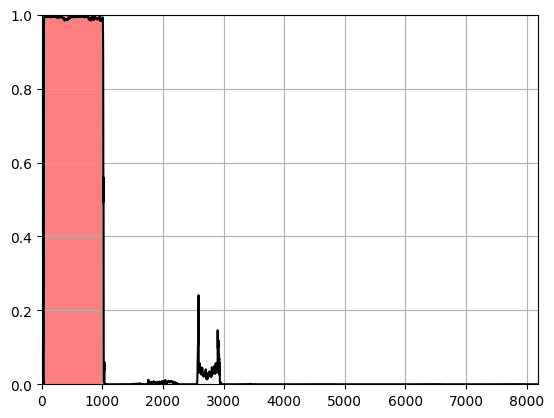

ENST00000540521
recall: 0.9931412935256958
iou: 0.9917808175086975
biotype: protein_coding
IP_073084  :  {'start': 141, 'stop': 234, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000442870  :  {'start': 242, 'stop': 971, 'MS': 37, 'TE': 0, 'frame': 3}
IP_073086  :  {'start': 988, 'stop': 1096, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073087  :  {'start': 1825, 'stop': 1915, 'MS': 0, 'TE': 0, 'frame': 2}


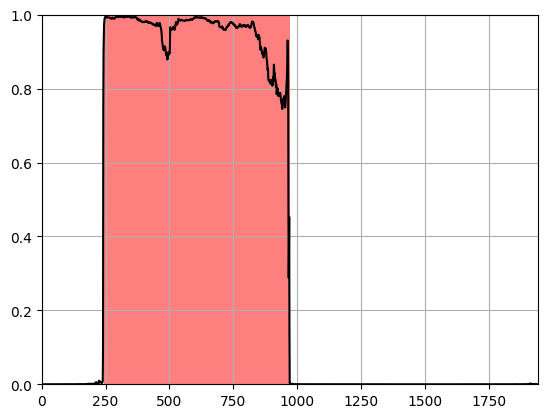

ENST00000546024
recall: 1.0
iou: 0.9976905584335327
biotype: protein_coding
IP_073084  :  {'start': 141, 'stop': 234, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000439838  :  {'start': 242, 'stop': 1106, 'MS': 39, 'TE': 0, 'frame': 3}
IP_073086  :  {'start': 1123, 'stop': 1231, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073087  :  {'start': 1960, 'stop': 2050, 'MS': 0, 'TE': 0, 'frame': 2}


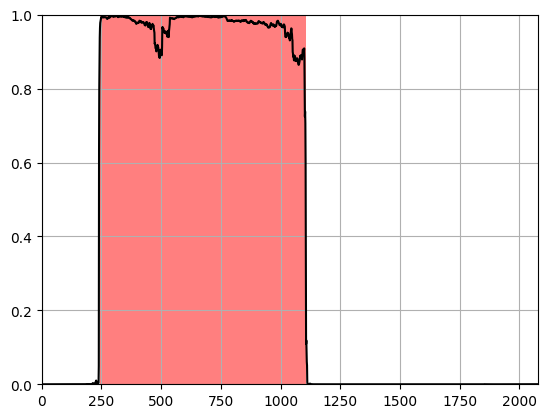

ENST00000271417
recall: 0.9989583492279053
iou: 0.99843829870224
biotype: protein_coding
ENSP00000271417  :  {'start': 56, 'stop': 1976, 'MS': 54, 'TE': 3, 'frame': 3}
IP_073450  :  {'start': 313, 'stop': 436, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073443  :  {'start': 432, 'stop': 876, 'MS': 0, 'TE': 0, 'frame': 1}
II_073440  :  {'start': 1941, 'stop': 2043, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073449  :  {'start': 1975, 'stop': 2095, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073442  :  {'start': 2337, 'stop': 2436, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073455  :  {'start': 2582, 'stop': 2678, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073441  :  {'start': 2895, 'stop': 3057, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073437  :  {'start': 3384, 'stop': 3528, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073452  :  {'start': 3679, 'stop': 3802, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073445  :  {'start': 3843, 'stop': 3951, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073438  :  {'start': 4035, 'stop': 4173, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073444  :  {'start'

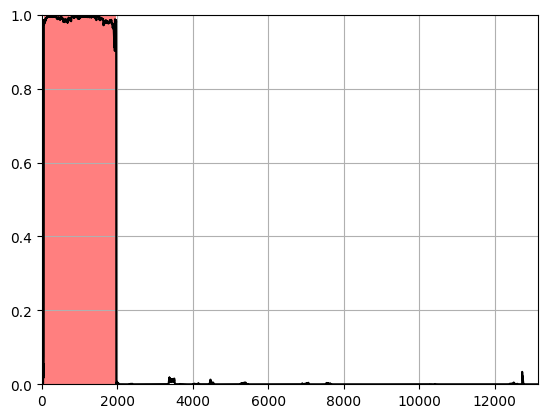

ENST00000526687
recall: 1.0
iou: 0.9975000023841858
biotype: protein_coding
ENSP00000434273  :  {'start': 214, 'stop': 1810, 'MS': 53, 'TE': 0, 'frame': 2}
IP_073450  :  {'start': 471, 'stop': 594, 'MS': 0, 'TE': 0, 'frame': 1}
IP_676625  :  {'start': 590, 'stop': 818, 'MS': 0, 'TE': 0, 'frame': 3}
II_073440  :  {'start': 1775, 'stop': 1877, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073449  :  {'start': 1809, 'stop': 1929, 'MS': 1, 'TE': 0, 'frame': 1}
IP_073442  :  {'start': 2171, 'stop': 2270, 'MS': 0, 'TE': 0, 'frame': 3}


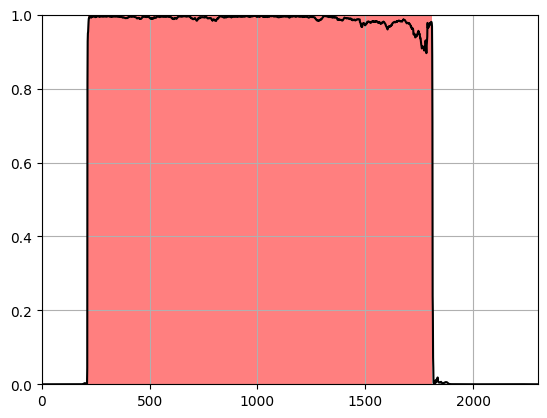

ENST00000528703
recall: 1.0
iou: 0.9942954778671265
biotype: protein_coding
ENSP00000432750  :  {'start': 214, 'stop': 1957, 'MS': 53, 'TE': 1, 'frame': 2}
IP_073450  :  {'start': 471, 'stop': 594, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073463  :  {'start': 590, 'stop': 965, 'MS': 0, 'TE': 0, 'frame': 3}
II_073440  :  {'start': 1922, 'stop': 2024, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073449  :  {'start': 1956, 'stop': 2076, 'MS': 1, 'TE': 0, 'frame': 1}
IP_073442  :  {'start': 2318, 'stop': 2417, 'MS': 0, 'TE': 0, 'frame': 3}


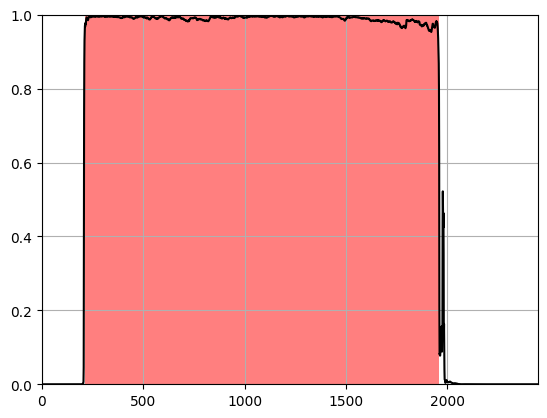

ENST00000529387
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000431316  :  {'start': 214, 'stop': 718, 'MS': 16, 'TE': 0, 'frame': 2}
IP_073450  :  {'start': 471, 'stop': 594, 'MS': 0, 'TE': 0, 'frame': 1}
II_676628  :  {'start': 590, 'stop': 749, 'MS': 0, 'TE': 0, 'frame': 3}
II_073440  :  {'start': 714, 'stop': 816, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073449  :  {'start': 748, 'stop': 868, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073442  :  {'start': 1110, 'stop': 1209, 'MS': 0, 'TE': 0, 'frame': 1}


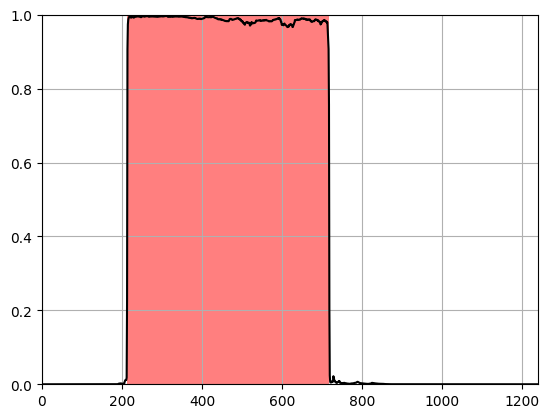

ENST00000525740
recall: 1.0
iou: 0.996761679649353
biotype: protein_coding
ENSP00000436120  :  {'start': 214, 'stop': 1753, 'MS': 53, 'TE': 0, 'frame': 2}
IP_073450  :  {'start': 471, 'stop': 594, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073459  :  {'start': 590, 'stop': 761, 'MS': 0, 'TE': 0, 'frame': 3}
II_073440  :  {'start': 1718, 'stop': 1820, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073449  :  {'start': 1752, 'stop': 1872, 'MS': 1, 'TE': 0, 'frame': 1}
IP_073442  :  {'start': 2114, 'stop': 2213, 'MS': 0, 'TE': 0, 'frame': 3}


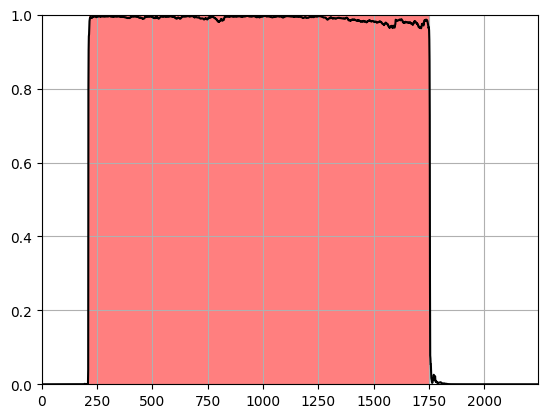

ENST00000529071
recall: 1.0
iou: 0.9957242012023926
biotype: protein_coding
ENSP00000436882  :  {'start': 214, 'stop': 2077, 'MS': 54, 'TE': 0, 'frame': 2}
IP_073450  :  {'start': 471, 'stop': 594, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073461  :  {'start': 590, 'stop': 977, 'MS': 0, 'TE': 0, 'frame': 3}
II_073440  :  {'start': 2042, 'stop': 2144, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073449  :  {'start': 2076, 'stop': 2196, 'MS': 1, 'TE': 0, 'frame': 1}
IP_073442  :  {'start': 2438, 'stop': 2537, 'MS': 0, 'TE': 0, 'frame': 3}


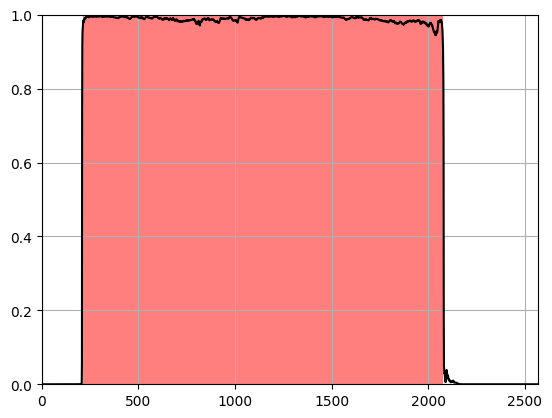

ENST00000539777
recall: 0.9955752491950989
iou: 0.7230851650238037
biotype: protein_coding
ENSP00000437576  :  {'start': 311, 'stop': 1667, 'MS': 74, 'TE': 1, 'frame': 3}
IP_073627  :  {'start': 601, 'stop': 955, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073620  :  {'start': 699, 'stop': 1044, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073626  :  {'start': 1006, 'stop': 1303, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073624  :  {'start': 1047, 'stop': 1293, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073632  :  {'start': 1753, 'stop': 1888, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073630  :  {'start': 1897, 'stop': 2401, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073640  :  {'start': 2582, 'stop': 2801, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073643  :  {'start': 3074, 'stop': 3167, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073635  :  {'start': 3478, 'stop': 3682, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073617  :  {'start': 3504, 'stop': 3639, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073633  :  {'start': 3928, 'stop': 4045, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073616  :  {'st

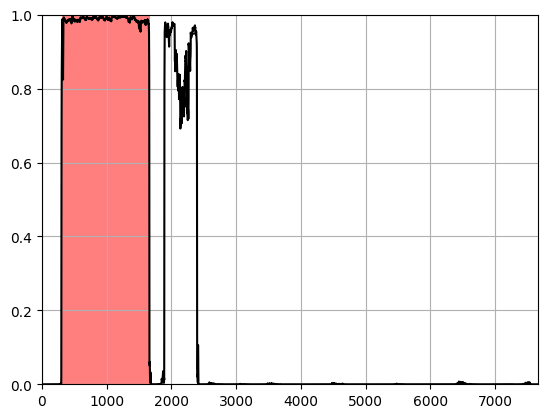

ENST00000546300
recall: 0.9975961446762085
iou: 0.7221577763557434
biotype: protein_coding
ENSP00000444348  :  {'start': 152, 'stop': 1400, 'MS': 75, 'TE': 0, 'frame': 3}
IP_073627  :  {'start': 334, 'stop': 688, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073620  :  {'start': 432, 'stop': 777, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073626  :  {'start': 739, 'stop': 1036, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073624  :  {'start': 780, 'stop': 1026, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073632  :  {'start': 1486, 'stop': 1621, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073630  :  {'start': 1630, 'stop': 2134, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073640  :  {'start': 2315, 'stop': 2534, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073643  :  {'start': 2807, 'stop': 2900, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073635  :  {'start': 3211, 'stop': 3415, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073617  :  {'start': 3237, 'stop': 3372, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073633  :  {'start': 3661, 'stop': 3778, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073616  :  {'start

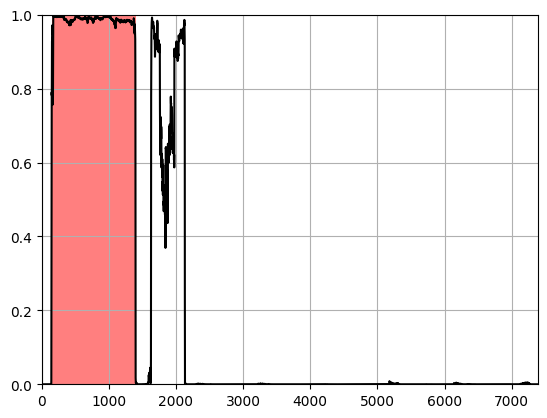

ENST00000271357
recall: 0.998171865940094
iou: 0.7604456543922424
biotype: protein_coding
II_073648  :  {'start': 152, 'stop': 272, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000271357  :  {'start': 177, 'stop': 1818, 'MS': 78, 'TE': 1, 'frame': 1}
IP_073631  :  {'start': 503, 'stop': 743, 'MS': 1, 'TE': 3, 'frame': 3}
IP_073627  :  {'start': 752, 'stop': 1106, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073620  :  {'start': 850, 'stop': 1195, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073626  :  {'start': 1157, 'stop': 1454, 'MS': 1, 'TE': 0, 'frame': 3}
IP_073624  :  {'start': 1198, 'stop': 1444, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073632  :  {'start': 1904, 'stop': 2039, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073630  :  {'start': 2048, 'stop': 2552, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073640  :  {'start': 2733, 'stop': 2952, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073643  :  {'start': 3225, 'stop': 3318, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073635  :  {'start': 3629, 'stop': 3833, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073617  :  {'start'

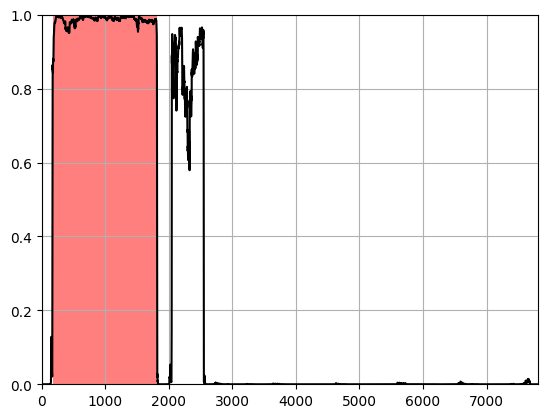

ENST00000537209
recall: 0.9981818199157715
iou: 0.7342844605445862
biotype: protein_coding
IP_073637  :  {'start': 92, 'stop': 275, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073628  :  {'start': 271, 'stop': 379, 'MS': 0, 'TE': 0, 'frame': 2}
ENSP00000441039  :  {'start': 618, 'stop': 2268, 'MS': 78, 'TE': 3, 'frame': 1}
IP_073631  :  {'start': 953, 'stop': 1193, 'MS': 1, 'TE': 3, 'frame': 3}
IP_073627  :  {'start': 1202, 'stop': 1556, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073620  :  {'start': 1300, 'stop': 1645, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073626  :  {'start': 1607, 'stop': 1904, 'MS': 1, 'TE': 0, 'frame': 3}
IP_073624  :  {'start': 1648, 'stop': 1894, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073632  :  {'start': 2354, 'stop': 2489, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073630  :  {'start': 2498, 'stop': 3002, 'MS': 0, 'TE': 0, 'frame': 3}
IP_073640  :  {'start': 3183, 'stop': 3402, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073643  :  {'start': 3675, 'stop': 3768, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073635  :  {'start

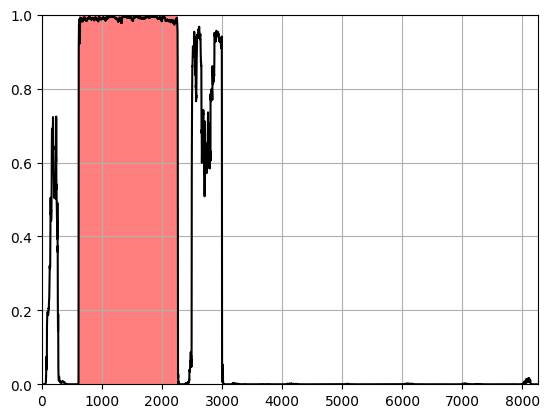

ENST00000367818
recall: 0.9971014261245728
iou: 0.9942196607589722
biotype: protein_coding
IP_073683  :  {'start': 38, 'stop': 239, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000356792  :  {'start': 165, 'stop': 510, 'MS': 6, 'TE': 1, 'frame': 1}
IP_073680  :  {'start': 861, 'stop': 963, 'MS': 0, 'TE': 0, 'frame': 1}


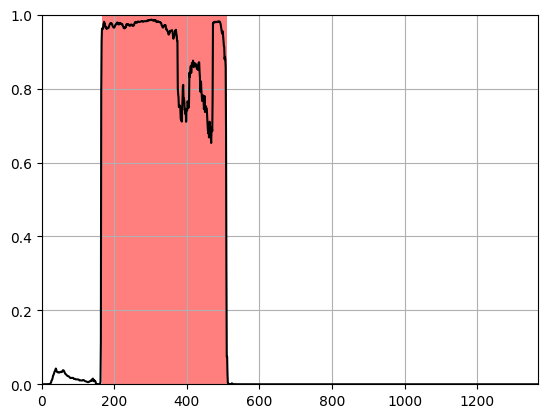

ENST00000367806
recall: 1.0
iou: 0.9954456686973572
biotype: protein_coding
ENSP00000356780  :  {'start': 153, 'stop': 1683, 'MS': 23, 'TE': 3, 'frame': 1}
IP_073717  :  {'start': 373, 'stop': 481, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073718  :  {'start': 883, 'stop': 1141, 'MS': 1, 'TE': 0, 'frame': 2}


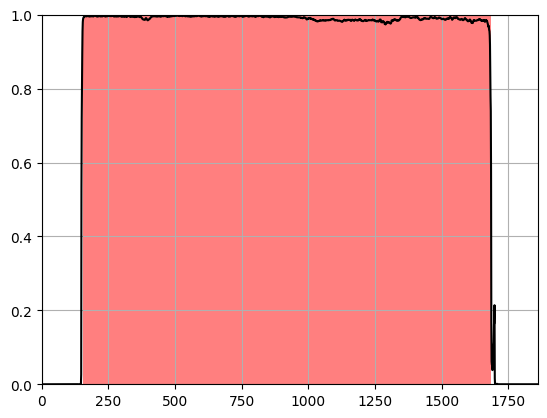

ENST00000367742
recall: 0.9921985864639282
iou: 0.9913783073425293
biotype: protein_coding
ENSP00000356716  :  {'start': 242, 'stop': 8702, 'MS': 4493, 'TE': 25, 'frame': 3}
IP_073904  :  {'start': 366, 'stop': 471, 'MS': 0, 'TE': 3, 'frame': 1}
IP_073912  :  {'start': 486, 'stop': 591, 'MS': 1, 'TE': 0, 'frame': 1}
IP_073906  :  {'start': 726, 'stop': 912, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073907  :  {'start': 1254, 'stop': 1404, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073899  :  {'start': 1416, 'stop': 1563, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073909  :  {'start': 1713, 'stop': 1950, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073902  :  {'start': 2181, 'stop': 2295, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073908  :  {'start': 2889, 'stop': 2994, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073911  :  {'start': 3858, 'stop': 4092, 'MS': 2, 'TE': 0, 'frame': 1}
IP_073914  :  {'start': 4221, 'stop': 4449, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073915  :  {'start': 4620, 'stop': 4806, 'MS': 0, 'TE': 0, 'frame': 1}
IP_073910  :  {'st

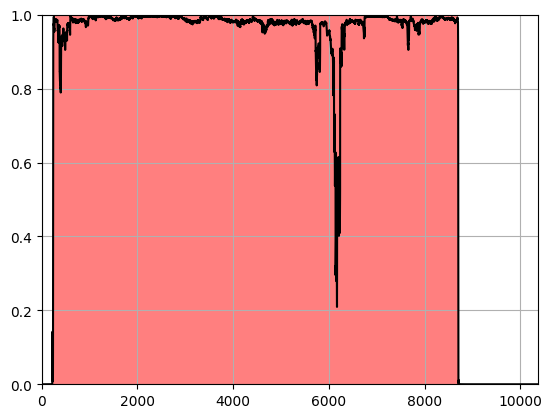

ENST00000338920
recall: 0.9962148070335388
iou: 0.9945678114891052
biotype: protein_coding
ENSP00000343629  :  {'start': 237, 'stop': 8691, 'MS': 4491, 'TE': 0, 'frame': 1}
IP_073904  :  {'start': 355, 'stop': 460, 'MS': 0, 'TE': 3, 'frame': 2}
IP_073912  :  {'start': 475, 'stop': 580, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073906  :  {'start': 715, 'stop': 901, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073907  :  {'start': 1243, 'stop': 1393, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073899  :  {'start': 1405, 'stop': 1552, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073909  :  {'start': 1702, 'stop': 1939, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073902  :  {'start': 2170, 'stop': 2284, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073908  :  {'start': 2878, 'stop': 2983, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073911  :  {'start': 3847, 'stop': 4081, 'MS': 2, 'TE': 0, 'frame': 2}
IP_073914  :  {'start': 4210, 'stop': 4438, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073915  :  {'start': 4609, 'stop': 4795, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073910  :  {'sta

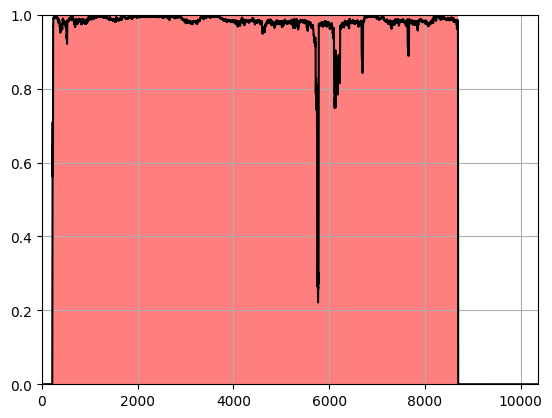

ENST00000426496
recall: 0.983794629573822
iou: 0.9827484488487244
biotype: protein_coding
ENSP00000410219  :  {'start': 57, 'stop': 8511, 'MS': 4491, 'TE': 0, 'frame': 1}
IP_073904  :  {'start': 175, 'stop': 280, 'MS': 0, 'TE': 3, 'frame': 2}
IP_073912  :  {'start': 295, 'stop': 400, 'MS': 1, 'TE': 0, 'frame': 2}
IP_073906  :  {'start': 535, 'stop': 721, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073907  :  {'start': 1063, 'stop': 1213, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073899  :  {'start': 1225, 'stop': 1372, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073909  :  {'start': 1522, 'stop': 1759, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073902  :  {'start': 1990, 'stop': 2104, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073908  :  {'start': 2698, 'stop': 2803, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073911  :  {'start': 3667, 'stop': 3901, 'MS': 2, 'TE': 0, 'frame': 2}
IP_073914  :  {'start': 4030, 'stop': 4258, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073915  :  {'start': 4429, 'stop': 4615, 'MS': 0, 'TE': 0, 'frame': 2}
IP_073910  :  {'start

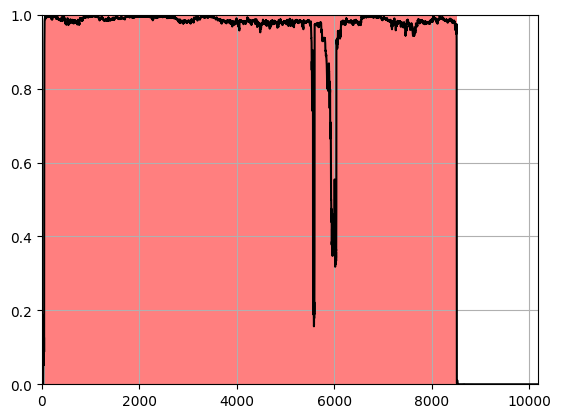

ENST00000427304
recall: 1.0
iou: 0.998019814491272
biotype: protein_coding
ENSP00000415293  :  {'start': 276, 'stop': 1788, 'MS': 53, 'TE': 4, 'frame': 1}
IP_074083  :  {'start': 551, 'stop': 665, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074092  :  {'start': 937, 'stop': 1090, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074088  :  {'start': 1333, 'stop': 1609, 'MS': 1, 'TE': 0, 'frame': 2}
IP_074091  :  {'start': 1900, 'stop': 1999, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074086  :  {'start': 1911, 'stop': 2049, 'MS': 0, 'TE': 0, 'frame': 1}


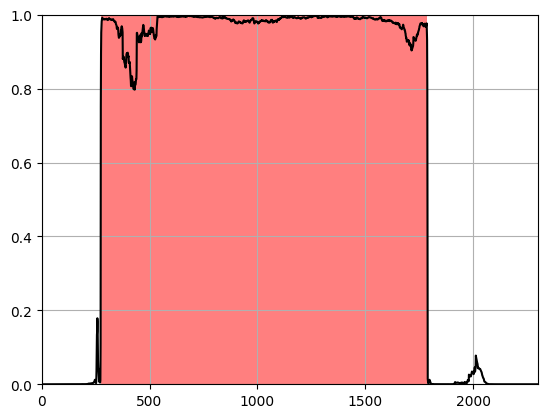

ENST00000367701
recall: 0.9980158805847168
iou: 0.996039628982544
biotype: protein_coding
ENSP00000356674  :  {'start': 191, 'stop': 1703, 'MS': 53, 'TE': 4, 'frame': 3}
IP_074083  :  {'start': 466, 'stop': 580, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074092  :  {'start': 852, 'stop': 1005, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074088  :  {'start': 1248, 'stop': 1524, 'MS': 1, 'TE': 0, 'frame': 1}
IP_074091  :  {'start': 1815, 'stop': 1914, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074086  :  {'start': 1826, 'stop': 1964, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074087  :  {'start': 2090, 'stop': 2225, 'MS': 2, 'TE': 0, 'frame': 3}
IP_074089  :  {'start': 2145, 'stop': 2247, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074084  :  {'start': 2221, 'stop': 2323, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074090  :  {'start': 2376, 'stop': 2517, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074082  :  {'start': 2785, 'stop': 2929, 'MS': 0, 'TE': 0, 'frame': 2}
IP_676252  :  {'start': 3013, 'stop': 3112, 'MS': 0, 'TE': 0, 'frame': 2}
IP_676259  :  {'sta

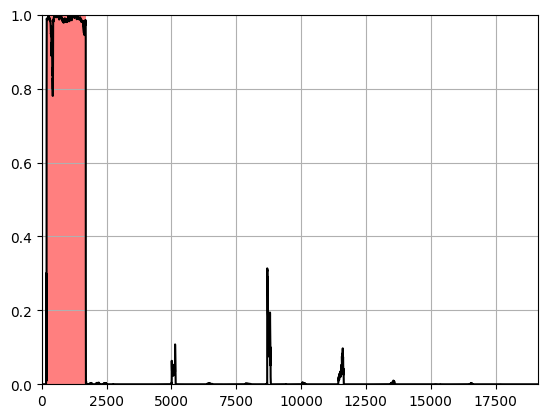

ENST00000367704
recall: 0.9924487471580505
iou: 0.7342378497123718
biotype: protein_coding
ENSP00000356677  :  {'start': 399, 'stop': 1326, 'MS': 22, 'TE': 1, 'frame': 1}
IP_074083  :  {'start': 674, 'stop': 788, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074092  :  {'start': 1060, 'stop': 1213, 'MS': 0, 'TE': 0, 'frame': 2}
II_074097  :  {'start': 1337, 'stop': 1811, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074088  :  {'start': 1356, 'stop': 1632, 'MS': 1, 'TE': 0, 'frame': 1}
IP_074091  :  {'start': 1923, 'stop': 2022, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074086  :  {'start': 1934, 'stop': 2072, 'MS': 0, 'TE': 0, 'frame': 3}


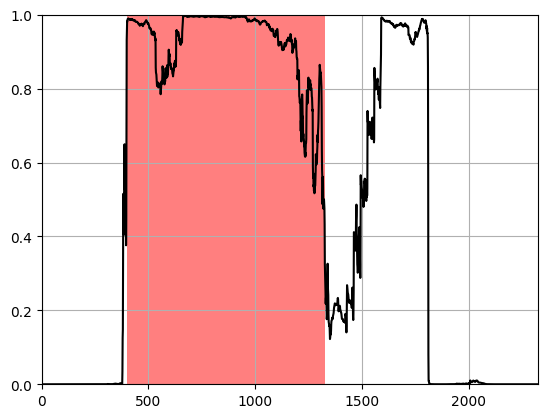

ENST00000405362
recall: 0.9982078671455383
iou: 0.9911032319068909
biotype: protein_coding
IP_074175  :  {'start': 9, 'stop': 357, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074171  :  {'start': 451, 'stop': 592, 'MS': 0, 'TE': 2, 'frame': 2}
ENSP00000385771  :  {'start': 501, 'stop': 1059, 'MS': 1549, 'TE': 0, 'frame': 1}


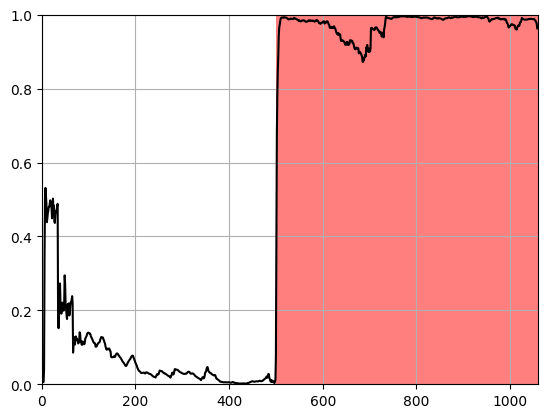

ENST00000512653
recall: 1.0
iou: 0.9997146725654602
biotype: protein_coding
ENSP00000423578  :  {'start': 12, 'stop': 3516, 'MS': 488, 'TE': 10, 'frame': 1}
IP_074384  :  {'start': 235, 'stop': 325, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 541, 'stop': 664, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 806, 'stop': 995, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1091, 'stop': 1190, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1291, 'stop': 1462, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074415  :  {'start': 1948, 'stop': 2236, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2440, 'stop': 2575, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2647, 'stop': 2785, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074389  :  {'start': 3538, 'stop': 3634, 'MS': 0, 'TE': 0, 'frame': 2}


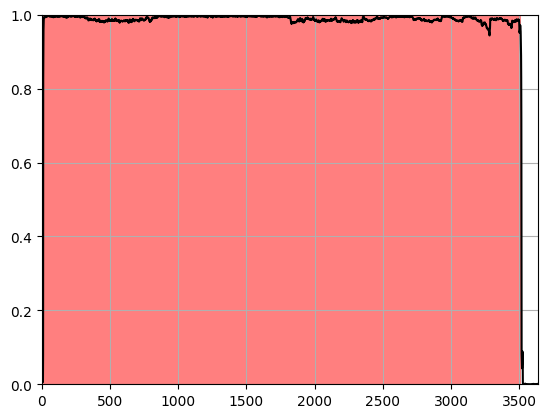

ENST00000344730
recall: 0.9996870160102844
iou: 0.9981250166893005
biotype: protein_coding
ENSP00000339209  :  {'start': 45, 'stop': 3240, 'MS': 463, 'TE': 2, 'frame': 1}
IP_074384  :  {'start': 268, 'stop': 358, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 574, 'stop': 697, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 839, 'stop': 1028, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1124, 'stop': 1223, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1324, 'stop': 1495, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074387  :  {'start': 1981, 'stop': 2089, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2164, 'stop': 2299, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2371, 'stop': 2509, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074389  :  {'start': 3262, 'stop': 3358, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074392  :  {'start': 3823, 'stop': 3913, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074402  :  {'start': 3968, 'stop': 4088, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074406  :  {'star

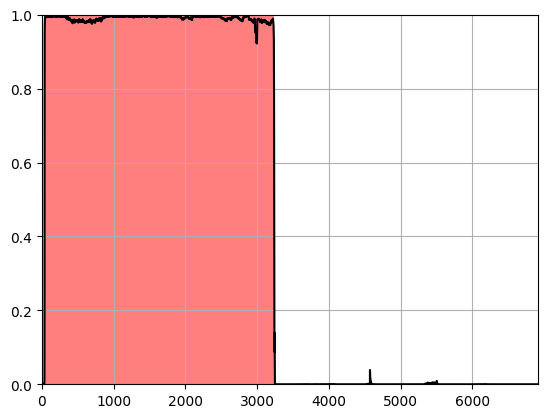

ENST00000507173
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000423413  :  {'start': 0, 'stop': 3177, 'MS': 491, 'TE': 0, 'frame': 1}
IP_074384  :  {'start': 205, 'stop': 295, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 511, 'stop': 634, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 776, 'stop': 965, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1061, 'stop': 1160, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1261, 'stop': 1432, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074387  :  {'start': 1918, 'stop': 2026, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2101, 'stop': 2236, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2308, 'stop': 2446, 'MS': 0, 'TE': 0, 'frame': 2}


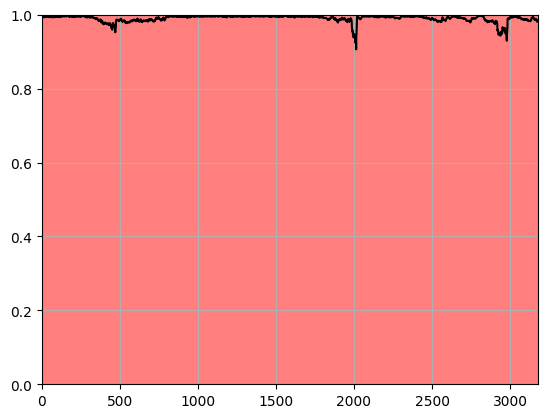

ENST00000511413
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000424697  :  {'start': 0, 'stop': 3240, 'MS': 501, 'TE': 0, 'frame': 1}
IP_074417  :  {'start': 154, 'stop': 268, 'MS': 1, 'TE': 0, 'frame': 2}
IP_074384  :  {'start': 268, 'stop': 358, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 574, 'stop': 697, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 839, 'stop': 1028, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1124, 'stop': 1223, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1324, 'stop': 1495, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074387  :  {'start': 1981, 'stop': 2089, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2164, 'stop': 2299, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2371, 'stop': 2509, 'MS': 0, 'TE': 0, 'frame': 2}


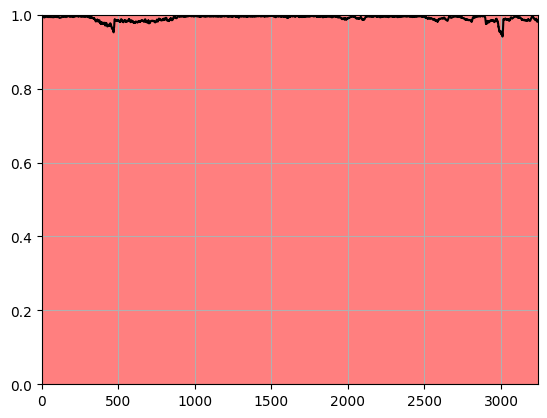

ENST00000367623
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000356595  :  {'start': 0, 'stop': 3486, 'MS': 516, 'TE': 1, 'frame': 1}
IP_074384  :  {'start': 205, 'stop': 295, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 511, 'stop': 634, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 776, 'stop': 965, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1061, 'stop': 1160, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1261, 'stop': 1432, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074415  :  {'start': 1918, 'stop': 2206, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2410, 'stop': 2545, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2617, 'stop': 2755, 'MS': 0, 'TE': 0, 'frame': 2}


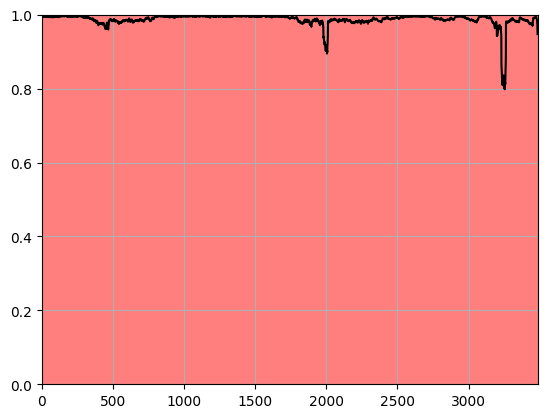

ENST00000504405
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000426831  :  {'start': 0, 'stop': 3132, 'MS': 456, 'TE': 0, 'frame': 1}
IP_074384  :  {'start': 160, 'stop': 250, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 466, 'stop': 589, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 731, 'stop': 920, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1016, 'stop': 1115, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1216, 'stop': 1387, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074387  :  {'start': 1873, 'stop': 1981, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2056, 'stop': 2191, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2263, 'stop': 2401, 'MS': 0, 'TE': 0, 'frame': 2}


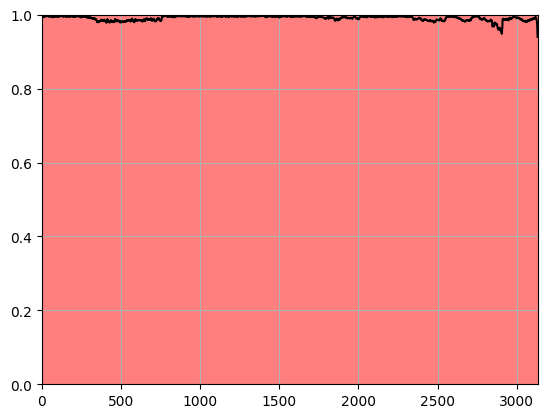

ENST00000392043
recall: 1.0
iou: 0.998161792755127
biotype: protein_coding
ENSP00000375897  :  {'start': 287, 'stop': 1916, 'MS': 146, 'TE': 1, 'frame': 3}
IP_074384  :  {'start': 492, 'stop': 582, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074391  :  {'start': 798, 'stop': 921, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074397  :  {'start': 1063, 'stop': 1252, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074399  :  {'start': 1348, 'stop': 1447, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074395  :  {'start': 1548, 'stop': 1719, 'MS': 0, 'TE': 0, 'frame': 1}
IP_074424  :  {'start': 2035, 'stop': 2140, 'MS': 0, 'TE': 0, 'frame': 2}


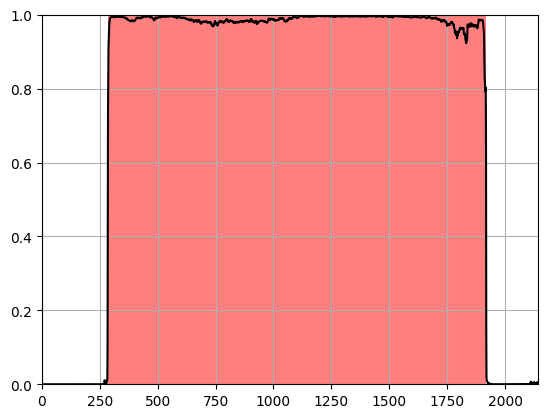

ENST00000502732
recall: 0.9997182488441467
iou: 0.9966292381286621
biotype: protein_coding
ENSP00000427562  :  {'start': 204, 'stop': 3753, 'MS': 526, 'TE': 4, 'frame': 1}
IP_074417  :  {'start': 358, 'stop': 472, 'MS': 1, 'TE': 0, 'frame': 2}
IP_074384  :  {'start': 472, 'stop': 562, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074391  :  {'start': 778, 'stop': 901, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074397  :  {'start': 1043, 'stop': 1232, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074399  :  {'start': 1328, 'stop': 1427, 'MS': 0, 'TE': 0, 'frame': 3}
IP_074395  :  {'start': 1528, 'stop': 1699, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074415  :  {'start': 2185, 'stop': 2473, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074393  :  {'start': 2677, 'stop': 2812, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074385  :  {'start': 2884, 'stop': 3022, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074389  :  {'start': 3775, 'stop': 3871, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074392  :  {'start': 4336, 'stop': 4426, 'MS': 0, 'TE': 0, 'frame': 2}
IP_074402  :  {'star

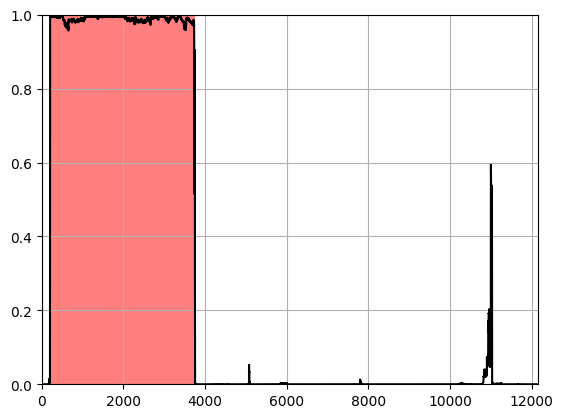

ENST00000367462
recall: 0.9978270530700684
iou: 0.9956634640693665
biotype: protein_coding
IP_075200  :  {'start': 0, 'stop': 156, 'MS': 0, 'TE': 0, 'frame': 1}
IP_075199  :  {'start': 291, 'stop': 384, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000356432  :  {'start': 485, 'stop': 2786, 'MS': 59, 'TE': 0, 'frame': 3}
IP_075196  :  {'start': 535, 'stop': 634, 'MS': 0, 'TE': 0, 'frame': 2}
II_075195  :  {'start': 600, 'stop': 744, 'MS': 0, 'TE': 0, 'frame': 1}
IP_075192  :  {'start': 1311, 'stop': 1404, 'MS': 0, 'TE': 0, 'frame': 1}
IP_075193  :  {'start': 2733, 'stop': 2910, 'MS': 0, 'TE': 0, 'frame': 1}
IP_075198  :  {'start': 2851, 'stop': 2980, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075194  :  {'start': 2916, 'stop': 3114, 'MS': 0, 'TE': 0, 'frame': 1}


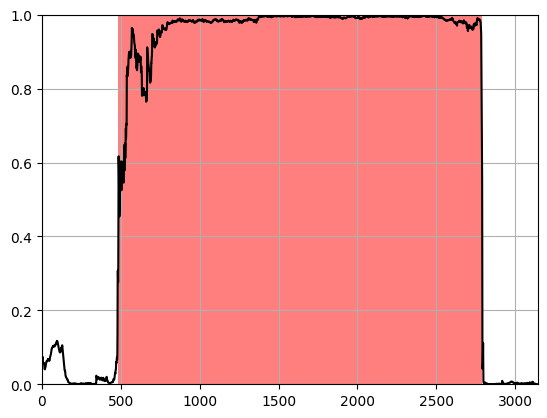

ENST00000367434
recall: 0.985027551651001
iou: 0.9803921580314636
biotype: protein_coding
IP_075276  :  {'start': 444, 'stop': 552, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000356404  :  {'start': 756, 'stop': 2025, 'MS': 12, 'TE': 1, 'frame': 1}
IP_075279  :  {'start': 1111, 'stop': 1216, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075282  :  {'start': 1612, 'stop': 1753, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075281  :  {'start': 1963, 'stop': 2086, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075278  :  {'start': 3043, 'stop': 3214, 'MS': 0, 'TE': 0, 'frame': 2}


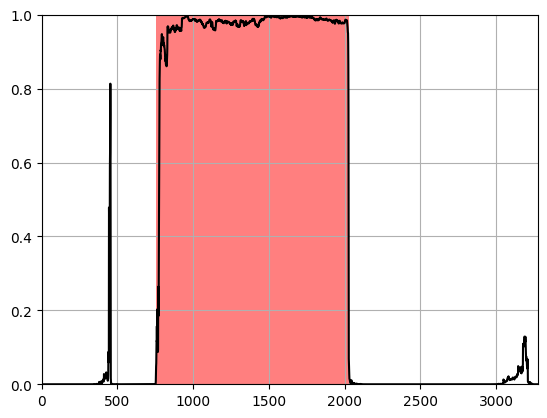

ENST00000367287
recall: 0.998062014579773
iou: 0.7898772954940796
biotype: protein_coding
ENSP00000356256  :  {'start': 36, 'stop': 552, 'MS': 127, 'TE': 35, 'frame': 1}
IP_075893  :  {'start': 79, 'stop': 169, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075895  :  {'start': 463, 'stop': 577, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075894  :  {'start': 853, 'stop': 952, 'MS': 0, 'TE': 1, 'frame': 2}
IP_075896  :  {'start': 1105, 'stop': 1201, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075892  :  {'start': 1270, 'stop': 1588, 'MS': 0, 'TE': 0, 'frame': 2}
IP_075891  :  {'start': 1329, 'stop': 1482, 'MS': 0, 'TE': 0, 'frame': 1}


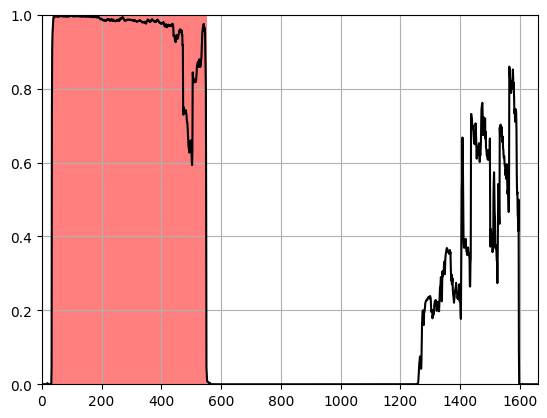

ENST00000272203
recall: 1.0
iou: 0.9536363482475281
biotype: protein_coding
ENSP00000272203  :  {'start': 317, 'stop': 3464, 'MS': 915, 'TE': 0, 'frame': 3}
IP_076299  :  {'start': 486, 'stop': 639, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076295  :  {'start': 705, 'stop': 1020, 'MS': 1, 'TE': 0, 'frame': 1}
IP_076292  :  {'start': 1026, 'stop': 1263, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076297  :  {'start': 1368, 'stop': 1815, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076290  :  {'start': 3045, 'stop': 3135, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076283  :  {'start': 3587, 'stop': 3998, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076303  :  {'start': 3619, 'stop': 3724, 'MS': 1, 'TE': 0, 'frame': 2}
IP_076293  :  {'start': 4086, 'stop': 4344, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076289  :  {'start': 4295, 'stop': 4469, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076305  :  {'start': 4753, 'stop': 4843, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076298  :  {'start': 4977, 'stop': 5082, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076294  :  {'start': 5091, 's

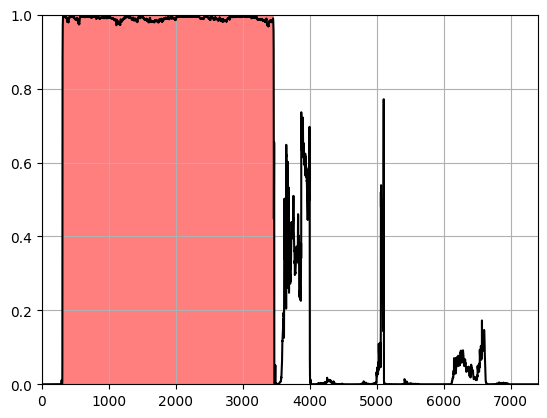

ENST00000367188
recall: 0.9995331168174744
iou: 0.9962773323059082
biotype: protein_coding
IP_076331  :  {'start': 149, 'stop': 305, 'MS': 0, 'TE': 36, 'frame': 3}
ENSP00000356156  :  {'start': 380, 'stop': 2522, 'MS': 104, 'TE': 27, 'frame': 3}
IP_076329  :  {'start': 664, 'stop': 802, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076335  :  {'start': 1338, 'stop': 1476, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076336  :  {'start': 1725, 'stop': 1833, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076342  :  {'start': 2121, 'stop': 2304, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076343  :  {'start': 2343, 'stop': 2442, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076346  :  {'start': 2515, 'stop': 2635, 'MS': 0, 'TE': 1, 'frame': 2}
IP_076337  :  {'start': 2774, 'stop': 2867, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076345  :  {'start': 2901, 'stop': 3003, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076341  :  {'start': 2972, 'stop': 3110, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076338  :  {'start': 3863, 'stop': 4007, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076344  :  {'

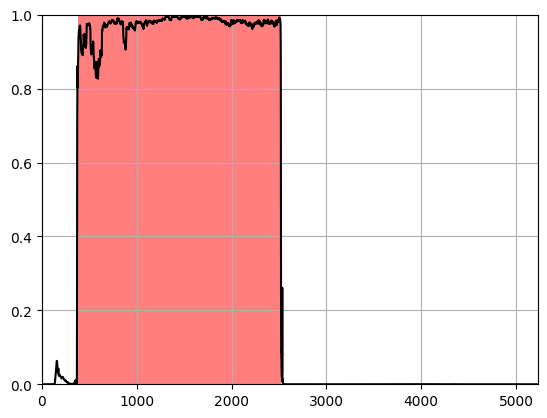

ENST00000367103
recall: 0.9991687536239624
iou: 0.9991687536239624
biotype: protein_coding
ENSP00000356070  :  {'start': 193, 'stop': 1396, 'MS': 489, 'TE': 20, 'frame': 2}
IP_076842  :  {'start': 374, 'stop': 599, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076845  :  {'start': 878, 'stop': 1019, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076856  :  {'start': 1062, 'stop': 1290, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076852  :  {'start': 1508, 'stop': 1607, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076850  :  {'start': 1889, 'stop': 2033, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076843  :  {'start': 1995, 'stop': 2085, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076846  :  {'start': 2325, 'stop': 2427, 'MS': 0, 'TE': 0, 'frame': 1}
IP_076851  :  {'start': 2402, 'stop': 2537, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076847  :  {'start': 2695, 'stop': 2908, 'MS': 0, 'TE': 0, 'frame': 2}
IP_076844  :  {'start': 2727, 'stop': 2925, 'MS': 0, 'TE': 0, 'frame': 1}


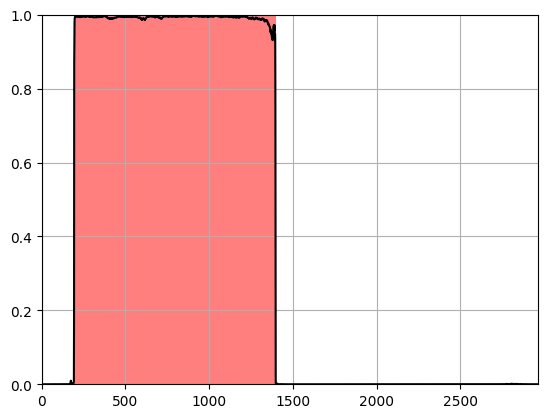

ENST00000294981
recall: 1.0
iou: 0.9041429758071899
biotype: protein_coding
ENSP00000294981  :  {'start': 286, 'stop': 1399, 'MS': 358, 'TE': 1, 'frame': 2}
IP_076842  :  {'start': 467, 'stop': 692, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076845  :  {'start': 971, 'stop': 1112, 'MS': 0, 'TE': 0, 'frame': 3}
IP_076848  :  {'start': 1155, 'stop': 1359, 'MS': 0, 'TE': 0, 'frame': 1}
II_076849  :  {'start': 1888, 'stop': 2026, 'MS': 0, 'TE': 3, 'frame': 2}


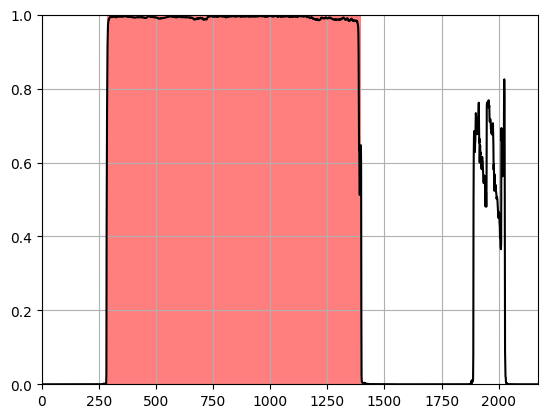

ENST00000366997
recall: 0.9946091771125793
iou: 0.9883928298950195
biotype: protein_coding
ENSP00000355964  :  {'start': 227, 'stop': 1340, 'MS': 342, 'TE': 7, 'frame': 3}
IP_077376  :  {'start': 1068, 'stop': 1239, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077369  :  {'start': 1943, 'stop': 2075, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077368  :  {'start': 3317, 'stop': 3422, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077381  :  {'start': 3706, 'stop': 3856, 'MS': 0, 'TE': 0, 'frame': 2}
IP_077374  :  {'start': 3942, 'stop': 4119, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077372  :  {'start': 4328, 'stop': 4451, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077380  :  {'start': 4939, 'stop': 5068, 'MS': 1, 'TE': 0, 'frame': 2}
IP_077370  :  {'start': 5009, 'stop': 5111, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077377  :  {'start': 5283, 'stop': 5376, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077371  :  {'start': 5615, 'stop': 5750, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077373  :  {'start': 5750, 'stop': 5861, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077382  :  

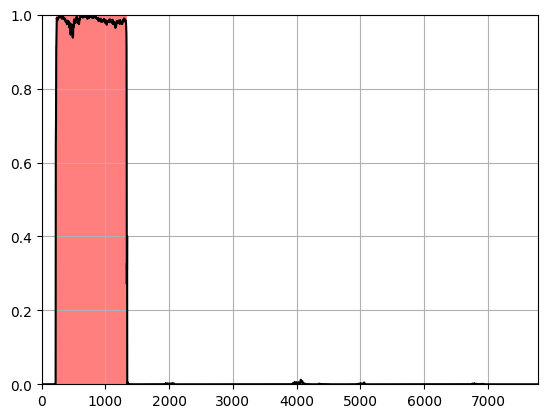

ENST00000366996
recall: 1.0
iou: 0.9991023540496826
biotype: protein_coding
ENSP00000355963  :  {'start': 816, 'stop': 1929, 'MS': 342, 'TE': 7, 'frame': 1}
IP_077376  :  {'start': 1657, 'stop': 1828, 'MS': 0, 'TE': 0, 'frame': 2}


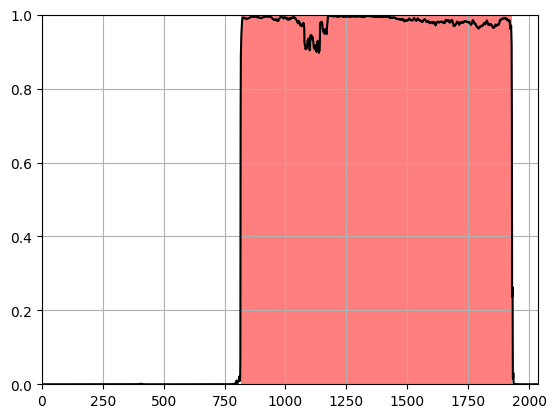

ENST00000366932
recall: 0.9952885508537292
iou: 0.9906213283538818
biotype: protein_coding
ENSP00000355899  :  {'start': 30, 'stop': 879, 'MS': 508, 'TE': 42, 'frame': 1}
IP_077786  :  {'start': 238, 'stop': 406, 'MS': 0, 'TE': 0, 'frame': 2}
IP_077787  :  {'start': 481, 'stop': 616, 'MS': 0, 'TE': 0, 'frame': 2}
IP_077788  :  {'start': 928, 'stop': 1057, 'MS': 0, 'TE': 0, 'frame': 2}
IP_077779  :  {'start': 1128, 'stop': 1224, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077790  :  {'start': 1157, 'stop': 1346, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077778  :  {'start': 1506, 'stop': 1674, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077789  :  {'start': 1511, 'stop': 1649, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077780  :  {'start': 1881, 'stop': 1977, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077777  :  {'start': 2400, 'stop': 2526, 'MS': 0, 'TE': 0, 'frame': 1}
IP_077784  :  {'start': 3472, 'stop': 3646, 'MS': 0, 'TE': 0, 'frame': 2}
IP_077791  :  {'start': 3830, 'stop': 3923, 'MS': 0, 'TE': 0, 'frame': 3}
IP_077782  :  {'star

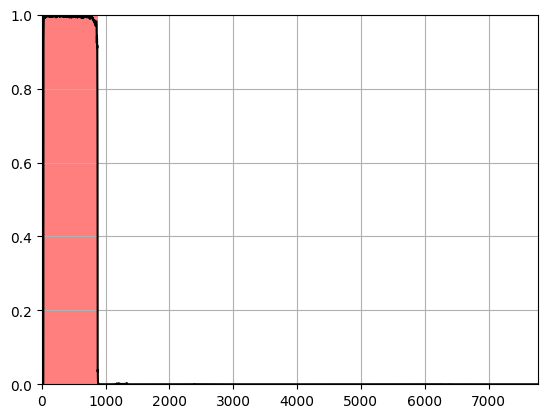

ENST00000439375
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000392061  :  {'start': 0, 'stop': 13548, 'MS': 68, 'TE': 0, 'frame': 1}
IP_078188  :  {'start': 799, 'stop': 895, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078187  :  {'start': 1303, 'stop': 1465, 'MS': 0, 'TE': 0, 'frame': 2}
II_078185  :  {'start': 1654, 'stop': 1846, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078189  :  {'start': 3352, 'stop': 3445, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078192  :  {'start': 4432, 'stop': 4597, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078184  :  {'start': 5674, 'stop': 5794, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078194  :  {'start': 6947, 'stop': 7040, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078191  :  {'start': 7567, 'stop': 7723, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078186  :  {'start': 11086, 'stop': 11191, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078190  :  {'start': 11971, 'stop': 12070, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078193  :  {'start': 13351, 'stop': 13462, 'MS': 0, 'TE': 0, 'frame': 2}


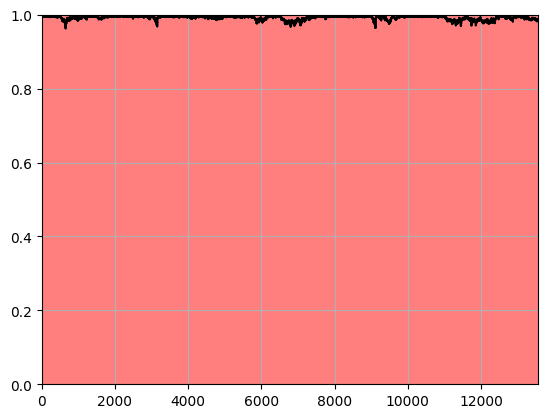

ENST00000430092
recall: 1.0
iou: 0.999483585357666
biotype: protein_coding
ENSP00000414402  :  {'start': 215, 'stop': 13763, 'MS': 68, 'TE': 0, 'frame': 3}
IP_078188  :  {'start': 1014, 'stop': 1110, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078187  :  {'start': 1518, 'stop': 1680, 'MS': 0, 'TE': 0, 'frame': 1}
II_078185  :  {'start': 1869, 'stop': 2061, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078189  :  {'start': 3567, 'stop': 3660, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078192  :  {'start': 4647, 'stop': 4812, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078184  :  {'start': 5889, 'stop': 6009, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078194  :  {'start': 7162, 'stop': 7255, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078191  :  {'start': 7782, 'stop': 7938, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078186  :  {'start': 11301, 'stop': 11406, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078190  :  {'start': 12186, 'stop': 12285, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078193  :  {'start': 13566, 'stop': 13677, 'MS': 0, 'TE': 0, 'frame': 1}


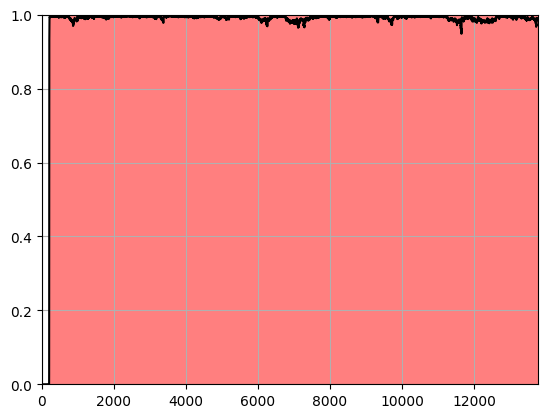

ENST00000445597
recall: 0.9928734302520752
iou: 0.9928734302520752
biotype: protein_coding
ENSP00000409472  :  {'start': 0, 'stop': 10524, 'MS': 45, 'TE': 0, 'frame': 1}
IP_078187  :  {'start': 1360, 'stop': 1522, 'MS': 0, 'TE': 0, 'frame': 2}
II_674545  :  {'start': 1711, 'stop': 1888, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078192  :  {'start': 3280, 'stop': 3445, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078184  :  {'start': 4459, 'stop': 4579, 'MS': 0, 'TE': 0, 'frame': 2}
IP_674544  :  {'start': 5947, 'stop': 6043, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078186  :  {'start': 8677, 'stop': 8782, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078193  :  {'start': 10327, 'stop': 10438, 'MS': 0, 'TE': 0, 'frame': 2}


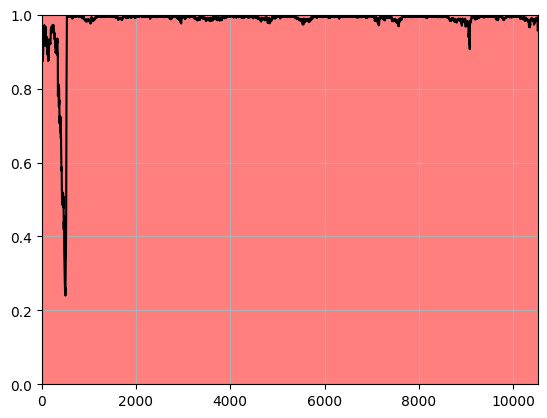

ENST00000366764
recall: 1.0
iou: 0.9980430603027344
biotype: protein_coding
IP_078411  :  {'start': 383, 'stop': 509, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078422  :  {'start': 448, 'stop': 583, 'MS': 0, 'TE': 1, 'frame': 2}
ENSP00000355726  :  {'start': 943, 'stop': 6043, 'MS': 1324, 'TE': 0, 'frame': 2}
IP_078408  :  {'start': 1334, 'stop': 1502, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078412  :  {'start': 1703, 'stop': 1829, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078414  :  {'start': 2273, 'stop': 2387, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078406  :  {'start': 4292, 'stop': 4385, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078405  :  {'start': 4556, 'stop': 4691, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078413  :  {'start': 4865, 'stop': 4988, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078407  :  {'start': 5000, 'stop': 5183, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078415  :  {'start': 6426, 'stop': 6543, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078417  :  {'start': 6945, 'stop': 7089, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078418  :  {'start': 7488, 's

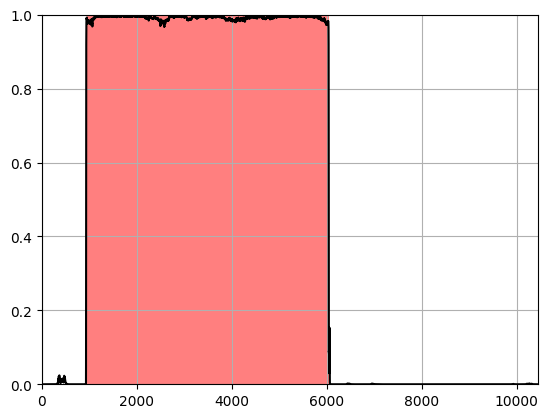

ENST00000334218
recall: 1.0
iou: 0.9996154308319092
biotype: protein_coding
IP_078422  :  {'start': 37, 'stop': 172, 'MS': 0, 'TE': 1, 'frame': 2}
ENSP00000335341  :  {'start': 532, 'stop': 5731, 'MS': 1327, 'TE': 1, 'frame': 2}
IP_078408  :  {'start': 923, 'stop': 1091, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078412  :  {'start': 1292, 'stop': 1418, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078414  :  {'start': 1862, 'stop': 1976, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078406  :  {'start': 3980, 'stop': 4073, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078405  :  {'start': 4244, 'stop': 4379, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078413  :  {'start': 4553, 'stop': 4676, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078407  :  {'start': 4688, 'stop': 4871, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078415  :  {'start': 6114, 'stop': 6231, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078417  :  {'start': 6633, 'stop': 6777, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078418  :  {'start': 7176, 'stop': 7272, 'MS': 1, 'TE': 0, 'frame': 1}
IP_078410  :  {'start': 8360, 's

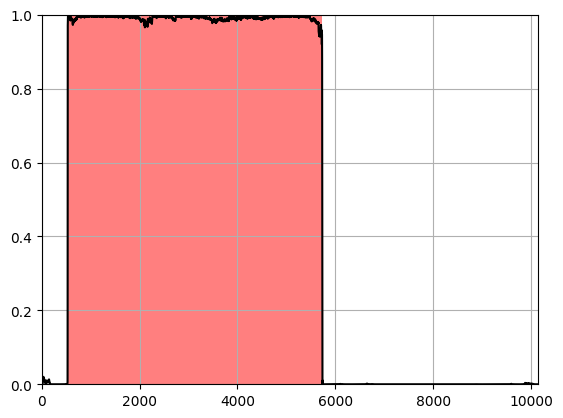

ENST00000366767
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000355729  :  {'start': 0, 'stop': 4917, 'MS': 1234, 'TE': 0, 'frame': 1}
IP_078408  :  {'start': 391, 'stop': 559, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078412  :  {'start': 760, 'stop': 886, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078414  :  {'start': 1330, 'stop': 1444, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078406  :  {'start': 3166, 'stop': 3259, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078405  :  {'start': 3430, 'stop': 3565, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078413  :  {'start': 3739, 'stop': 3862, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078407  :  {'start': 3874, 'stop': 4057, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078415  :  {'start': 5300, 'stop': 5417, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078417  :  {'start': 5819, 'stop': 5963, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078418  :  {'start': 6362, 'stop': 6458, 'MS': 1, 'TE': 0, 'frame': 3}
IP_078410  :  {'start': 7546, 'stop': 7642, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078420  :  {'start': 8052, 'stop': 8244, 'MS':

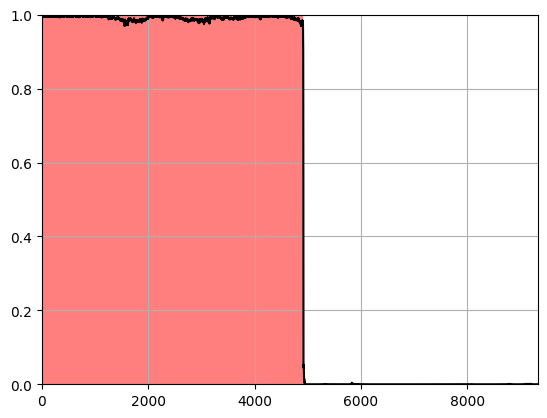

ENST00000366769
recall: 1.0
iou: 0.9986452460289001
biotype: protein_coding
IP_078416  :  {'start': 208, 'stop': 301, 'MS': 2, 'TE': 9, 'frame': 2}
IP_078411  :  {'start': 732, 'stop': 858, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078422  :  {'start': 797, 'stop': 932, 'MS': 0, 'TE': 1, 'frame': 3}
ENSP00000355731  :  {'start': 1292, 'stop': 6452, 'MS': 1325, 'TE': 4, 'frame': 3}
IP_078408  :  {'start': 1683, 'stop': 1851, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078412  :  {'start': 2052, 'stop': 2178, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078414  :  {'start': 2622, 'stop': 2736, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078406  :  {'start': 4701, 'stop': 4794, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078405  :  {'start': 4965, 'stop': 5100, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078413  :  {'start': 5274, 'stop': 5397, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078407  :  {'start': 5409, 'stop': 5592, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078415  :  {'start': 6835, 'stop': 6952, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078417  :  {'start': 7354, 'st

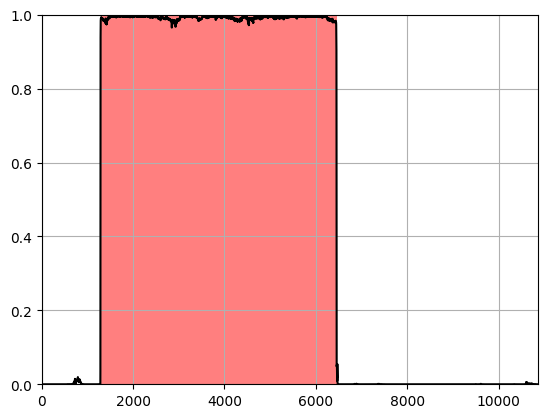

ENST00000366690
recall: 0.9984779357910156
iou: 0.996960461139679
biotype: protein_coding
ENSP00000355651  :  {'start': 208, 'stop': 865, 'MS': 430, 'TE': 29, 'frame': 2}
IP_078746  :  {'start': 962, 'stop': 1121, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078747  :  {'start': 1051, 'stop': 1237, 'MS': 0, 'TE': 0, 'frame': 2}
IP_078745  :  {'start': 1880, 'stop': 1985, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078748  :  {'start': 2578, 'stop': 2689, 'MS': 0, 'TE': 0, 'frame': 2}


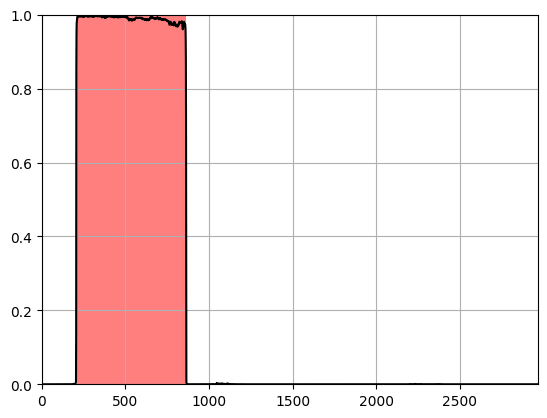

ENST00000618010
recall: 0.9824561476707458
iou: 0.9655172228813171
biotype: protein_coding
ENSP00000482077  :  {'start': 359, 'stop': 701, 'MS': 219, 'TE': 1, 'frame': 3}
IP_078746  :  {'start': 798, 'stop': 957, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078747  :  {'start': 887, 'stop': 1073, 'MS': 0, 'TE': 0, 'frame': 3}
IP_078745  :  {'start': 1716, 'stop': 1821, 'MS': 0, 'TE': 0, 'frame': 1}
IP_078748  :  {'start': 2414, 'stop': 2525, 'MS': 0, 'TE': 0, 'frame': 3}


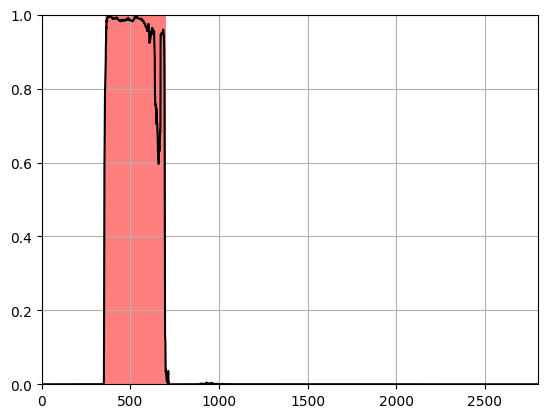

ENST00000308942
recall: 1.0
iou: 0.9182711243629456
biotype: protein_coding
ENSP00000309102  :  {'start': 183, 'stop': 2520, 'MS': 226, 'TE': 0, 'frame': 1}
IP_674025  :  {'start': 218, 'stop': 308, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079061  :  {'start': 478, 'stop': 1147, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079063  :  {'start': 1300, 'stop': 1585, 'MS': 1, 'TE': 0, 'frame': 2}
IP_079064  :  {'start': 1678, 'stop': 1768, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079059  :  {'start': 1825, 'stop': 2032, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079069  :  {'start': 2246, 'stop': 2801, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079070  :  {'start': 2553, 'stop': 2667, 'MS': 0, 'TE': 0, 'frame': 1}


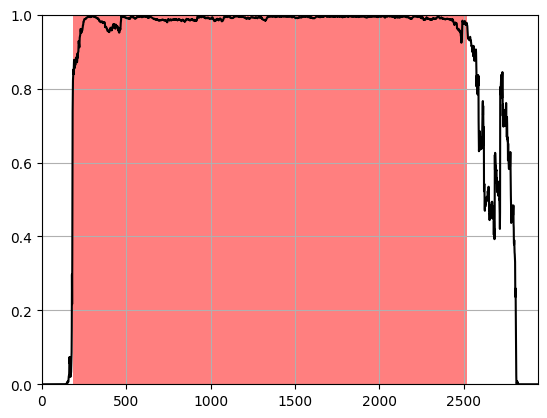

ENST00000366630
recall: 1.0
iou: 0.9741801619529724
biotype: protein_coding
ENSP00000355589  :  {'start': 359, 'stop': 5528, 'MS': 409, 'TE': 4, 'frame': 3}
IP_079065  :  {'start': 678, 'stop': 828, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079062  :  {'start': 891, 'stop': 1011, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079058  :  {'start': 1017, 'stop': 1143, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079060  :  {'start': 1539, 'stop': 1776, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079066  :  {'start': 2469, 'stop': 2562, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079061  :  {'start': 3432, 'stop': 4101, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079063  :  {'start': 4254, 'stop': 4539, 'MS': 1, 'TE': 0, 'frame': 1}
IP_079064  :  {'start': 4632, 'stop': 4722, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079059  :  {'start': 4779, 'stop': 4986, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079069  :  {'start': 5254, 'stop': 5809, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079070  :  {'start': 5561, 'stop': 5675, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079067  :  {'start': 5937, 's

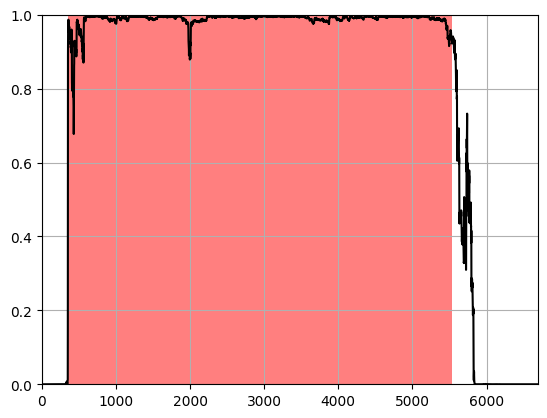

ENST00000262861
recall: 1.0
iou: 0.9510579705238342
biotype: protein_coding
ENSP00000262861  :  {'start': 227, 'stop': 5396, 'MS': 409, 'TE': 4, 'frame': 3}
IP_079065  :  {'start': 546, 'stop': 696, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079062  :  {'start': 759, 'stop': 879, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079058  :  {'start': 885, 'stop': 1011, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079060  :  {'start': 1407, 'stop': 1644, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079066  :  {'start': 2337, 'stop': 2430, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079061  :  {'start': 3300, 'stop': 3969, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079063  :  {'start': 4122, 'stop': 4407, 'MS': 1, 'TE': 0, 'frame': 1}
IP_079064  :  {'start': 4500, 'stop': 4590, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079059  :  {'start': 4647, 'stop': 4854, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079069  :  {'start': 5122, 'stop': 5677, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079070  :  {'start': 5429, 'stop': 5543, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079067  :  {'start': 5805, 'sto

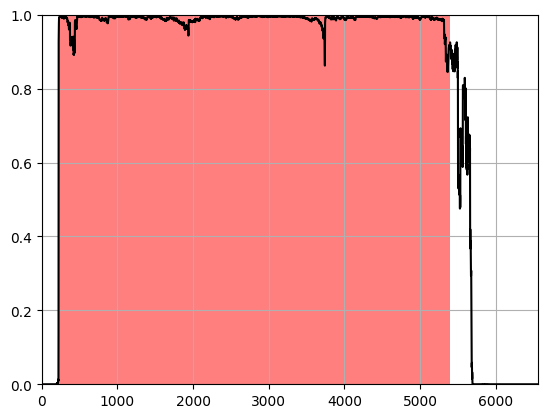

ENST00000642610
recall: 1.0
iou: 0.991239070892334
biotype: protein_coding
IP_079195  :  {'start': 10, 'stop': 184, 'MS': 1, 'TE': 0, 'frame': 2}
ENSP00000494796  :  {'start': 176, 'stop': 1760, 'MS': 1220, 'TE': 15, 'frame': 3}
IP_079191  :  {'start': 198, 'stop': 288, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079190  :  {'start': 1347, 'stop': 1446, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417988  :  {'start': 2175, 'stop': 2307, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417989  :  {'start': 2406, 'stop': 2499, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417995  :  {'start': 3632, 'stop': 3770, 'MS': 0, 'TE': 0, 'frame': 3}
IP_3417992  :  {'start': 4015, 'stop': 4147, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417993  :  {'start': 4462, 'stop': 4615, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417990  :  {'start': 4611, 'stop': 4815, 'MS': 0, 'TE': 0, 'frame': 1}
IP_3417994  :  {'start': 4918, 'stop': 5137, 'MS': 0, 'TE': 0, 'frame': 2}
IP_3417991  :  {'start': 5109, 'stop': 5220, 'MS': 0, 'TE': 0, 'frame': 1}


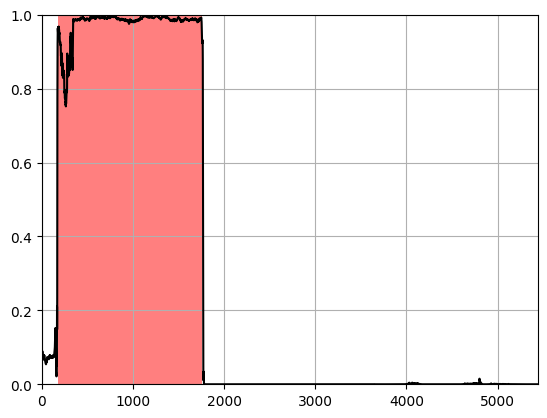

ENST00000635692
recall: 0.997474730014801
iou: 0.9899749159812927
biotype: protein_coding


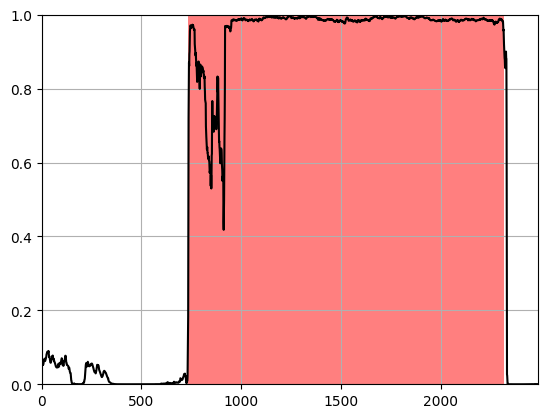

ENST00000642284
recall: 1.0
iou: 0.9881471991539001
biotype: protein_coding


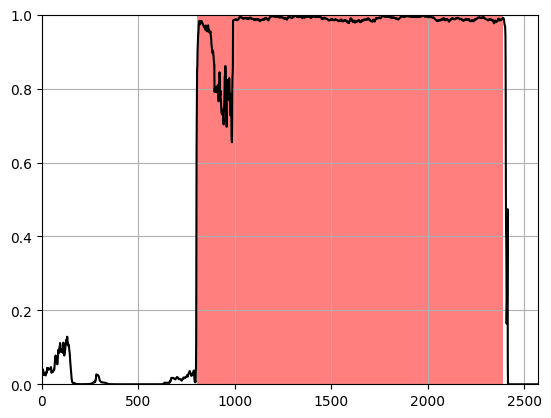

ENST00000646802
recall: 1.0
iou: 0.991239070892334
biotype: protein_coding


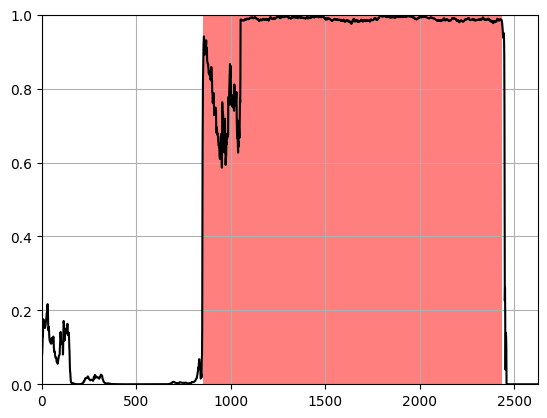

ENST00000634751
recall: 1.0
iou: 0.991239070892334
biotype: protein_coding


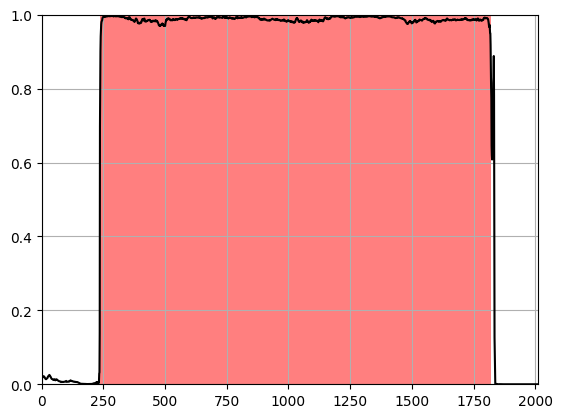

ENST00000634780
recall: 0.998106062412262
iou: 0.994339644908905
biotype: protein_coding


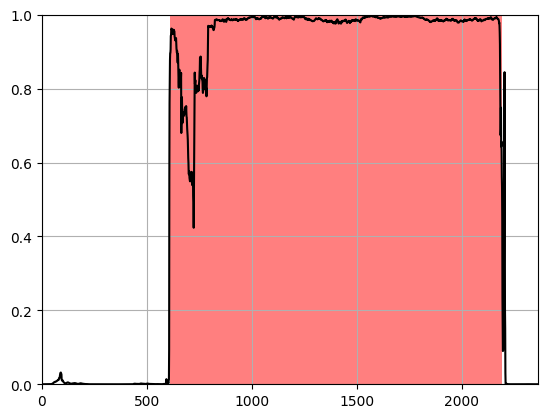

ENST00000406207
recall: 1.0
iou: 0.9924812316894531
biotype: protein_coding
ENSP00000384571  :  {'start': 171, 'stop': 1755, 'MS': 1220, 'TE': 15, 'frame': 1}
IP_079191  :  {'start': 193, 'stop': 283, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079190  :  {'start': 1342, 'stop': 1441, 'MS': 0, 'TE': 0, 'frame': 2}


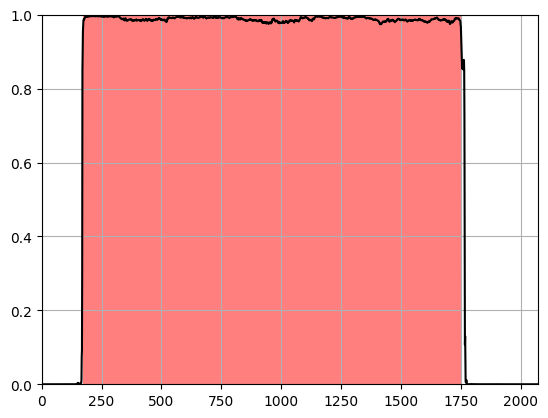

ENST00000646934
recall: 0.9943181872367859
iou: 0.992438554763794
biotype: protein_coding


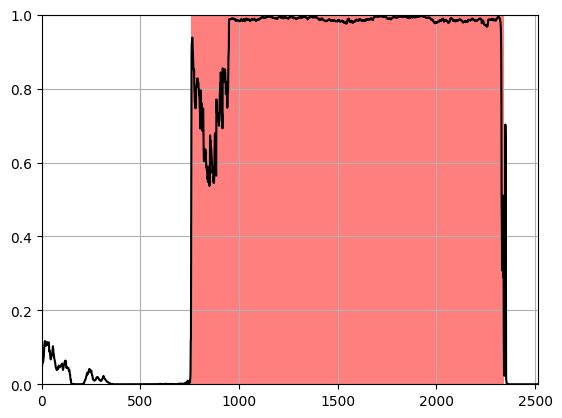

ENST00000366557
recall: 0.9933775067329407
iou: 0.9775524735450745
biotype: protein_coding
ENSP00000355515  :  {'start': 40, 'stop': 1399, 'MS': 335, 'TE': 0, 'frame': 2}
IP_079524  :  {'start': 1421, 'stop': 1586, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079531  :  {'start': 1909, 'stop': 2065, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079529  :  {'start': 2403, 'stop': 2562, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079526  :  {'start': 2411, 'stop': 2555, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079532  :  {'start': 2704, 'stop': 2812, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079533  :  {'start': 3061, 'stop': 3160, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079525  :  {'start': 3239, 'stop': 3371, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079528  :  {'start': 3420, 'stop': 3759, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079527  :  {'start': 3758, 'stop': 3956, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079530  :  {'start': 4462, 'stop': 4588, 'MS': 0, 'TE': 0, 'frame': 2}


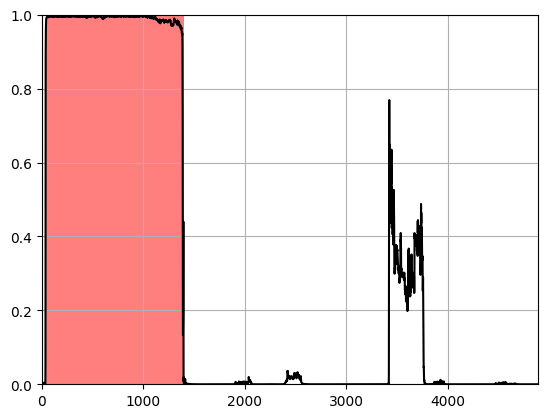

ENST00000366535
recall: 1.0
iou: 0.9992711544036865
biotype: protein_coding
IP_079676  :  {'start': 231, 'stop': 408, 'MS': 0, 'TE': 7, 'frame': 1}
ENSP00000355493  :  {'start': 317, 'stop': 1688, 'MS': 1433, 'TE': 46, 'frame': 3}
IP_079677  :  {'start': 747, 'stop': 912, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079680  :  {'start': 1327, 'stop': 1465, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079678  :  {'start': 1557, 'stop': 1674, 'MS': 0, 'TE': 0, 'frame': 1}
IP_079679  :  {'start': 1756, 'stop': 1852, 'MS': 0, 'TE': 0, 'frame': 2}
IP_079681  :  {'start': 1832, 'stop': 1964, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079682  :  {'start': 1967, 'stop': 2063, 'MS': 0, 'TE': 0, 'frame': 3}
IP_079684  :  {'start': 2366, 'stop': 2501, 'MS': 0, 'TE': 0, 'frame': 3}


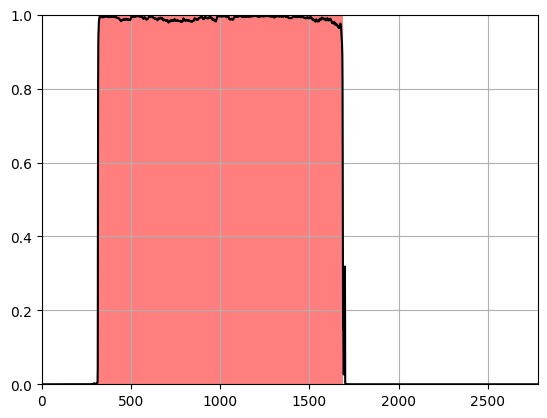

ENST00000366514
recall: 1.0
iou: 0.9991610646247864
biotype: protein_coding
ENSP00000355471  :  {'start': 186, 'stop': 1377, 'MS': 623, 'TE': 20, 'frame': 1}
IP_079792  :  {'start': 1538, 'stop': 1643, 'MS': 0, 'TE': 0, 'frame': 3}


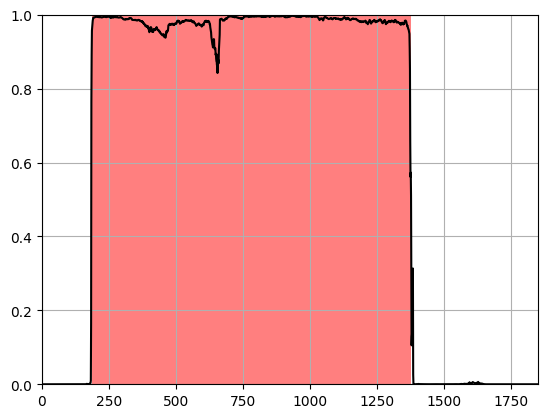

ENST00000623922
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000485287  :  {'start': 0, 'stop': 939, 'MS': 0, 'TE': 0, 'frame': 1}
IP_080021  :  {'start': 460, 'stop': 553, 'MS': 0, 'TE': 0, 'frame': 2}
IP_080022  :  {'start': 641, 'stop': 869, 'MS': 0, 'TE': 0, 'frame': 3}
IP_080020  :  {'start': 751, 'stop': 874, 'MS': 0, 'TE': 0, 'frame': 2}


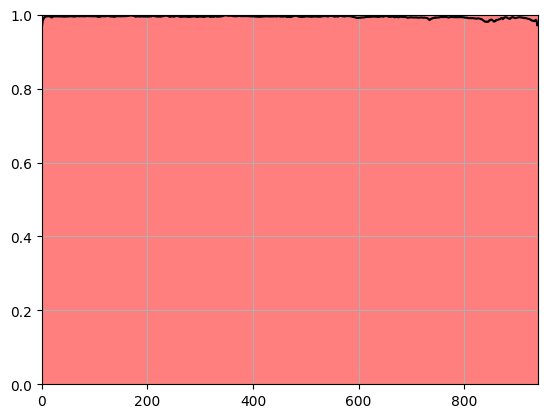

ENST00000642319
recall: 0.9988221526145935
iou: 0.9894982576370239
biotype: protein_coding
ENSP00000495710  :  {'start': 688, 'stop': 1537, 'MS': 331, 'TE': 25, 'frame': 2}
IP_074584  :  {'start': 893, 'stop': 1040, 'MS': 1, 'TE': 0, 'frame': 3}
IP_675990  :  {'start': 1752, 'stop': 1893, 'MS': 0, 'TE': 0, 'frame': 1}
IP_675986  :  {'start': 2435, 'stop': 2615, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081821  :  {'start': 2494, 'stop': 2656, 'MS': 0, 'TE': 0, 'frame': 2}
IP_081819  :  {'start': 2634, 'stop': 2784, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081825  :  {'start': 2642, 'stop': 2774, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081822  :  {'start': 3028, 'stop': 3148, 'MS': 0, 'TE': 0, 'frame': 2}
IP_081827  :  {'start': 3152, 'stop': 3260, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081820  :  {'start': 3240, 'stop': 3474, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081824  :  {'start': 3773, 'stop': 3884, 'MS': 0, 'TE': 0, 'frame': 3}
IP_081817  :  {'start': 3792, 'stop': 3927, 'MS': 0, 'TE': 0, 'frame': 1}
IP_081818  :  

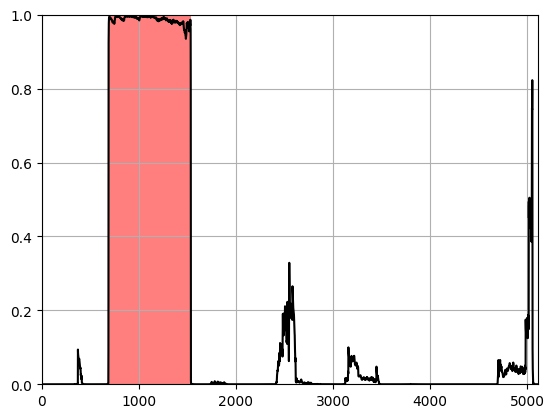

ENST00000281419
recall: 0.9986759424209595
iou: 0.9986759424209595
biotype: protein_coding
ENSP00000281419  :  {'start': 340, 'stop': 3361, 'MS': 686, 'TE': 10, 'frame': 2}
IP_082738  :  {'start': 383, 'stop': 503, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082739  :  {'start': 1013, 'stop': 1139, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082735  :  {'start': 1250, 'stop': 1346, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082736  :  {'start': 1451, 'stop': 1541, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082729  :  {'start': 1674, 'stop': 1794, 'MS': 1, 'TE': 0, 'frame': 1}
IP_082741  :  {'start': 1775, 'stop': 1898, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082740  :  {'start': 1898, 'stop': 2153, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082737  :  {'start': 2405, 'stop': 2642, 'MS': 0, 'TE': 1, 'frame': 3}
IP_082734  :  {'start': 3299, 'stop': 3494, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082730  :  {'start': 3390, 'stop': 3525, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082732  :  {'start': 4527, 'stop': 4845, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082731  :  {

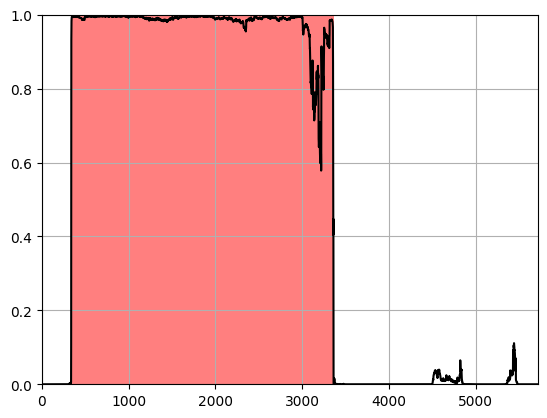

ENST00000315273
recall: 1.0
iou: 0.9938016533851624
biotype: protein_coding
ENSP00000316404  :  {'start': 340, 'stop': 3226, 'MS': 653, 'TE': 2, 'frame': 2}
IP_082738  :  {'start': 383, 'stop': 503, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082739  :  {'start': 1013, 'stop': 1139, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082735  :  {'start': 1250, 'stop': 1346, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082736  :  {'start': 1451, 'stop': 1541, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082729  :  {'start': 1674, 'stop': 1794, 'MS': 1, 'TE': 0, 'frame': 1}
IP_082741  :  {'start': 1775, 'stop': 1898, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082740  :  {'start': 1898, 'stop': 2153, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082737  :  {'start': 2405, 'stop': 2642, 'MS': 0, 'TE': 1, 'frame': 3}
IP_082734  :  {'start': 3164, 'stop': 3359, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082730  :  {'start': 3255, 'stop': 3390, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082732  :  {'start': 4392, 'stop': 4710, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082731  :  {'start': 4755, '

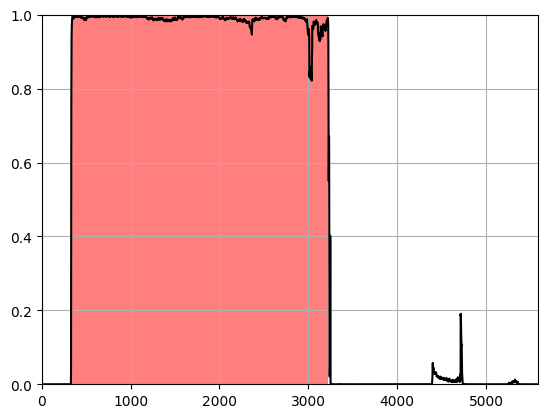

ENST00000310823
recall: 1.0
iou: 0.9963768124580383
biotype: protein_coding
ENSP00000309968  :  {'start': 225, 'stop': 2700, 'MS': 837, 'TE': 26, 'frame': 1}
IP_082767  :  {'start': 289, 'stop': 391, 'MS': 1, 'TE': 0, 'frame': 2}
IP_082769  :  {'start': 1393, 'stop': 1486, 'MS': 0, 'TE': 0, 'frame': 2}
IP_082768  :  {'start': 1840, 'stop': 2098, 'MS': 1, 'TE': 0, 'frame': 2}
IP_082770  :  {'start': 2548, 'stop': 2785, 'MS': 0, 'TE': 0, 'frame': 2}
IP_082772  :  {'start': 3086, 'stop': 3200, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082766  :  {'start': 3111, 'stop': 3219, 'MS': 0, 'TE': 0, 'frame': 1}
IP_649691  :  {'start': 3512, 'stop': 3680, 'MS': 0, 'TE': 0, 'frame': 3}


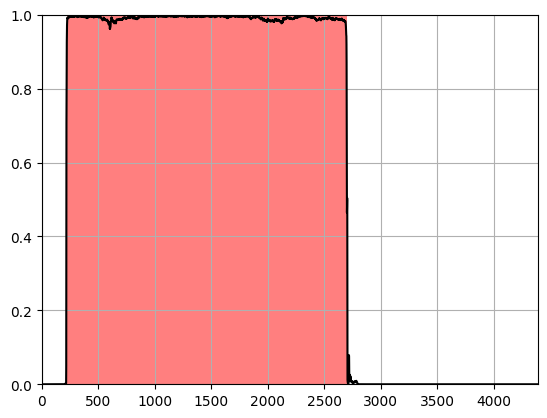

ENST00000497134
recall: 1.0
iou: 0.9983864426612854
biotype: protein_coding
ENSP00000418728  :  {'start': 247, 'stop': 2722, 'MS': 837, 'TE': 26, 'frame': 2}
IP_082767  :  {'start': 311, 'stop': 413, 'MS': 1, 'TE': 0, 'frame': 3}
IP_082769  :  {'start': 1415, 'stop': 1508, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082768  :  {'start': 1862, 'stop': 2120, 'MS': 1, 'TE': 0, 'frame': 3}
IP_082770  :  {'start': 2570, 'stop': 2807, 'MS': 0, 'TE': 0, 'frame': 3}
IP_082772  :  {'start': 3108, 'stop': 3222, 'MS': 0, 'TE': 0, 'frame': 1}
IP_082766  :  {'start': 3133, 'stop': 3241, 'MS': 0, 'TE': 0, 'frame': 2}
IP_649691  :  {'start': 3534, 'stop': 3702, 'MS': 0, 'TE': 0, 'frame': 1}


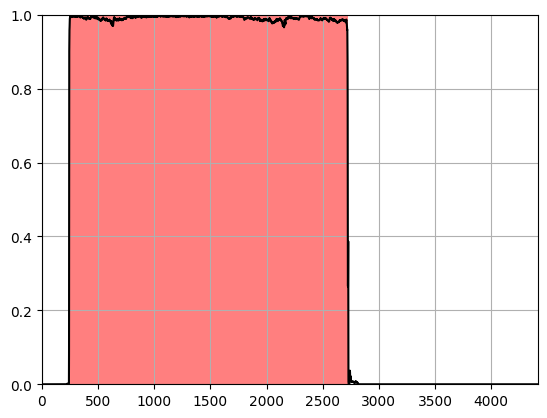

ENST00000496972
recall: 1.0
iou: 0.9987804889678955
biotype: protein_coding
IP_083521  :  {'start': 216, 'stop': 309, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000444463  :  {'start': 305, 'stop': 1943, 'MS': 208, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 904, 'stop': 1045, 'MS': 0, 'TE': 0, 'frame': 2}
IP_083523  :  {'start': 1035, 'stop': 1134, 'MS': 1, 'TE': 0, 'frame': 1}
IP_083522  :  {'start': 1161, 'stop': 1266, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083520  :  {'start': 1425, 'stop': 1590, 'MS': 0, 'TE': 0, 'frame': 1}
II_083524  :  {'start': 2004, 'stop': 2196, 'MS': 0, 'TE': 0, 'frame': 1}


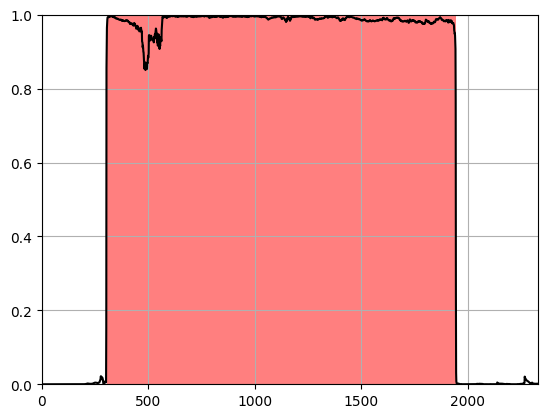

ENST00000407186
recall: 1.0
iou: 0.9960674047470093
biotype: protein_coding
ENSP00000385784  :  {'start': 177, 'stop': 1950, 'MS': 234, 'TE': 0, 'frame': 1}
IP_083521  :  {'start': 259, 'stop': 352, 'MS': 0, 'TE': 0, 'frame': 2}
IP_083525  :  {'start': 947, 'stop': 1088, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083523  :  {'start': 1078, 'stop': 1177, 'MS': 1, 'TE': 0, 'frame': 2}
IP_083528  :  {'start': 1204, 'stop': 1303, 'MS': 0, 'TE': 0, 'frame': 2}
IP_083520  :  {'start': 1378, 'stop': 1543, 'MS': 0, 'TE': 0, 'frame': 2}
II_083527  :  {'start': 1930, 'stop': 2203, 'MS': 0, 'TE': 0, 'frame': 2}


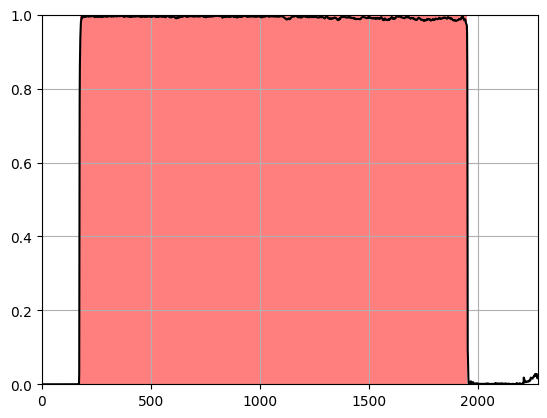

ENST00000407661
recall: 1.0
iou: 1.0
biotype: protein_coding
ENSP00000385193  :  {'start': 250, 'stop': 2080, 'MS': 230, 'TE': 3, 'frame': 2}
IP_083521  :  {'start': 332, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 1020, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083523  :  {'start': 1151, 'stop': 1250, 'MS': 1, 'TE': 0, 'frame': 3}
IP_083522  :  {'start': 1277, 'stop': 1382, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083520  :  {'start': 1541, 'stop': 1706, 'MS': 0, 'TE': 0, 'frame': 3}
II_083524  :  {'start': 2141, 'stop': 2333, 'MS': 0, 'TE': 0, 'frame': 3}


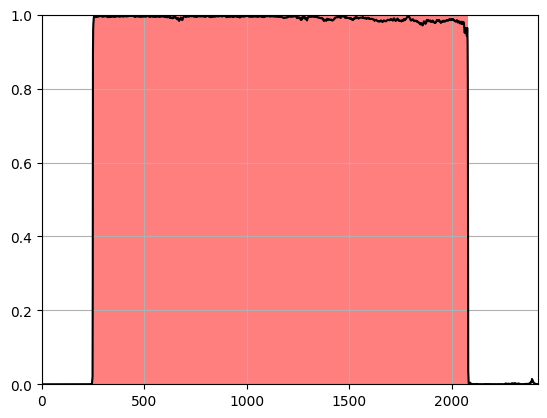

ENST00000406818
recall: 1.0
iou: 0.995245635509491
biotype: protein_coding
ENSP00000384084  :  {'start': 250, 'stop': 2134, 'MS': 252, 'TE': 1, 'frame': 2}
IP_083521  :  {'start': 332, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 1020, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083523  :  {'start': 1151, 'stop': 1250, 'MS': 1, 'TE': 0, 'frame': 3}
IP_083522  :  {'start': 1277, 'stop': 1382, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083520  :  {'start': 1541, 'stop': 1706, 'MS': 0, 'TE': 0, 'frame': 3}
II_083527  :  {'start': 2114, 'stop': 2387, 'MS': 0, 'TE': 0, 'frame': 3}


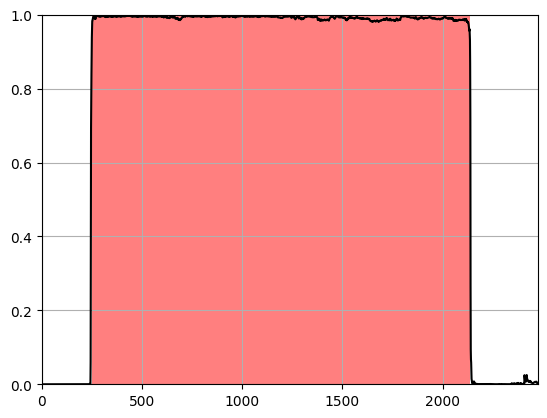

ENST00000405222
recall: 1.0
iou: 0.9964476227760315
biotype: protein_coding
ENSP00000384787  :  {'start': 250, 'stop': 1933, 'MS': 211, 'TE': 0, 'frame': 2}
IP_083521  :  {'start': 332, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 1020, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083523  :  {'start': 1151, 'stop': 1250, 'MS': 1, 'TE': 0, 'frame': 3}
IP_083528  :  {'start': 1277, 'stop': 1376, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083520  :  {'start': 1451, 'stop': 1616, 'MS': 0, 'TE': 0, 'frame': 3}
II_083527  :  {'start': 1913, 'stop': 2186, 'MS': 0, 'TE': 0, 'frame': 3}


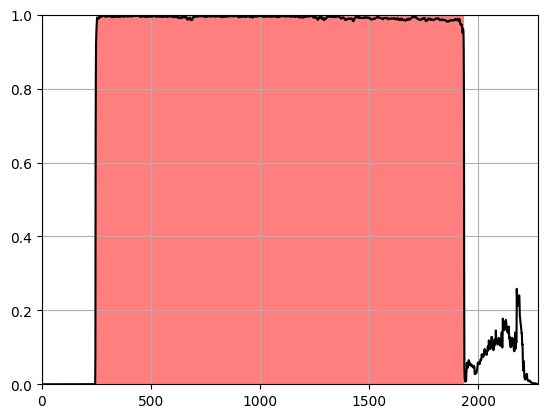

ENST00000407038
recall: 1.0
iou: 0.9988276958465576
biotype: protein_coding
ENSP00000384767  :  {'start': 250, 'stop': 1954, 'MS': 214, 'TE': 0, 'frame': 2}
IP_083521  :  {'start': 332, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 1020, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083523  :  {'start': 1151, 'stop': 1250, 'MS': 1, 'TE': 0, 'frame': 3}
IP_083528  :  {'start': 1277, 'stop': 1376, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083520  :  {'start': 1451, 'stop': 1616, 'MS': 0, 'TE': 0, 'frame': 3}
II_083527  :  {'start': 1934, 'stop': 2207, 'MS': 0, 'TE': 0, 'frame': 3}


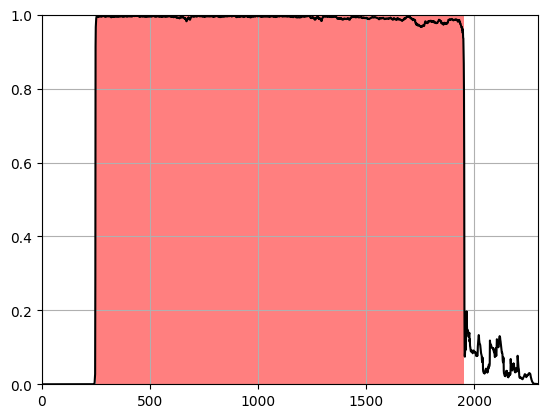

ENST00000404103
recall: 0.9994425773620605
iou: 0.9994425773620605
biotype: protein_coding
ENSP00000385482  :  {'start': 250, 'stop': 2044, 'MS': 229, 'TE': 0, 'frame': 2}
IP_083521  :  {'start': 332, 'stop': 425, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083525  :  {'start': 1020, 'stop': 1161, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083523  :  {'start': 1151, 'stop': 1250, 'MS': 1, 'TE': 0, 'frame': 3}
IP_083522  :  {'start': 1277, 'stop': 1382, 'MS': 0, 'TE': 0, 'frame': 3}
IP_083520  :  {'start': 1541, 'stop': 1706, 'MS': 0, 'TE': 0, 'frame': 3}
II_083527  :  {'start': 2024, 'stop': 2297, 'MS': 0, 'TE': 0, 'frame': 3}


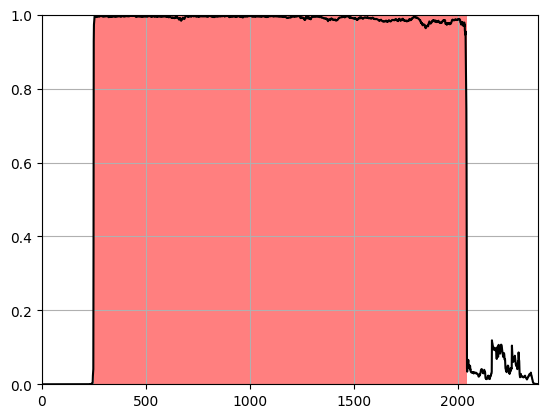

ENST00000288642
recall: 1.0
iou: 0.9967897534370422
biotype: protein_coding
ENSP00000288642  :  {'start': 263, 'stop': 2126, 'MS': 249, 'TE': 6, 'frame': 3}
IP_083521  :  {'start': 345, 'stop': 438, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083525  :  {'start': 1033, 'stop': 1174, 'MS': 0, 'TE': 0, 'frame': 2}
IP_083523  :  {'start': 1164, 'stop': 1263, 'MS': 1, 'TE': 0, 'frame': 1}
IP_083522  :  {'start': 1290, 'stop': 1395, 'MS': 0, 'TE': 0, 'frame': 1}
IP_083520  :  {'start': 1554, 'stop': 1719, 'MS': 0, 'TE': 0, 'frame': 1}
II_083527  :  {'start': 2106, 'stop': 2379, 'MS': 0, 'TE': 0, 'frame': 1}


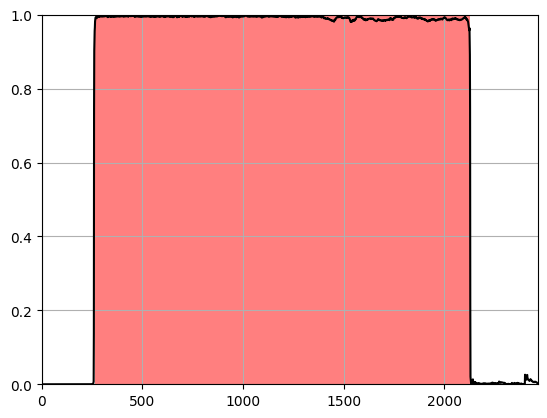

ENST00000329615
recall: 1.0
iou: 0.9983525276184082
biotype: protein_coding
ENSP00000332875  :  {'start': 31, 'stop': 637, 'MS': 21, 'TE': 1, 'frame': 2}
II_083696  :  {'start': 71, 'stop': 278, 'MS': 0, 'TE': 0, 'frame': 3}


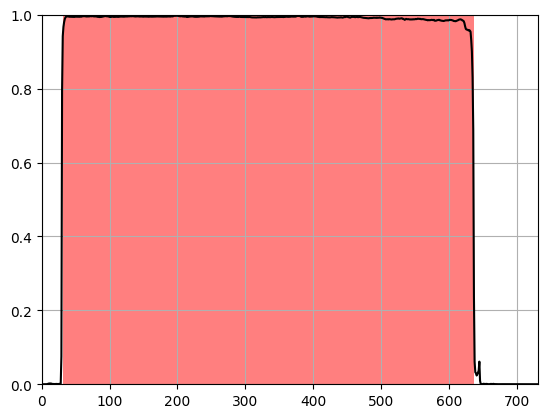

ENST00000264716
recall: 0.9989806413650513
iou: 0.9979633688926697
biotype: protein_coding
ENSP00000264716  :  {'start': 863, 'stop': 1844, 'MS': 415, 'TE': 13, 'frame': 3}
IP_084113  :  {'start': 1209, 'stop': 1308, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084119  :  {'start': 2368, 'stop': 2641, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084127  :  {'start': 2507, 'stop': 2600, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084117  :  {'start': 2881, 'stop': 3250, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084121  :  {'start': 2957, 'stop': 3188, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084126  :  {'start': 3224, 'stop': 3539, 'MS': 0, 'TE': 1, 'frame': 3}
IP_084114  :  {'start': 3280, 'stop': 3394, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084115  :  {'start': 3412, 'stop': 3568, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084111  :  {'start': 3621, 'stop': 3771, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084116  :  {'start': 3811, 'stop': 3922, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084125  :  {'start': 4040, 'stop': 4256, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084112  : 

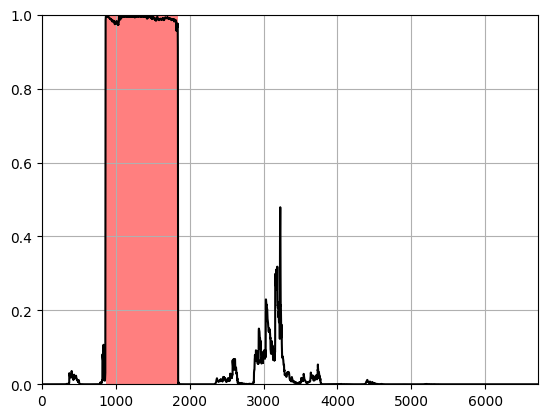

ENST00000379619
recall: 0.9947753548622131
iou: 0.9875518679618835
biotype: protein_coding
ENSP00000368939  :  {'start': 8, 'stop': 965, 'MS': 318, 'TE': 0, 'frame': 3}
IP_084113  :  {'start': 279, 'stop': 378, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084119  :  {'start': 1489, 'stop': 1762, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084127  :  {'start': 1628, 'stop': 1721, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084117  :  {'start': 2002, 'stop': 2371, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084121  :  {'start': 2078, 'stop': 2309, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084126  :  {'start': 2345, 'stop': 2660, 'MS': 0, 'TE': 1, 'frame': 3}
IP_084114  :  {'start': 2401, 'stop': 2515, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084115  :  {'start': 2533, 'stop': 2689, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084111  :  {'start': 2742, 'stop': 2892, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084116  :  {'start': 2932, 'stop': 3043, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084125  :  {'start': 3161, 'stop': 3377, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084112  :  {'sta

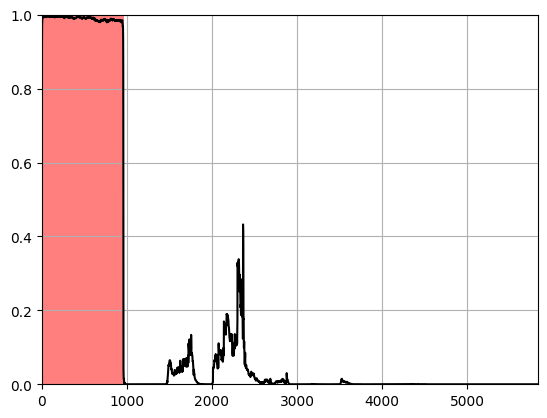

ENST00000331664
recall: 0.984484076499939
iou: 0.9819447994232178
biotype: protein_coding
ENSP00000332809  :  {'start': 0, 'stop': 3867, 'MS': 3, 'TE': 0, 'frame': 1}
IP_084203  :  {'start': 151, 'stop': 277, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084200  :  {'start': 364, 'stop': 544, 'MS': 1, 'TE': 0, 'frame': 2}
IP_084205  :  {'start': 592, 'stop': 766, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084199  :  {'start': 844, 'stop': 934, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084209  :  {'start': 1136, 'stop': 1370, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084198  :  {'start': 1879, 'stop': 2233, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084213  :  {'start': 2627, 'stop': 3317, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084207  :  {'start': 3482, 'stop': 3587, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084204  :  {'start': 3643, 'stop': 3940, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084195  :  {'start': 4104, 'stop': 4212, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084201  :  {'start': 4237, 'stop': 4495, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084197  :  {'start': 454

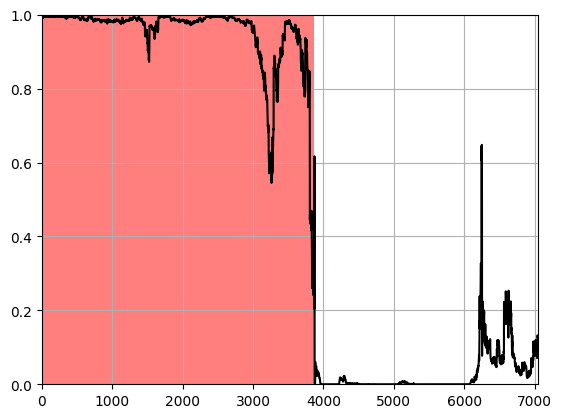

ENST00000622030
recall: 0.9921568632125854
iou: 0.9818887710571289
biotype: protein_coding
ENSP00000477587  :  {'start': 167, 'stop': 932, 'MS': 12, 'TE': 0, 'frame': 3}
IP_084334  :  {'start': 729, 'stop': 1002, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084336  :  {'start': 766, 'stop': 865, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084340  :  {'start': 1217, 'stop': 1310, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084337  :  {'start': 1765, 'stop': 1876, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084339  :  {'start': 1838, 'stop': 1973, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084338  :  {'start': 1973, 'stop': 2126, 'MS': 0, 'TE': 0, 'frame': 3}
IP_084335  :  {'start': 2275, 'stop': 2395, 'MS': 0, 'TE': 0, 'frame': 2}
IP_651910  :  {'start': 2725, 'stop': 2824, 'MS': 0, 'TE': 0, 'frame': 2}
IP_651908  :  {'start': 3006, 'stop': 3108, 'MS': 0, 'TE': 0, 'frame': 1}
IP_651912  :  {'start': 3308, 'stop': 3404, 'MS': 0, 'TE': 0, 'frame': 3}
IP_651911  :  {'start': 3529, 'stop': 3619, 'MS': 0, 'TE': 0, 'frame': 2}
IP_651909  :  {'sta

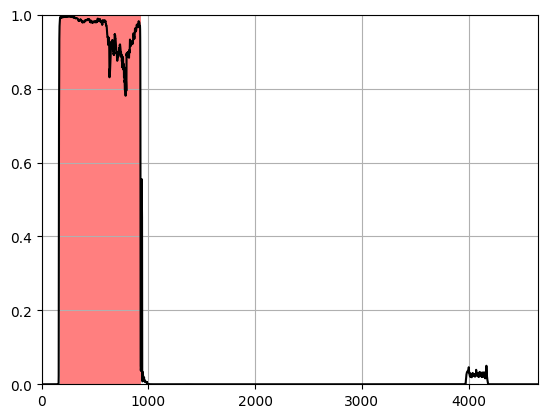

ENST00000379241
recall: 1.0
iou: 0.997974693775177
biotype: protein_coding
ENSP00000368543  :  {'start': 126, 'stop': 2097, 'MS': 122, 'TE': 0, 'frame': 1}
IP_084518  :  {'start': 340, 'stop': 535, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084520  :  {'start': 955, 'stop': 1054, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084519  :  {'start': 1267, 'stop': 1486, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084521  :  {'start': 2038, 'stop': 2167, 'MS': 0, 'TE': 0, 'frame': 2}
IP_084525  :  {'start': 2166, 'stop': 2295, 'MS': 0, 'TE': 0, 'frame': 1}
IP_084522  :  {'start': 2316, 'stop': 2442, 'MS': 0, 'TE': 0, 'frame': 1}


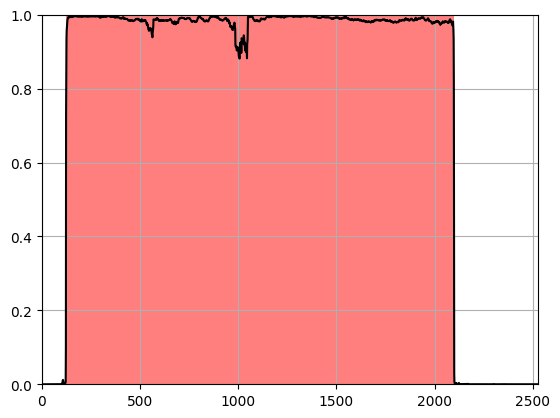

ENST00000444761
recall: 0.984375
iou: 0.847533643245697
biotype: protein_coding
ENSP00000394647  :  {'start': 192, 'stop': 576, 'MS': 241, 'TE': 0, 'frame': 1}
IP_085207  :  {'start': 514, 'stop': 655, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085204  :  {'start': 835, 'stop': 973, 'MS': 0, 'TE': 1, 'frame': 2}
IP_085209  :  {'start': 902, 'stop': 1232, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085212  :  {'start': 1406, 'stop': 1496, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085202  :  {'start': 1534, 'stop': 1888, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085201  :  {'start': 1998, 'stop': 2127, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085206  :  {'start': 2017, 'stop': 2314, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085205  :  {'start': 2389, 'stop': 2542, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085198  :  {'start': 2769, 'stop': 2913, 'MS': 1, 'TE': 0, 'frame': 1}
IP_085203  :  {'start': 2884, 'stop': 3004, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085210  :  {'start': 2933, 'stop': 3071, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085211  :  {'start': 3440, '

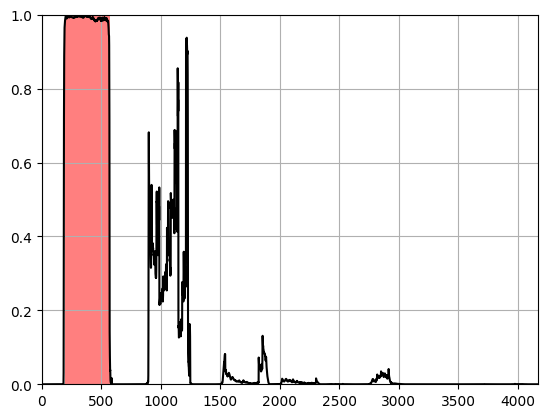

ENST00000409800
recall: 0.9964912533760071
iou: 0.7573333382606506
biotype: protein_coding
ENSP00000387202  :  {'start': 81, 'stop': 366, 'MS': 239, 'TE': 0, 'frame': 1}
IP_085207  :  {'start': 304, 'stop': 445, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085204  :  {'start': 625, 'stop': 763, 'MS': 0, 'TE': 1, 'frame': 2}
IP_085209  :  {'start': 692, 'stop': 1022, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085212  :  {'start': 1196, 'stop': 1286, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085202  :  {'start': 1324, 'stop': 1678, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085201  :  {'start': 1788, 'stop': 1917, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085206  :  {'start': 1807, 'stop': 2104, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085205  :  {'start': 2179, 'stop': 2332, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085198  :  {'start': 2559, 'stop': 2703, 'MS': 1, 'TE': 0, 'frame': 1}
IP_085203  :  {'start': 2674, 'stop': 2794, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085210  :  {'start': 2723, 'stop': 2861, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085211  :  {'start

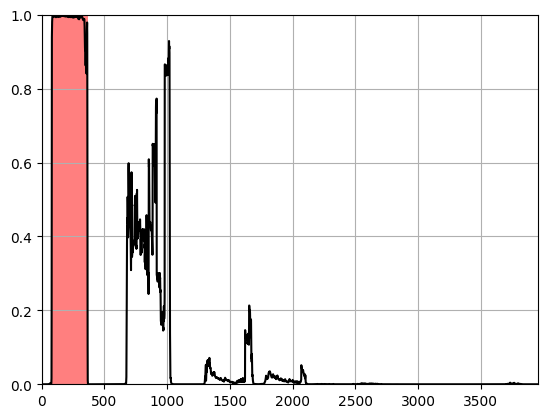

ENST00000409913
recall: 0.9754385948181152
iou: 0.7258485555648804
biotype: protein_coding
ENSP00000386941  :  {'start': 101, 'stop': 386, 'MS': 239, 'TE': 0, 'frame': 3}
IP_085207  :  {'start': 324, 'stop': 465, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085204  :  {'start': 645, 'stop': 783, 'MS': 0, 'TE': 1, 'frame': 1}
IP_085209  :  {'start': 712, 'stop': 1042, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085212  :  {'start': 1216, 'stop': 1306, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085202  :  {'start': 1344, 'stop': 1698, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085201  :  {'start': 1808, 'stop': 1937, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085206  :  {'start': 1827, 'stop': 2124, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085205  :  {'start': 2199, 'stop': 2352, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085198  :  {'start': 2579, 'stop': 2723, 'MS': 1, 'TE': 0, 'frame': 3}
IP_085203  :  {'start': 2694, 'stop': 2814, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085210  :  {'start': 2743, 'stop': 2881, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085211  :  {'star

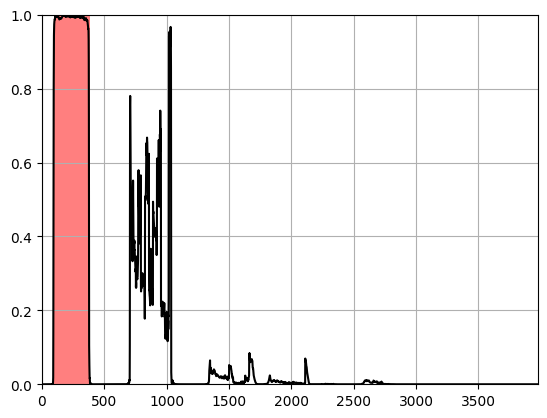

ENST00000409105
recall: 0.997732400894165
iou: 0.9777777791023254
biotype: protein_coding
ENSP00000386651  :  {'start': 180, 'stop': 621, 'MS': 293, 'TE': 11, 'frame': 1}
IP_085207  :  {'start': 559, 'stop': 700, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085204  :  {'start': 880, 'stop': 1018, 'MS': 0, 'TE': 1, 'frame': 2}
IP_085209  :  {'start': 947, 'stop': 1277, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085212  :  {'start': 1451, 'stop': 1541, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085202  :  {'start': 1579, 'stop': 1933, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085201  :  {'start': 2043, 'stop': 2172, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085206  :  {'start': 2062, 'stop': 2359, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085205  :  {'start': 2434, 'stop': 2587, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085198  :  {'start': 2814, 'stop': 2958, 'MS': 1, 'TE': 0, 'frame': 1}
IP_085203  :  {'start': 2929, 'stop': 3049, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085210  :  {'start': 2978, 'stop': 3116, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085211  :  {'sta

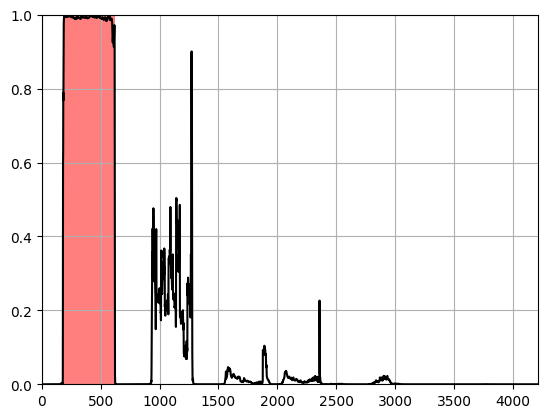

ENST00000649435
recall: 0.9969696998596191
iou: 0.7777777910232544
biotype: protein_coding
ENSP00000498024  :  {'start': 45, 'stop': 375, 'MS': 131, 'TE': 0, 'frame': 1}
II_648925  :  {'start': 374, 'stop': 482, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085207  :  {'start': 420, 'stop': 561, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085204  :  {'start': 741, 'stop': 879, 'MS': 0, 'TE': 1, 'frame': 1}
IP_085209  :  {'start': 808, 'stop': 1138, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085212  :  {'start': 1312, 'stop': 1402, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085202  :  {'start': 1440, 'stop': 1794, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085201  :  {'start': 1904, 'stop': 2033, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085206  :  {'start': 1923, 'stop': 2220, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085205  :  {'start': 2295, 'stop': 2448, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085198  :  {'start': 2675, 'stop': 2819, 'MS': 1, 'TE': 0, 'frame': 3}
IP_085203  :  {'start': 2790, 'stop': 2910, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085210  :  {'start':

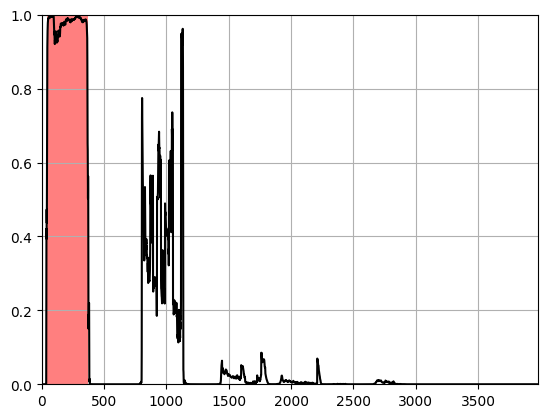

ENST00000319466
recall: 0.9954648613929749
iou: 0.9502164721488953
biotype: protein_coding
IP_085218  :  {'start': 1, 'stop': 232, 'MS': 0, 'TE': 0, 'frame': 2}
ENSP00000317271  :  {'start': 152, 'stop': 593, 'MS': 293, 'TE': 11, 'frame': 3}
IP_085207  :  {'start': 531, 'stop': 672, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085204  :  {'start': 852, 'stop': 990, 'MS': 0, 'TE': 1, 'frame': 1}
IP_085209  :  {'start': 919, 'stop': 1249, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085212  :  {'start': 1423, 'stop': 1513, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085202  :  {'start': 1551, 'stop': 1905, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085201  :  {'start': 2015, 'stop': 2144, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085206  :  {'start': 2034, 'stop': 2331, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085205  :  {'start': 2406, 'stop': 2559, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085198  :  {'start': 2786, 'stop': 2930, 'MS': 1, 'TE': 0, 'frame': 3}
IP_085203  :  {'start': 2901, 'stop': 3021, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085210  :  {'start':

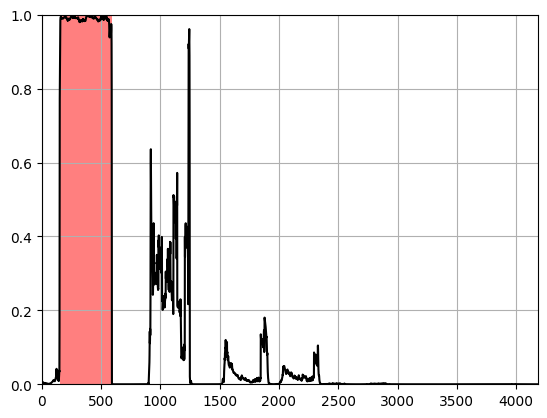

ENST00000409207
recall: 0.997732400894165
iou: 0.997732400894165
biotype: protein_coding
II_085214  :  {'start': 69, 'stop': 168, 'MS': 0, 'TE': 2, 'frame': 1}
ENSP00000386386  :  {'start': 167, 'stop': 608, 'MS': 293, 'TE': 11, 'frame': 3}
IP_085207  :  {'start': 546, 'stop': 687, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085204  :  {'start': 867, 'stop': 1005, 'MS': 0, 'TE': 1, 'frame': 1}


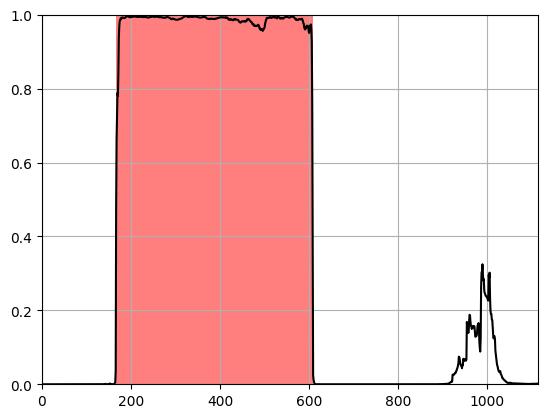

ENST00000409973
recall: 0.9954648613929749
iou: 0.9954648613929749
biotype: protein_coding
ENSP00000386279  :  {'start': 188, 'stop': 629, 'MS': 293, 'TE': 11, 'frame': 3}
IP_085207  :  {'start': 567, 'stop': 708, 'MS': 0, 'TE': 0, 'frame': 1}


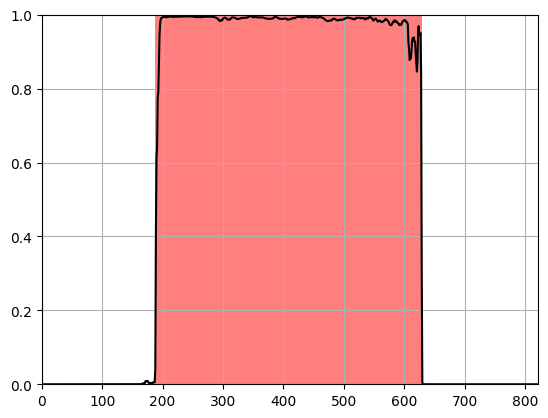

ENST00000405240
recall: 1.0
iou: 0.9989878535270691
biotype: protein_coding
ENSP00000384471  :  {'start': 133, 'stop': 3094, 'MS': 1415, 'TE': 0, 'frame': 2}
IP_085519  :  {'start': 260, 'stop': 371, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085516  :  {'start': 1205, 'stop': 1376, 'MS': 1, 'TE': 0, 'frame': 3}
IP_085518  :  {'start': 2717, 'stop': 2813, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085517  :  {'start': 3512, 'stop': 3737, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085514  :  {'start': 3729, 'stop': 3885, 'MS': 0, 'TE': 0, 'frame': 1}


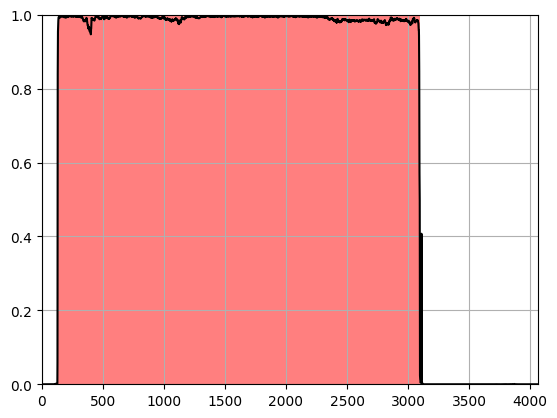

ENST00000337526
recall: 0.9991617798805237
iou: 0.9988827109336853
biotype: protein_coding
ENSP00000337838  :  {'start': 244, 'stop': 3823, 'MS': 2407, 'TE': 0, 'frame': 2}
IP_085521  :  {'start': 491, 'stop': 698, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085519  :  {'start': 989, 'stop': 1100, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085516  :  {'start': 1934, 'stop': 2105, 'MS': 1, 'TE': 0, 'frame': 3}
IP_085518  :  {'start': 3446, 'stop': 3542, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085517  :  {'start': 4241, 'stop': 4466, 'MS': 0, 'TE': 0, 'frame': 3}
IP_085514  :  {'start': 4458, 'stop': 4614, 'MS': 0, 'TE': 0, 'frame': 1}


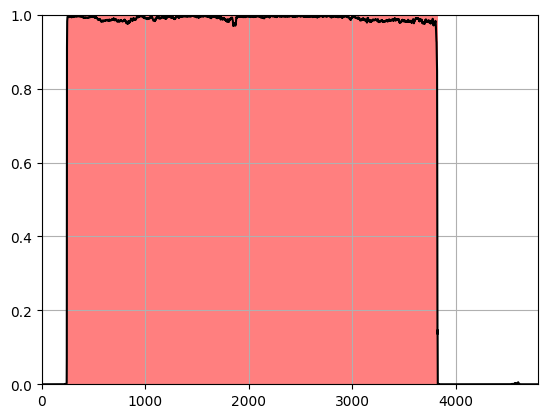

ENST00000404909
recall: 1.0
iou: 0.9966341257095337
biotype: protein_coding
ENSP00000385650  :  {'start': 174, 'stop': 3135, 'MS': 1415, 'TE': 0, 'frame': 1}
IP_085519  :  {'start': 301, 'stop': 412, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085516  :  {'start': 1246, 'stop': 1417, 'MS': 1, 'TE': 0, 'frame': 2}
IP_085518  :  {'start': 2758, 'stop': 2854, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085517  :  {'start': 3553, 'stop': 3778, 'MS': 0, 'TE': 0, 'frame': 2}
IP_085514  :  {'start': 3770, 'stop': 3926, 'MS': 0, 'TE': 0, 'frame': 3}


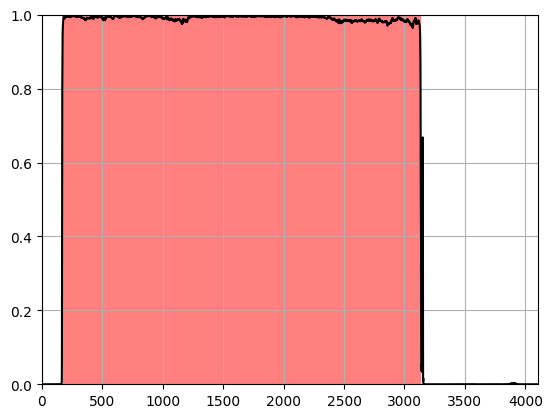

ENST00000357376
recall: 1.0
iou: 0.9926248788833618
biotype: protein_coding
ENSP00000349944  :  {'start': 182, 'stop': 3143, 'MS': 1415, 'TE': 0, 'frame': 3}
IP_085519  :  {'start': 309, 'stop': 420, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085516  :  {'start': 1254, 'stop': 1425, 'MS': 1, 'TE': 0, 'frame': 1}
IP_085518  :  {'start': 2766, 'stop': 2862, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085517  :  {'start': 3561, 'stop': 3786, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085514  :  {'start': 3778, 'stop': 3934, 'MS': 0, 'TE': 0, 'frame': 2}


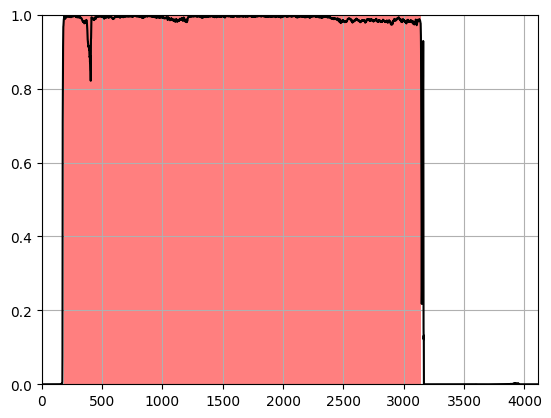

ENST00000394611
recall: 1.0
iou: 0.9966341257095337
biotype: protein_coding
ENSP00000378109  :  {'start': 233, 'stop': 3194, 'MS': 1415, 'TE': 0, 'frame': 3}
IP_085519  :  {'start': 360, 'stop': 471, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085516  :  {'start': 1305, 'stop': 1476, 'MS': 1, 'TE': 0, 'frame': 1}
IP_085518  :  {'start': 2817, 'stop': 2913, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085517  :  {'start': 3612, 'stop': 3837, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085514  :  {'start': 3829, 'stop': 3985, 'MS': 0, 'TE': 0, 'frame': 2}


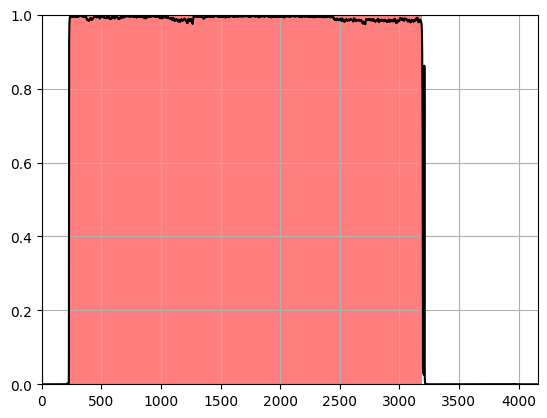

ENST00000394609
recall: 0.9983333349227905
iou: 0.9771615266799927
biotype: protein_coding
ENSP00000378107  :  {'start': 329, 'stop': 929, 'MS': 679, 'TE': 0, 'frame': 3}
IP_085518  :  {'start': 552, 'stop': 648, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085517  :  {'start': 1347, 'stop': 1572, 'MS': 0, 'TE': 0, 'frame': 1}
IP_085514  :  {'start': 1564, 'stop': 1720, 'MS': 0, 'TE': 0, 'frame': 2}


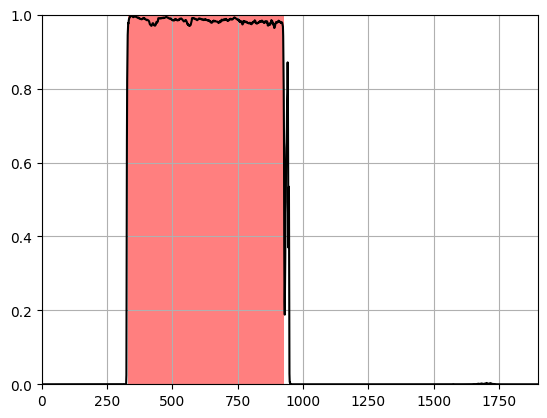

ENST00000234310
recall: 0.9922027587890625
iou: 0.9807322025299072
biotype: protein_coding
ENSP00000234310  :  {'start': 404, 'stop': 917, 'MS': 98, 'TE': 49, 'frame': 3}
IP_086065  :  {'start': 909, 'stop': 1032, 'MS': 0, 'TE': 0, 'frame': 1}
IP_086067  :  {'start': 991, 'stop': 1081, 'MS': 0, 'TE': 0, 'frame': 2}
IP_086069  :  {'start': 1136, 'stop': 1241, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086068  :  {'start': 1153, 'stop': 1255, 'MS': 0, 'TE': 0, 'frame': 2}
IP_086066  :  {'start': 2161, 'stop': 2290, 'MS': 0, 'TE': 0, 'frame': 2}
IP_086071  :  {'start': 2204, 'stop': 2369, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086070  :  {'start': 2843, 'stop': 2996, 'MS': 0, 'TE': 0, 'frame': 3}


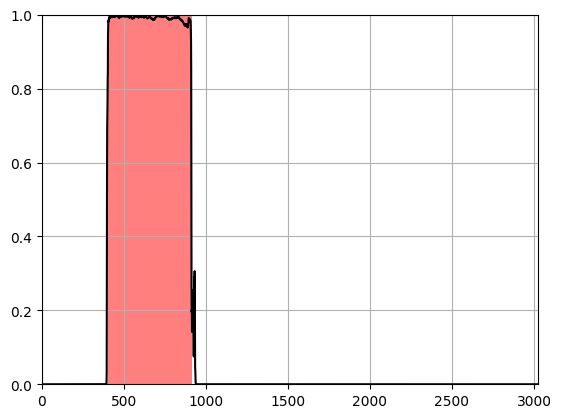

ENST00000377938
recall: 1.0
iou: 0.9933775067329407
biotype: protein_coding
ENSP00000367172  :  {'start': 63, 'stop': 663, 'MS': 139, 'TE': 0, 'frame': 1}
IP_086138  :  {'start': 235, 'stop': 364, 'MS': 0, 'TE': 1, 'frame': 2}
IP_086139  :  {'start': 272, 'stop': 398, 'MS': 0, 'TE': 1, 'frame': 3}


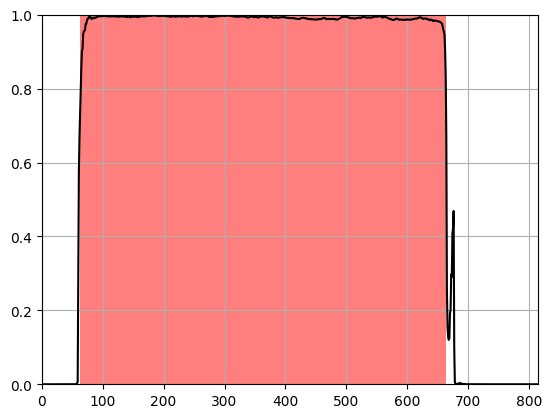

ENST00000377526
recall: 1.0
iou: 0.9983805418014526
biotype: protein_coding
IP_086918  :  {'start': 156, 'stop': 300, 'MS': 0, 'TE': 0, 'frame': 1}
IP_086916  :  {'start': 218, 'stop': 506, 'MS': 1, 'TE': 2, 'frame': 3}
ENSP00000366748  :  {'start': 310, 'stop': 1543, 'MS': 554, 'TE': 38, 'frame': 2}
IP_086917  :  {'start': 707, 'stop': 908, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086914  :  {'start': 1019, 'stop': 1115, 'MS': 0, 'TE': 0, 'frame': 3}
IP_086915  :  {'start': 1190, 'stop': 1289, 'MS': 0, 'TE': 0, 'frame': 3}


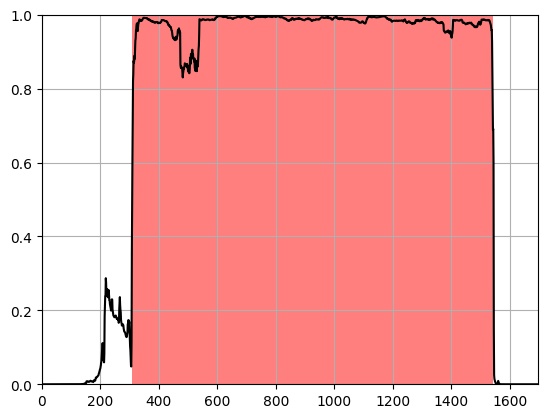

ENST00000409921
recall: 1.0
iou: 0.993062436580658
biotype: protein_coding
ENSP00000387063  :  {'start': 67, 'stop': 1069, 'MS': 1638, 'TE': 0, 'frame': 2}
IP_087279  :  {'start': 281, 'stop': 389, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087278  :  {'start': 860, 'stop': 1175, 'MS': 2, 'TE': 0, 'frame': 3}


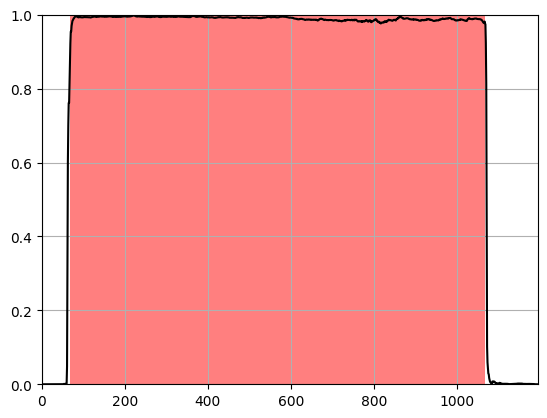

ENST00000263867
recall: 1.0
iou: 0.9961941242218018
biotype: protein_coding
ENSP00000263867  :  {'start': 250, 'stop': 1297, 'MS': 1808, 'TE': 27, 'frame': 2}
IP_087279  :  {'start': 464, 'stop': 572, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087278  :  {'start': 1088, 'stop': 1403, 'MS': 2, 'TE': 0, 'frame': 3}


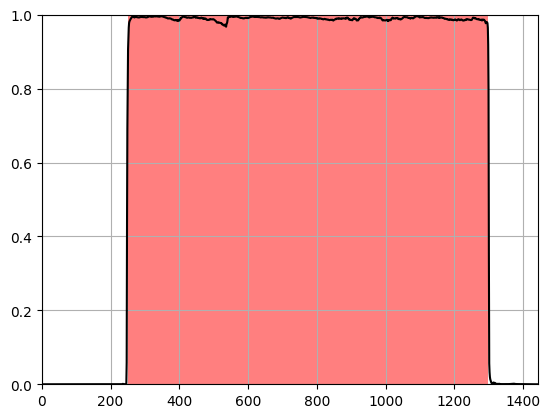

ENST00000409556
recall: 1.0
iou: 0.997986912727356
biotype: protein_coding
ENSP00000386660  :  {'start': 365, 'stop': 4331, 'MS': 936, 'TE': 15, 'frame': 3}
IP_087512  :  {'start': 444, 'stop': 549, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087509  :  {'start': 1167, 'stop': 1416, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087515  :  {'start': 2413, 'stop': 2512, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087516  :  {'start': 2596, 'stop': 2911, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087514  :  {'start': 3057, 'stop': 3156, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087513  :  {'start': 3729, 'stop': 3846, 'MS': 2, 'TE': 0, 'frame': 1}
II_087510  :  {'start': 4041, 'stop': 4254, 'MS': 0, 'TE': 1, 'frame': 1}
IP_087511  :  {'start': 4761, 'stop': 4854, 'MS': 0, 'TE': 0, 'frame': 1}


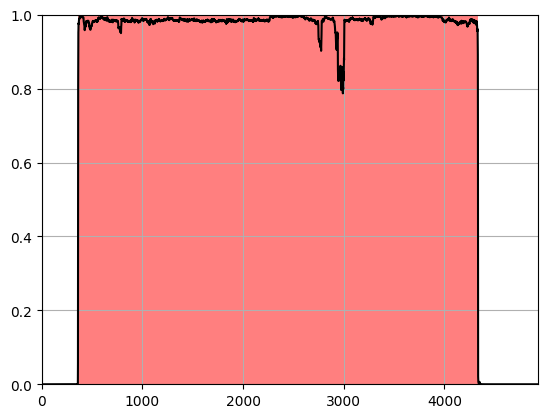

ENST00000312912
recall: 1.0
iou: 0.9994959831237793
biotype: protein_coding
IP_087517  :  {'start': 2, 'stop': 155, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000323659  :  {'start': 327, 'stop': 4293, 'MS': 936, 'TE': 15, 'frame': 1}
IP_087512  :  {'start': 406, 'stop': 511, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087509  :  {'start': 1129, 'stop': 1378, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087515  :  {'start': 2375, 'stop': 2474, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087516  :  {'start': 2558, 'stop': 2873, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087514  :  {'start': 3019, 'stop': 3118, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087513  :  {'start': 3691, 'stop': 3808, 'MS': 2, 'TE': 0, 'frame': 2}
II_087510  :  {'start': 4003, 'stop': 4216, 'MS': 0, 'TE': 1, 'frame': 2}
IP_087511  :  {'start': 4723, 'stop': 4816, 'MS': 0, 'TE': 0, 'frame': 2}


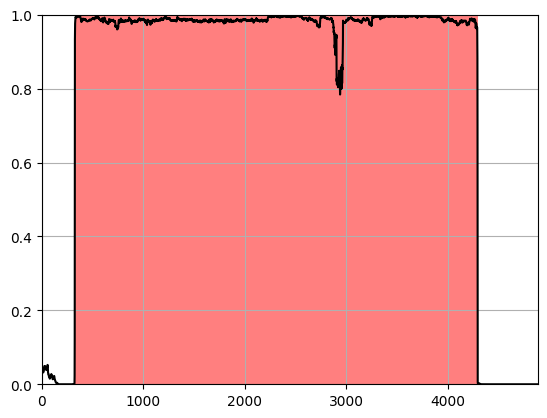

ENST00000409064
recall: 1.0
iou: 0.9959819316864014
biotype: protein_coding
ENSP00000386516  :  {'start': 58, 'stop': 4024, 'MS': 936, 'TE': 15, 'frame': 2}
IP_087512  :  {'start': 137, 'stop': 242, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087509  :  {'start': 860, 'stop': 1109, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087515  :  {'start': 2106, 'stop': 2205, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087516  :  {'start': 2289, 'stop': 2604, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087514  :  {'start': 2750, 'stop': 2849, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087513  :  {'start': 3422, 'stop': 3539, 'MS': 2, 'TE': 0, 'frame': 3}
II_087510  :  {'start': 3734, 'stop': 3947, 'MS': 0, 'TE': 1, 'frame': 3}
IP_087511  :  {'start': 4454, 'stop': 4547, 'MS': 0, 'TE': 0, 'frame': 3}


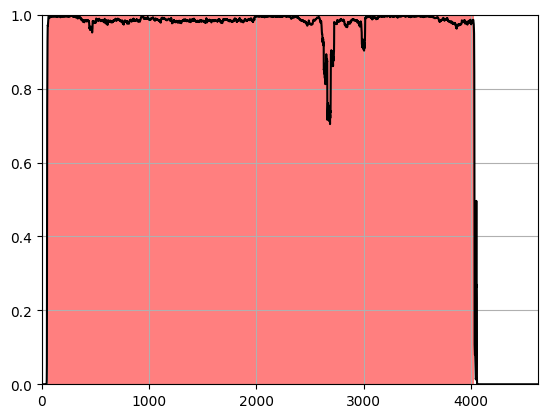

ENST00000542128
recall: 1.0
iou: 0.9994982481002808
biotype: protein_coding
IP_087517  :  {'start': 2, 'stop': 155, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000438324  :  {'start': 327, 'stop': 4311, 'MS': 929, 'TE': 0, 'frame': 1}
IP_087512  :  {'start': 406, 'stop': 511, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087509  :  {'start': 1129, 'stop': 1378, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087515  :  {'start': 2375, 'stop': 2474, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087516  :  {'start': 2558, 'stop': 2873, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087514  :  {'start': 3019, 'stop': 3118, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087513  :  {'start': 3691, 'stop': 3808, 'MS': 2, 'TE': 0, 'frame': 2}
II_087510  :  {'start': 4003, 'stop': 4216, 'MS': 0, 'TE': 1, 'frame': 2}


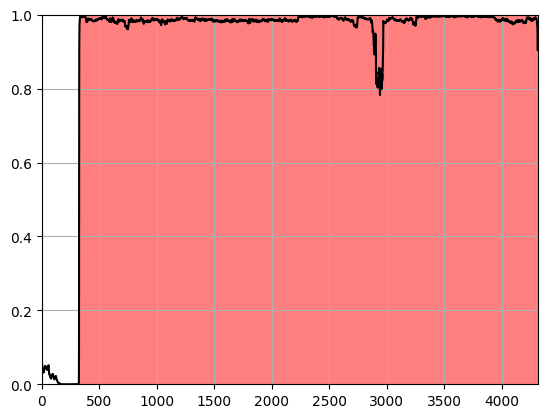

ENST00000283632
recall: 0.9982993006706238
iou: 0.9065636992454529
biotype: protein_coding
ENSP00000283632  :  {'start': 495, 'stop': 1671, 'MS': 403, 'TE': 27, 'frame': 1}
IP_087552  :  {'start': 1243, 'stop': 1384, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087545  :  {'start': 1441, 'stop': 1546, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087547  :  {'start': 1783, 'stop': 1888, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087553  :  {'start': 2102, 'stop': 2312, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087549  :  {'start': 2203, 'stop': 2296, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087561  :  {'start': 2538, 'stop': 2640, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087555  :  {'start': 2780, 'stop': 2870, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087556  :  {'start': 3182, 'stop': 3365, 'MS': 0, 'TE': 0, 'frame': 3}
IP_087550  :  {'start': 3268, 'stop': 3382, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087548  :  {'start': 3730, 'stop': 3841, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087562  :  {'start': 3972, 'stop': 4074, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087557  : 

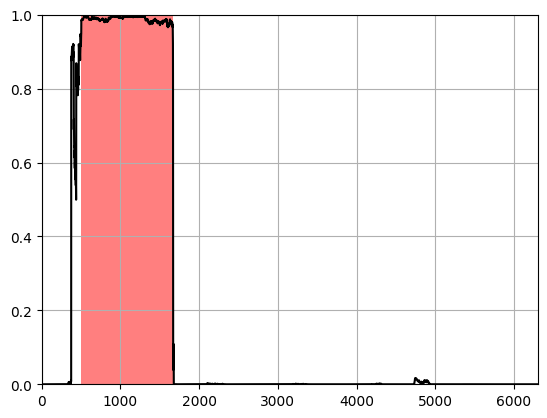

ENST00000283646
recall: 1.0
iou: 0.9989327788352966
biotype: protein_coding
ENSP00000283646  :  {'start': 55, 'stop': 991, 'MS': 591, 'TE': 34, 'frame': 2}
IP_087688  :  {'start': 1074, 'stop': 1164, 'MS': 0, 'TE': 0, 'frame': 1}
IP_087689  :  {'start': 1546, 'stop': 1651, 'MS': 0, 'TE': 0, 'frame': 2}
IP_087687  :  {'start': 1556, 'stop': 1697, 'MS': 1, 'TE': 0, 'frame': 3}


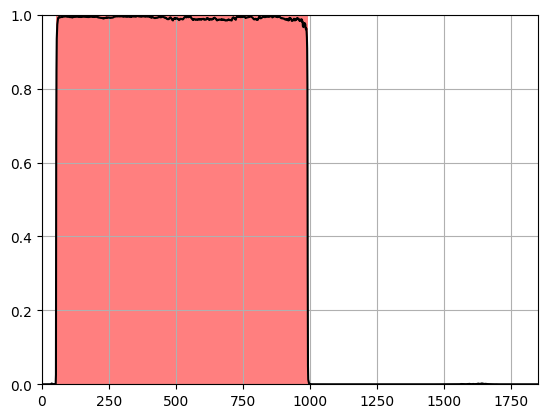

ENST00000264255
recall: 1.0
iou: 0.9970717430114746
biotype: protein_coding
ENSP00000264255  :  {'start': 256, 'stop': 937, 'MS': 623, 'TE': 16, 'frame': 2}
IP_088372  :  {'start': 266, 'stop': 422, 'MS': 0, 'TE': 0, 'frame': 3}
IP_088371  :  {'start': 464, 'stop': 578, 'MS': 0, 'TE': 0, 'frame': 3}
IP_088373  :  {'start': 1009, 'stop': 1171, 'MS': 0, 'TE': 0, 'frame': 2}


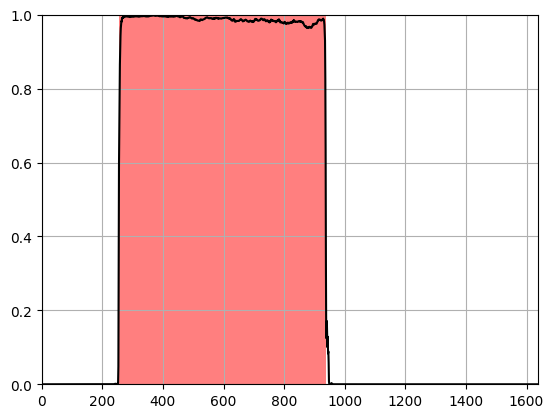

ENST00000259213
recall: 1.0
iou: 0.9939758777618408
biotype: protein_coding
ENSP00000259213  :  {'start': 108, 'stop': 603, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089310  :  {'start': 657, 'stop': 828, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089309  :  {'start': 828, 'stop': 921, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089311  :  {'start': 892, 'stop': 988, 'MS': 0, 'TE': 0, 'frame': 2}


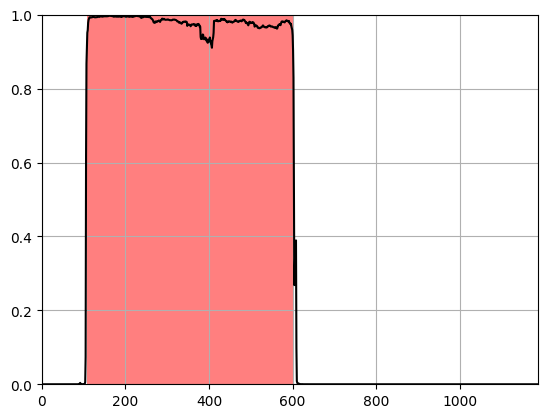

ENST00000410059
recall: 0.9995817542076111
iou: 0.9970796704292297
biotype: protein_coding
IP_089444  :  {'start': 89, 'stop': 194, 'MS': 0, 'TE': 0, 'frame': 3}
ENSP00000386565  :  {'start': 480, 'stop': 2871, 'MS': 156, 'TE': 1, 'frame': 1}
II_089454  :  {'start': 655, 'stop': 799, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089450  :  {'start': 1150, 'stop': 1243, 'MS': 1, 'TE': 0, 'frame': 2}
IP_089455  :  {'start': 1249, 'stop': 1345, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089451  :  {'start': 2527, 'stop': 2623, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089453  :  {'start': 3493, 'stop': 3607, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089452  :  {'start': 3709, 'stop': 3799, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089445  :  {'start': 3857, 'stop': 4070, 'MS': 1, 'TE': 0, 'frame': 3}
IP_089448  :  {'start': 4014, 'stop': 4176, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089447  :  {'start': 4521, 'stop': 4650, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089446  :  {'start': 4797, 'stop': 4944, 'MS': 0, 'TE': 0, 'frame': 1}
IP_089456  :  {'sta

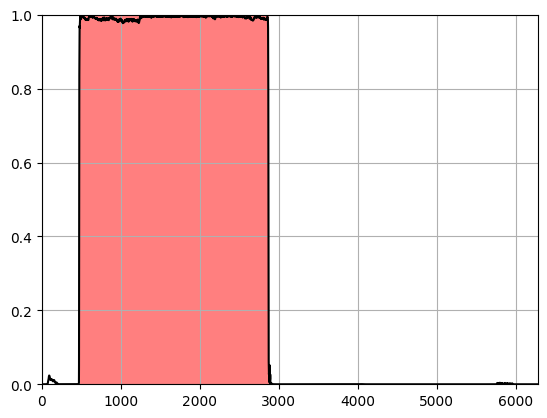

ENST00000234071
recall: 1.0
iou: 0.9928366541862488
biotype: protein_coding
II_089966  :  {'start': 20, 'stop': 158, 'MS': 0, 'TE': 1, 'frame': 3}
ENSP00000234071  :  {'start': 87, 'stop': 1473, 'MS': 299, 'TE': 1, 'frame': 1}
IP_089971  :  {'start': 310, 'stop': 493, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089970  :  {'start': 853, 'stop': 1033, 'MS': 1, 'TE': 0, 'frame': 2}
IP_089972  :  {'start': 1423, 'stop': 1600, 'MS': 0, 'TE': 0, 'frame': 2}
IP_089967  :  {'start': 1502, 'stop': 1610, 'MS': 0, 'TE': 0, 'frame': 3}
IP_089968  :  {'start': 1635, 'stop': 1743, 'MS': 0, 'TE': 0, 'frame': 1}


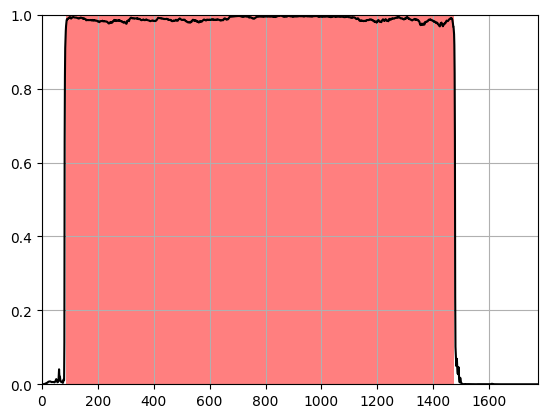

ENST00000310981
recall: 0.9969135522842407
iou: 0.9938461780548096
biotype: protein_coding
ENSP00000310803  :  {'start': 21, 'stop': 669, 'MS': 135, 'TE': 14, 'frame': 1}
IP_090036  :  {'start': 1247, 'stop': 1367, 'MS': 1, 'TE': 0, 'frame': 3}
IP_090038  :  {'start': 1359, 'stop': 1476, 'MS': 0, 'TE': 0, 'frame': 1}
IP_648313  :  {'start': 2756, 'stop': 2969, 'MS': 0, 'TE': 0, 'frame': 3}
IP_648312  :  {'start': 2932, 'stop': 3040, 'MS': 0, 'TE': 0, 'frame': 2}
IP_648314  :  {'start': 3155, 'stop': 3380, 'MS': 0, 'TE': 0, 'frame': 3}


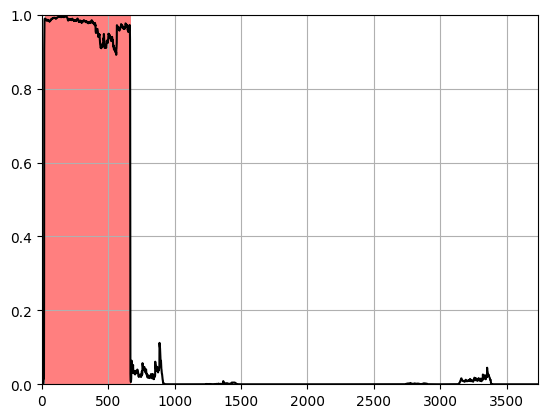

ENST00000451531
recall: 1.0
iou: 0.9466275572776794
biotype: protein_coding
ENSP00000392718  :  {'start': 431, 'stop': 3659, 'MS': 96, 'TE': 0, 'frame': 3}
IP_090179  :  {'start': 2193, 'stop': 2283, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090254  :  {'start': 2520, 'stop': 2661, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090182  :  {'start': 3261, 'stop': 3381, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090255  :  {'start': 3387, 'stop': 3507, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090175  :  {'start': 3722, 'stop': 3878, 'MS': 0, 'TE': 0, 'frame': 3}
IP_090181  :  {'start': 3807, 'stop': 3957, 'MS': 0, 'TE': 0, 'frame': 1}
IP_090173  :  {'start': 4105, 'stop': 4219, 'MS': 0, 'TE': 0, 'frame': 2}
IP_648195  :  {'start': 4294, 'stop': 4468, 'MS': 0, 'TE': 0, 'frame': 2}
IP_648197  :  {'start': 4490, 'stop': 4598, 'MS': 0, 'TE': 0, 'frame': 3}
IP_648193  :  {'start': 5632, 'stop': 5860, 'MS': 0, 'TE': 0, 'frame': 2}
IP_648194  :  {'start': 5896, 'stop': 6001, 'MS': 0, 'TE': 0, 'frame': 2}
IP_648196  :  {'start': 5966, 

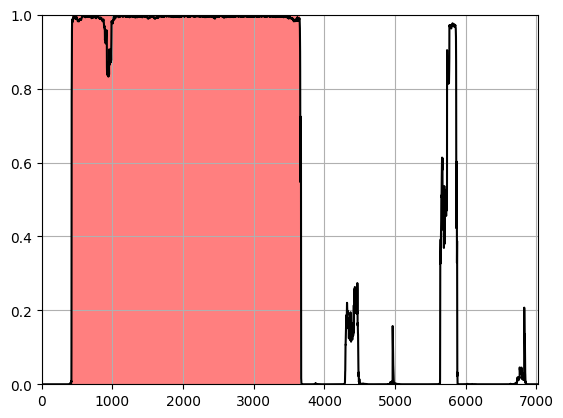

ENST00000392825
recall: 0.9988031387329102
iou: 0.9964179396629333
biotype: protein_coding
IP_091206  :  {'start': 422, 'stop': 548, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091198  :  {'start': 462, 'stop': 552, 'MS': 0, 'TE': 0, 'frame': 1}
ENSP00000376570  :  {'start': 567, 'stop': 2238, 'MS': 133, 'TE': 4, 'frame': 1}
IP_091201  :  {'start': 1492, 'stop': 1771, 'MS': 1, 'TE': 0, 'frame': 2}
IP_091207  :  {'start': 1550, 'stop': 1691, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091203  :  {'start': 1915, 'stop': 2041, 'MS': 1, 'TE': 0, 'frame': 2}
IP_091199  :  {'start': 2086, 'stop': 2215, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091197  :  {'start': 2661, 'stop': 2829, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091195  :  {'start': 3534, 'stop': 3630, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091202  :  {'start': 3910, 'stop': 4003, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091204  :  {'start': 4178, 'stop': 4319, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091200  :  {'start': 4912, 'stop': 5149, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091205  :  {'st

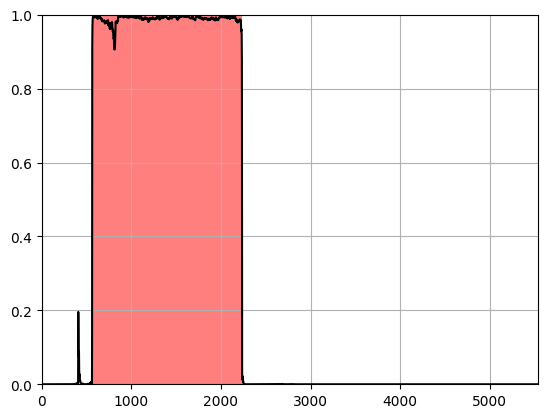

ENST00000259050
recall: 0.9990543723106384
iou: 0.9957587122917175
biotype: protein_coding
ENSP00000259050  :  {'start': 122, 'stop': 2237, 'MS': 169, 'TE': 35, 'frame': 3}
IP_091405  :  {'start': 222, 'stop': 339, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091406  :  {'start': 1107, 'stop': 1611, 'MS': 0, 'TE': 0, 'frame': 1}
II_091407  :  {'start': 2106, 'stop': 2247, 'MS': 0, 'TE': 2, 'frame': 1}
IP_091404  :  {'start': 2555, 'stop': 2678, 'MS': 0, 'TE': 0, 'frame': 3}
IP_091403  :  {'start': 2960, 'stop': 3053, 'MS': 0, 'TE': 0, 'frame': 3}
IP_647498  :  {'start': 3482, 'stop': 3572, 'MS': 0, 'TE': 0, 'frame': 3}
IP_647496  :  {'start': 4227, 'stop': 4323, 'MS': 0, 'TE': 0, 'frame': 1}
IP_647495  :  {'start': 4353, 'stop': 4512, 'MS': 0, 'TE': 0, 'frame': 1}
IP_647499  :  {'start': 4409, 'stop': 4529, 'MS': 0, 'TE': 0, 'frame': 3}
IP_647497  :  {'start': 5221, 'stop': 5530, 'MS': 0, 'TE': 0, 'frame': 2}


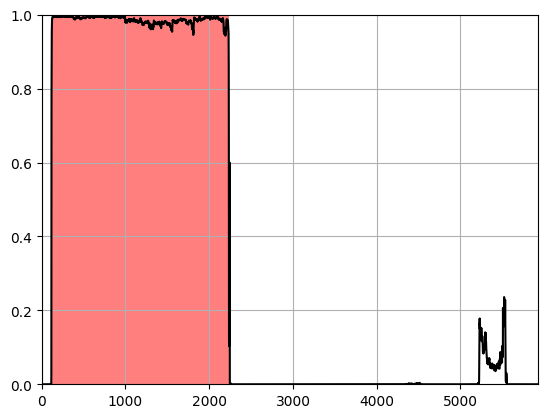

ENST00000409175
recall: 1.0
iou: 0.9967012405395508
biotype: protein_coding
ENSP00000386830  :  {'start': 260, 'stop': 2375, 'MS': 169, 'TE': 35, 'frame': 3}
IP_091405  :  {'start': 360, 'stop': 477, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091406  :  {'start': 1245, 'stop': 1749, 'MS': 0, 'TE': 0, 'frame': 1}
II_091407  :  {'start': 2244, 'stop': 2385, 'MS': 0, 'TE': 2, 'frame': 1}


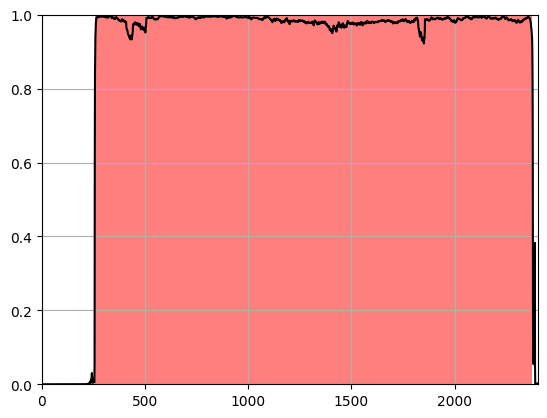

ENST00000409591
recall: 1.0
iou: 0.9955223798751831
biotype: protein_coding
ENSP00000387238  :  {'start': 79, 'stop': 2080, 'MS': 154, 'TE': 0, 'frame': 2}
IP_091406  :  {'start': 950, 'stop': 1454, 'MS': 0, 'TE': 0, 'frame': 3}
II_091407  :  {'start': 1949, 'stop': 2090, 'MS': 0, 'TE': 2, 'frame': 3}


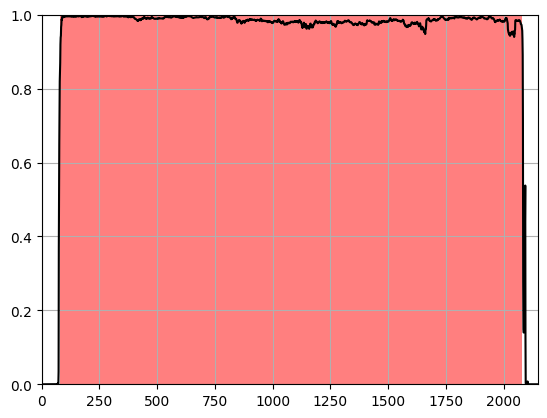

ENST00000539065
recall: 1.0
iou: 0.9927158951759338
biotype: protein_coding
ENSP00000442992  :  {'start': 164, 'stop': 2072, 'MS': 134, 'TE': 2, 'frame': 3}
IP_091405  :  {'start': 264, 'stop': 381, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091406  :  {'start': 981, 'stop': 1485, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091404  :  {'start': 2380, 'stop': 2503, 'MS': 0, 'TE': 0, 'frame': 2}
IP_091403  :  {'start': 2785, 'stop': 2878, 'MS': 0, 'TE': 0, 'frame': 2}


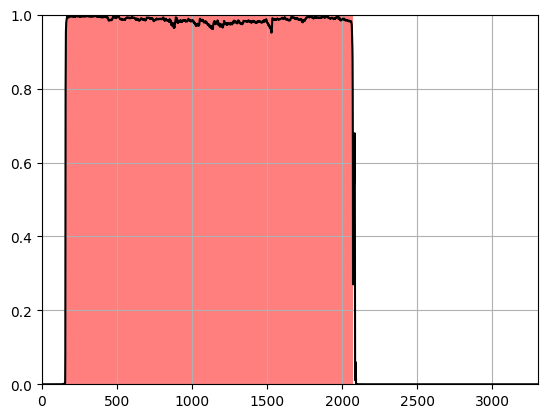

ENST00000409273
recall: 1.0
iou: 0.8743322491645813
biotype: protein_coding
ENSP00000387255  :  {'start': 353, 'stop': 10337, 'MS': 207, 'TE': 0, 'frame': 3}
IP_091820  :  {'start': 2901, 'stop': 3024, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091827  :  {'start': 3792, 'stop': 3942, 'MS': 1, 'TE': 0, 'frame': 1}
IP_091824  :  {'start': 4098, 'stop': 4224, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091825  :  {'start': 4821, 'stop': 4938, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091826  :  {'start': 5793, 'stop': 5925, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091818  :  {'start': 6741, 'stop': 6924, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091821  :  {'start': 7146, 'stop': 7245, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091817  :  {'start': 8262, 'stop': 8478, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091816  :  {'start': 8835, 'stop': 8940, 'MS': 1, 'TE': 0, 'frame': 1}
IP_091828  :  {'start': 9135, 'stop': 9312, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091822  :  {'start': 9423, 'stop': 9519, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091829  :  {'start': 9555

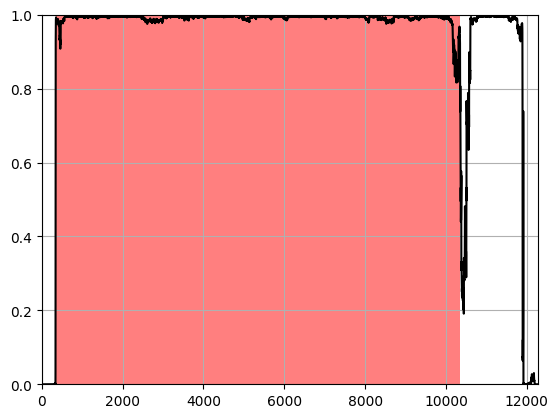

ENST00000628543
recall: 1.0
iou: 0.8775351047515869
biotype: protein_coding
ENSP00000486198  :  {'start': 125, 'stop': 10250, 'MS': 208, 'TE': 0, 'frame': 3}
IP_091820  :  {'start': 2814, 'stop': 2937, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091827  :  {'start': 3705, 'stop': 3855, 'MS': 1, 'TE': 0, 'frame': 1}
IP_091824  :  {'start': 4011, 'stop': 4137, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091825  :  {'start': 4734, 'stop': 4851, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091826  :  {'start': 5706, 'stop': 5838, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091818  :  {'start': 6654, 'stop': 6837, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091821  :  {'start': 7059, 'stop': 7158, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091817  :  {'start': 8175, 'stop': 8391, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091816  :  {'start': 8748, 'stop': 8853, 'MS': 1, 'TE': 0, 'frame': 1}
IP_091828  :  {'start': 9048, 'stop': 9225, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091822  :  {'start': 9336, 'stop': 9432, 'MS': 0, 'TE': 0, 'frame': 1}
IP_091829  :  {'start': 9468

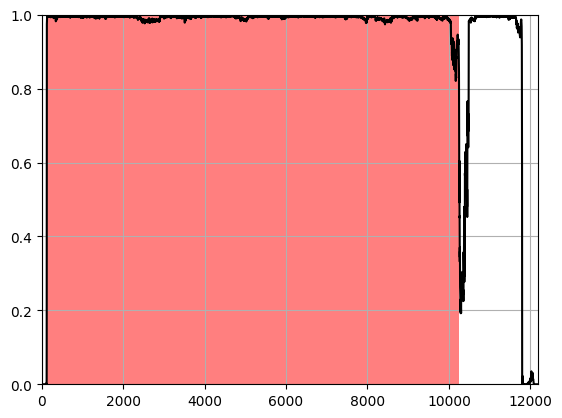

In [11]:
map_preds(report, trx_orfs, ensembl_trx, n_display=200)